<a href="https://www.kaggle.com/code/abhijitbhandari/advanced-house-price-prediction?scriptVersionId=170738389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Advanced House Price Prediction

## Loading the Libraries

Dataset available in

https://www.kaggle.com/datasets/asharalikamil/regression-technique-eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',800)
%matplotlib inline

In [2]:
!pip install verstack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 63.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.3 MB/s eta 0:00:00
  Created wheel for verstack: filename=verstack-3.9.2-py3-none-any.whl size=75645 sha256=0aa56a29769c30469eeb82f209c9e233b62b97bada984ec25fe1ccf061105c71
  Stored in directory: /root/.cache/pip/wheels/8f/ec/f4/47b84773b8d12466521ba5b68992fa3938eb598199ff63932d
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77060 sha256=54d5bbd33dc7303c522719c0690568555c54918295e0a3c9a30a9ceb74960f15
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built verstack wrapt
  Attempting uninstall: 

In [3]:
import verstack
verstack.__version__

'3.9.2'

## Loading the Dataset

In [4]:
train = pd.read_csv('../input/regression-technique-eda/House Price Regression Tecnique/train.csv',na_values=['None','Na','na','nan','NAN','NA','Nan','NaN','nAn'])
test = pd.read_csv('../input/regression-technique-eda/House Price Regression Tecnique/test.csv',na_values=['None','Na','na','nan','NAN','NA','Nan','NaN','nAn'])

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

**No Sale Price in Test Dataset for metrics check. So, considering only train dataset**

In [6]:
df = pd.read_csv("../input/regression-technique-eda/House Price Regression Tecnique/train.csv",na_values=['None','Na','na','nan','NAN','NA','Nan','NaN','nAn'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

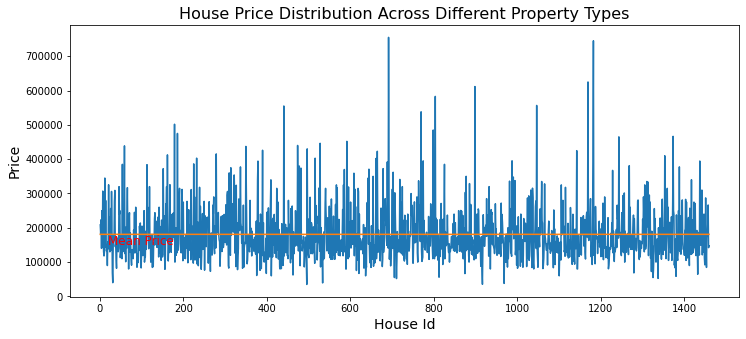

In [7]:
plt.figure(figsize = (12,5))
description = df.describe()
plt.plot(df['Id'],df['SalePrice'])
plt.plot(df['Id'],[df['SalePrice'].mean()]*len(df['Id']))
plt.annotate('Mean Price',(20,150000),color = 'red', fontsize = 12)
plt.xlabel('House Id', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title("House Price Distribution Across Different Property Types", fontsize = 16)
plt.show()

## Checking for Missing Values

In [8]:
## Counting Null Value in Each Column
na_cols = [col for col in df.columns if df[col].isnull().sum()>0]
null_count = []

for col in na_cols:
    null = df[col].isnull().sum()
    null_count.append(null)
    
    

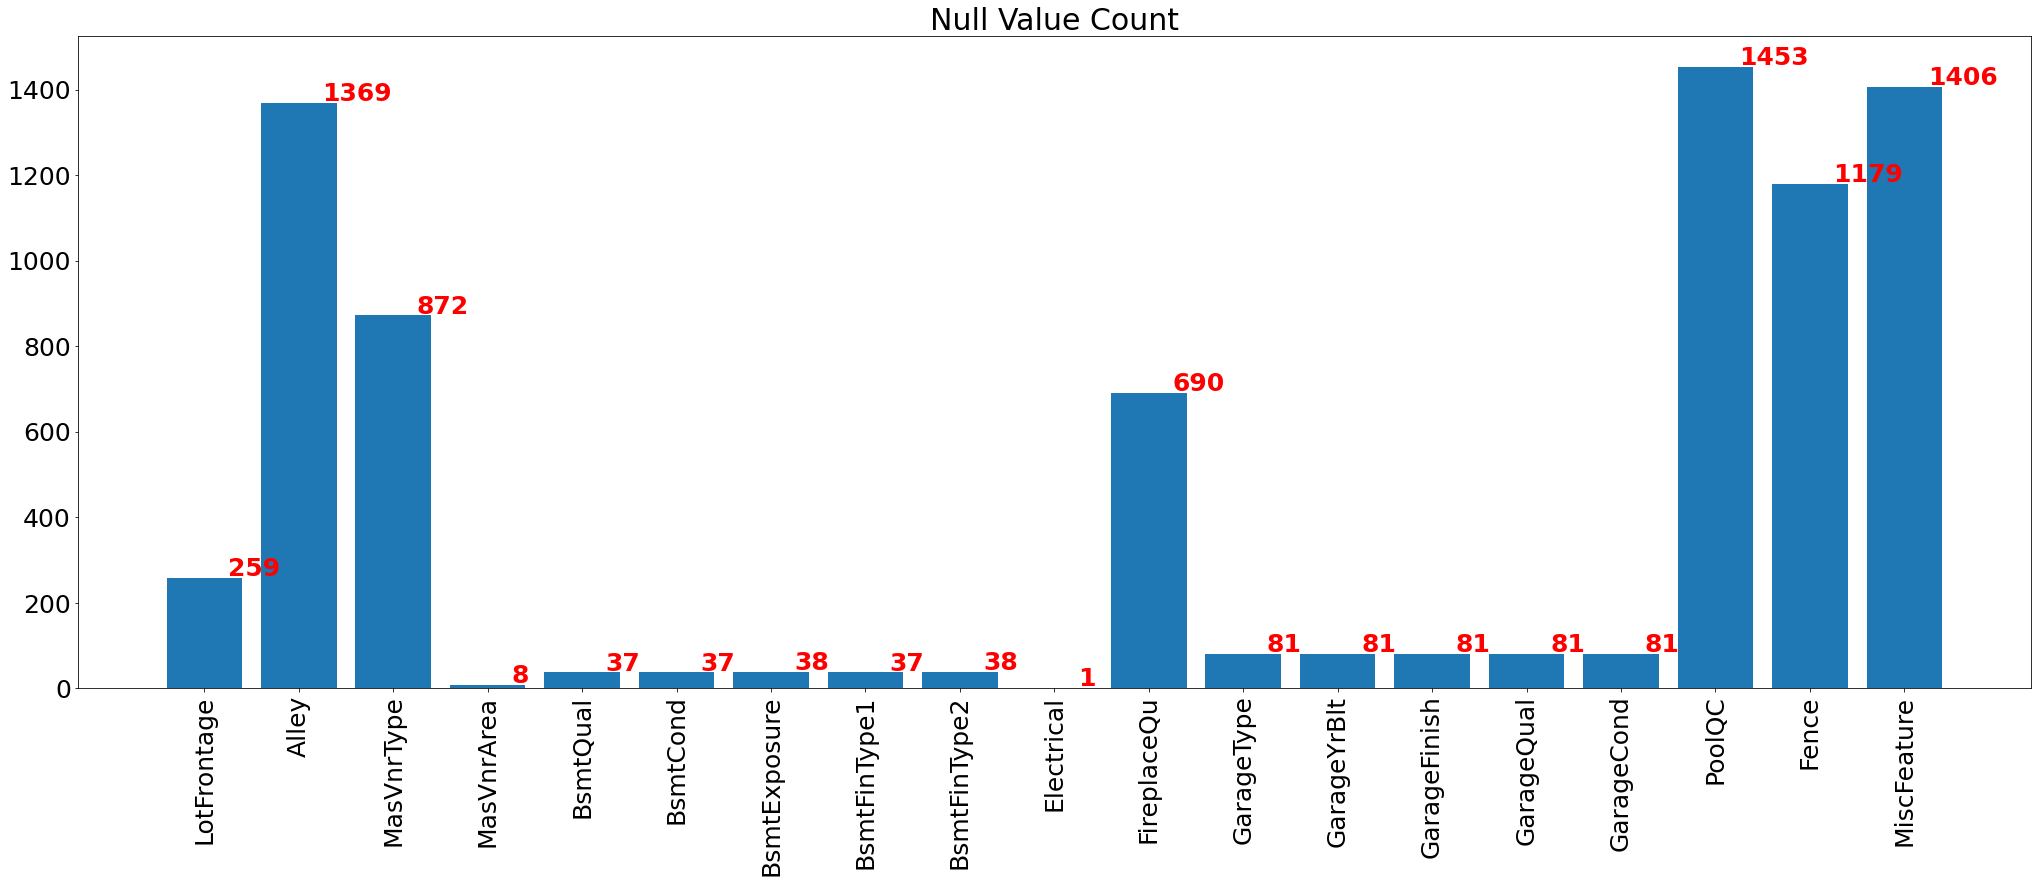

In [9]:
plt.figure(figsize = (35,12))
plt.bar(na_cols,height= null_count)
for i, v in enumerate(null_count):
    plt.text(i + 0.25, v + 5, str(v),
            color = 'red', fontweight = 'bold',fontsize = 25)
plt.xticks(fontsize = 25, rotation =90)
plt.yticks(fontsize = 25)
plt.title("Null Value Count", fontsize = 30)
plt.show()

In [10]:
for i in range(len(null_count)):
    print(f'{na_cols[i]} has {(null_count[i]/df.shape[0])*100:0.2f}% missing values')
    

LotFrontage has 17.74% missing values
Alley has 93.77% missing values
MasVnrType has 59.73% missing values
MasVnrArea has 0.55% missing values
BsmtQual has 2.53% missing values
BsmtCond has 2.53% missing values
BsmtExposure has 2.60% missing values
BsmtFinType1 has 2.53% missing values
BsmtFinType2 has 2.60% missing values
Electrical has 0.07% missing values
FireplaceQu has 47.26% missing values
GarageType has 5.55% missing values
GarageYrBlt has 5.55% missing values
GarageFinish has 5.55% missing values
GarageQual has 5.55% missing values
GarageCond has 5.55% missing values
PoolQC has 99.52% missing values
Fence has 80.75% missing values
MiscFeature has 96.30% missing values


### Checking for Relationship Between Null Values and Sales Price

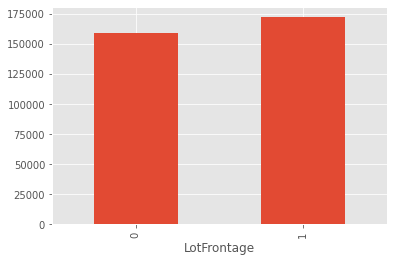

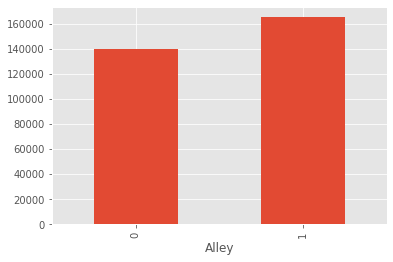

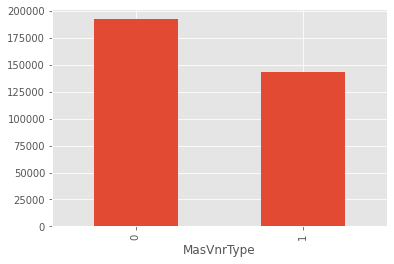

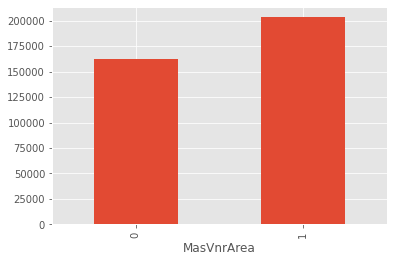

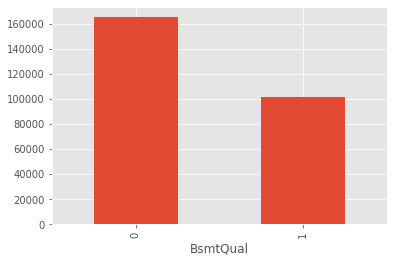

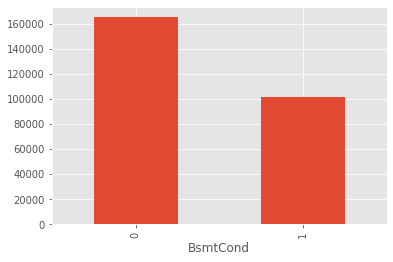

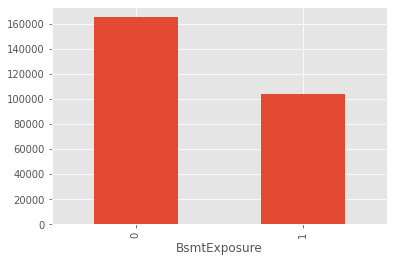

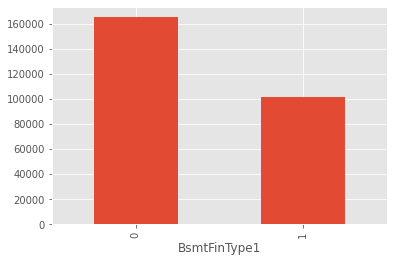

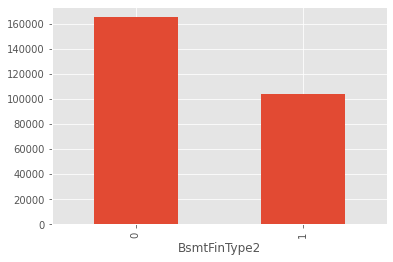

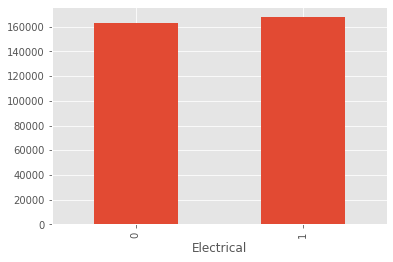

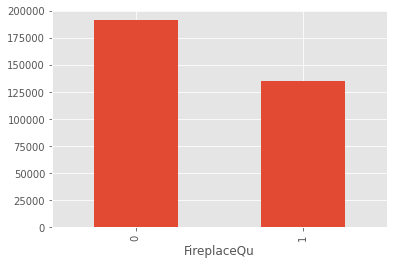

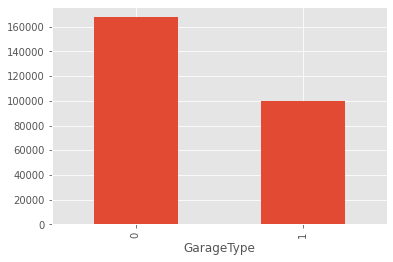

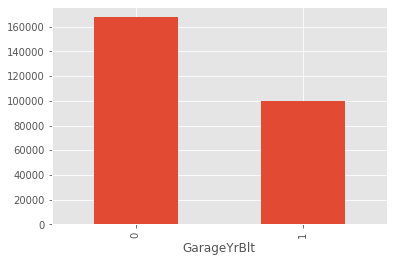

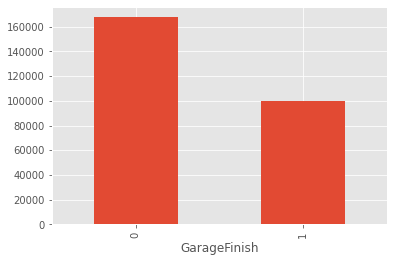

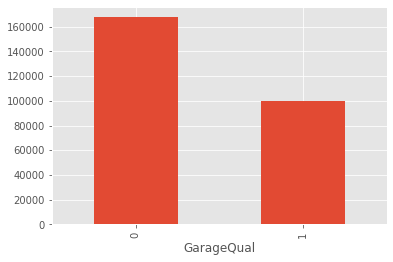

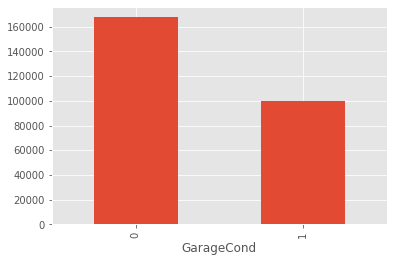

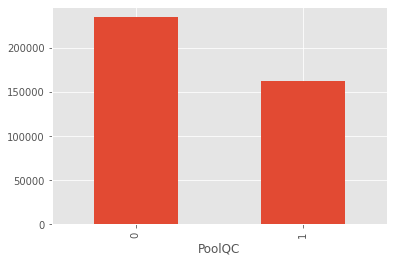

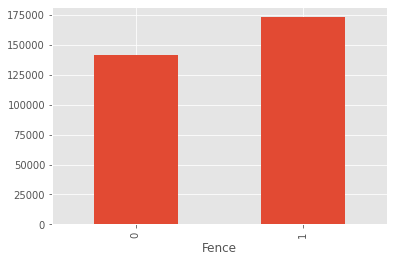

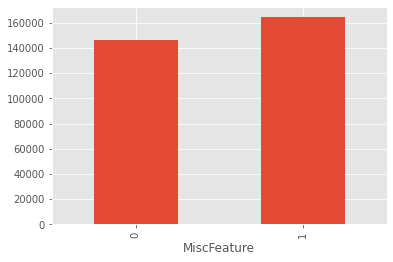

In [11]:
## Relationship Between Null Value in Individual Columns and Sales Price
plt.style.use("ggplot")
for cols in na_cols:
    df_copy = df.copy()
    
    df_copy[cols] = np.where(df_copy[cols].isnull(),1,0)
    
    df_copy.groupby(cols)['SalePrice'].median().plot.bar()
    plt.show()
    
    

Here, a clear relationship exists between the sales price and the nan values as the price keeps on fluctuating based on the nan values

### Separating Numerical Features  and Object Features

In [12]:
numerical_cols = [col for col in df.columns if df[col].dtypes!='O']
object_cols = [col for col in df.columns if df[col].dtypes =='O']

In [13]:
df[numerical_cols].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [14]:
df[object_cols].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

### Seggregating Temporal Features: Temporal Features mean Datetime like features

In [15]:
temporal_features = [col for col in numerical_cols if 'Yr' in col or 'Year' in col or 'yr' in col]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
for yrs in temporal_features:
    print(yrs, df[yrs].unique(),'\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

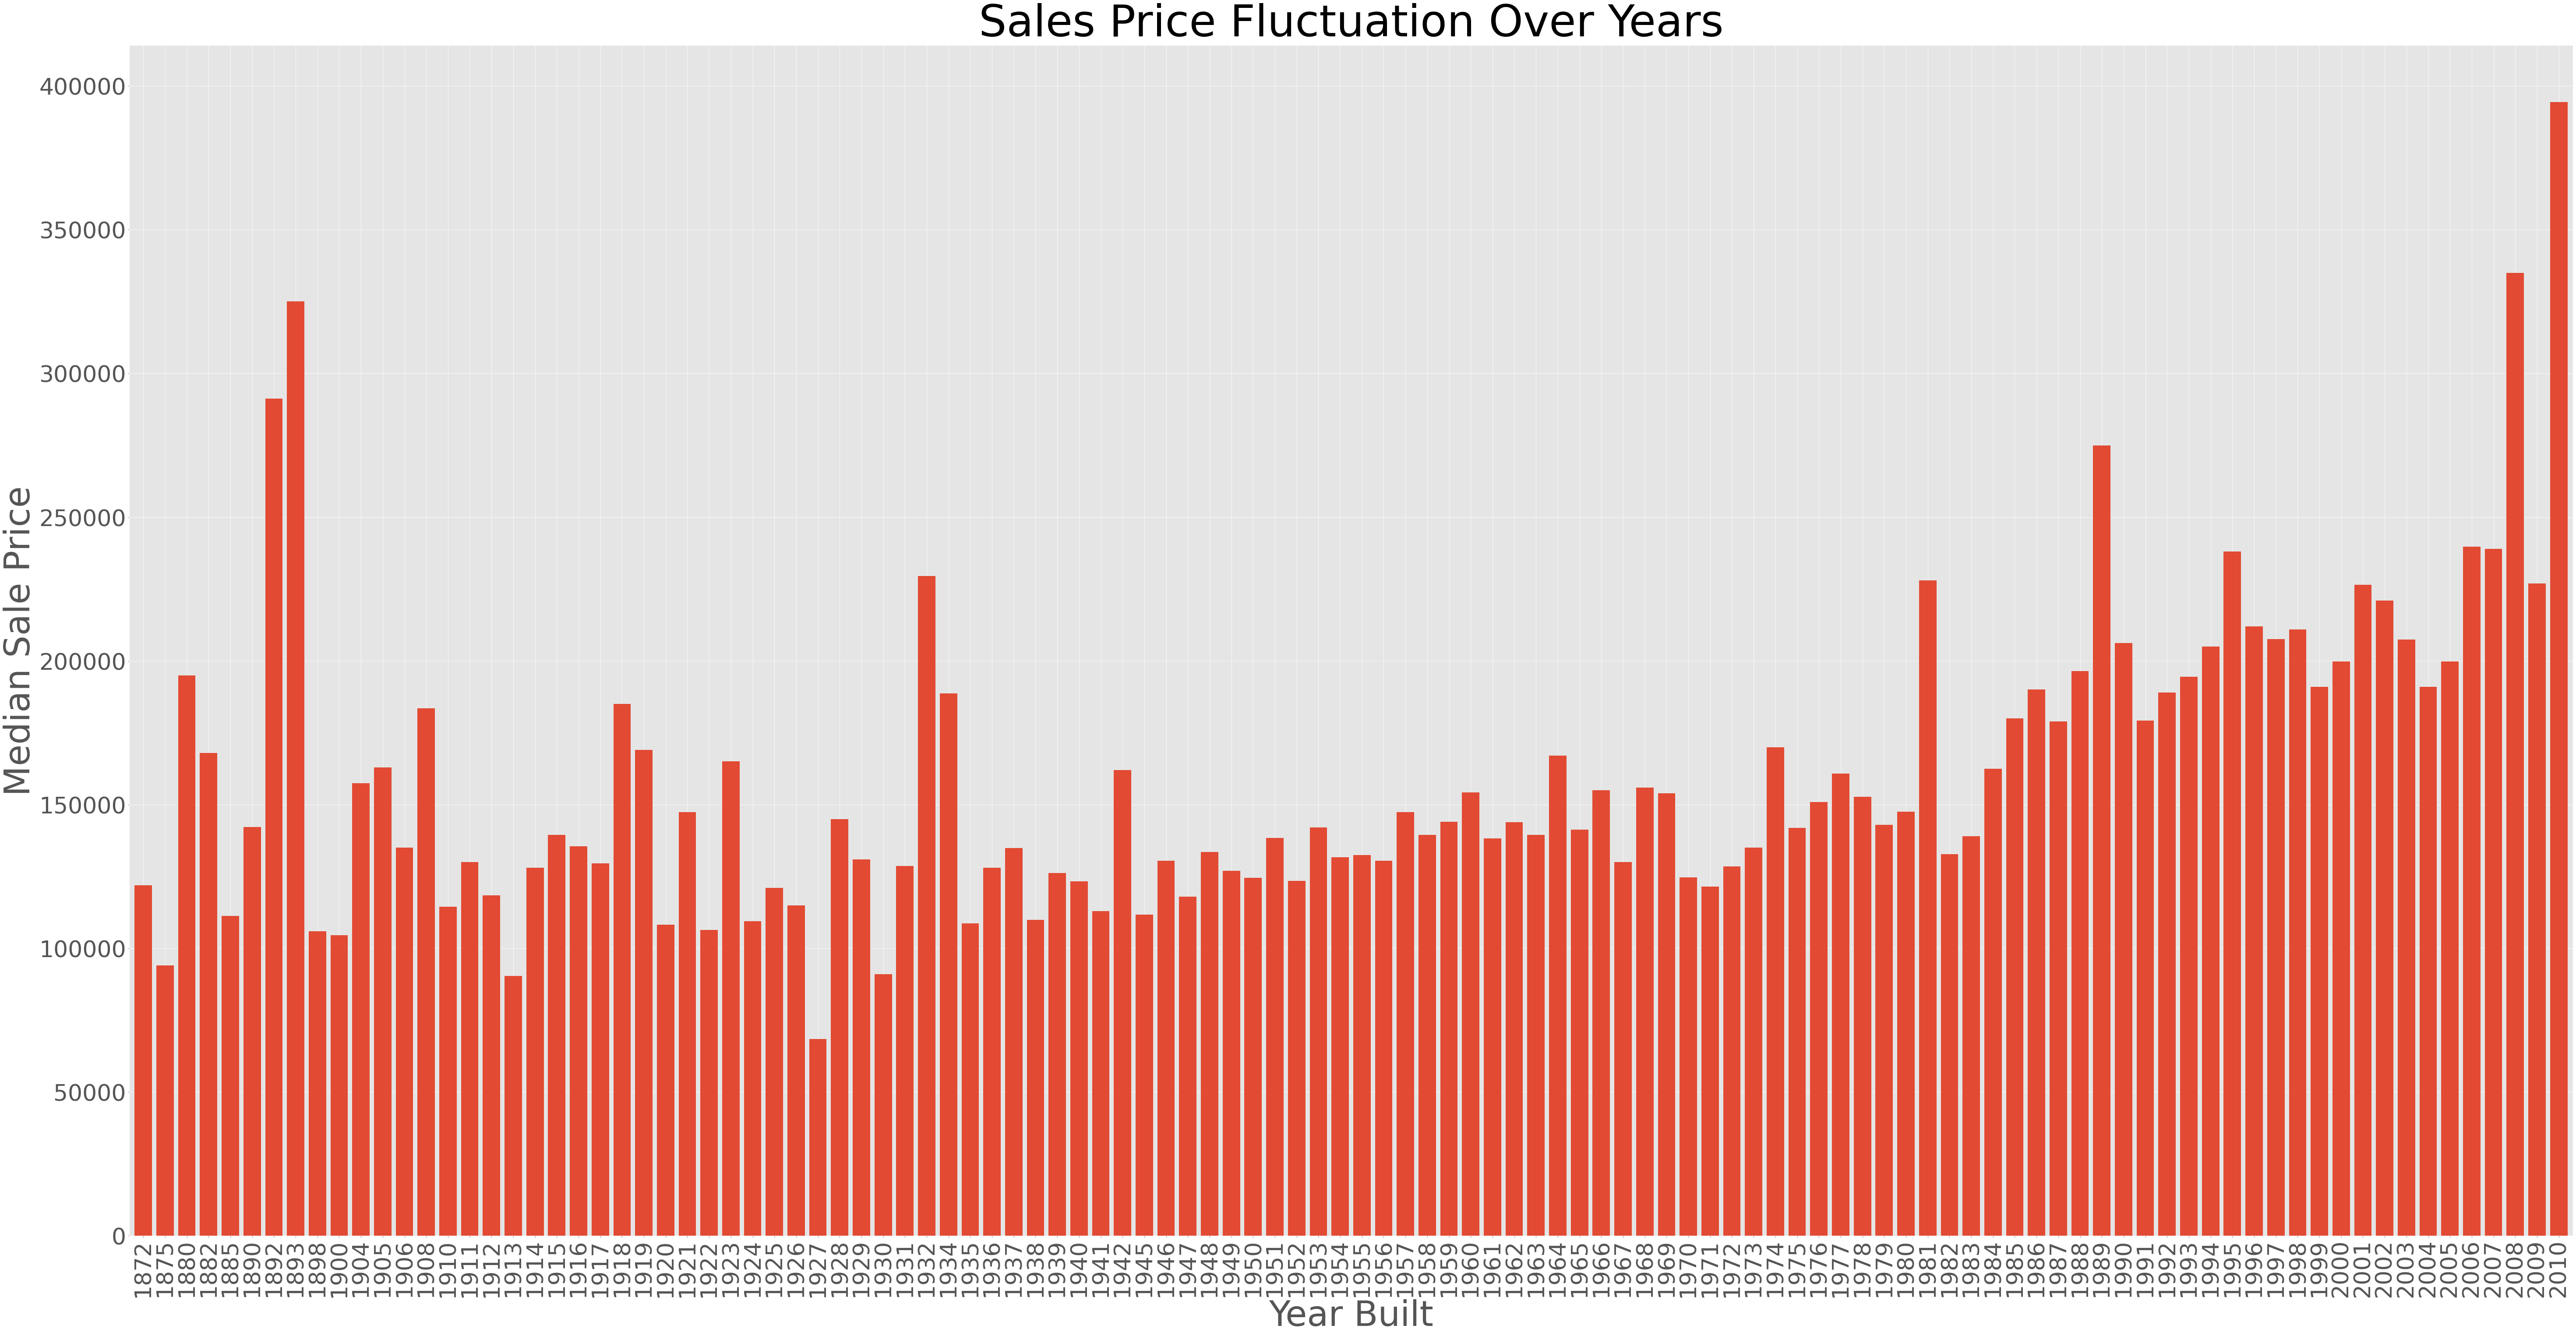

In [17]:
grpby_year_built = df.groupby(['YearBuilt'])['SalePrice'].median()
plt.figure(figsize = (100,50))
grpby_year_built.plot.bar(width = 0.8)

plt.title("Sales Price Fluctuation Over Years", fontsize = 100)
plt.xlabel("Year Built", fontsize = 80)  
plt.ylabel("Median Sale Price", fontsize = 80)
plt.xticks(fontsize = 52, rotation = 90)
plt.yticks(fontsize = 52)
plt.show()


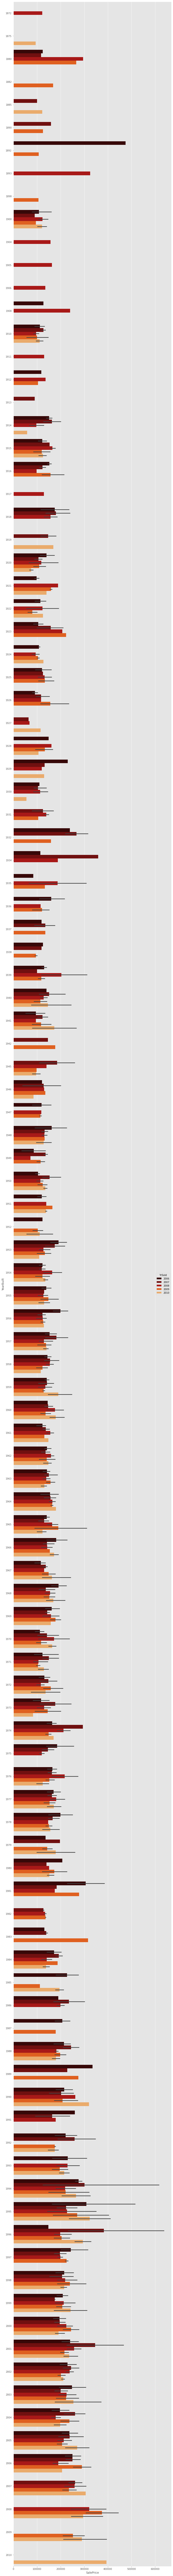

In [18]:
plt.figure(figsize = (12,200))
sns.barplot(y = df['YearBuilt'],x =df['SalePrice'],hue = df['YrSold'],palette= 'gist_heat',orient= 'h',)
plt.show()

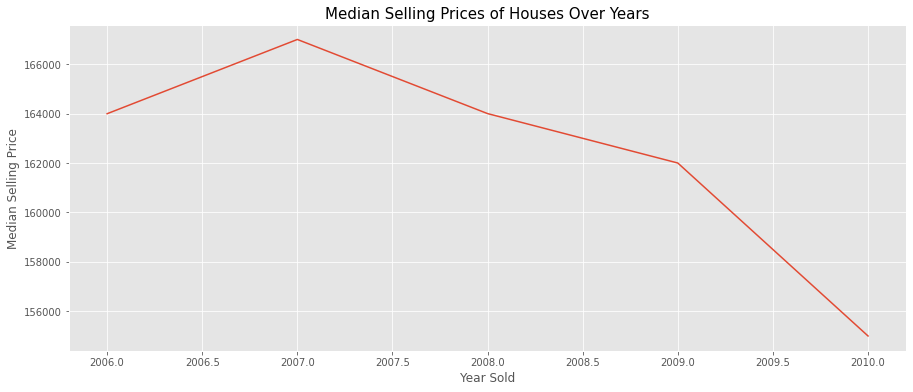

In [19]:
plt.figure(figsize = (15,6))
df.groupby(['YrSold'])['SalePrice'].median().plot()
plt.title("Median Selling Prices of Houses Over Years", fontsize = 15)
plt.xlabel(xlabel = "Year Sold", fontsize = 12)
plt.ylabel(ylabel = "Median Selling Price", fontsize = 12)
plt.show()

Here it is seen that house sold more recently have a lesser price. It might be due to the drop
in value of houses sold more recently

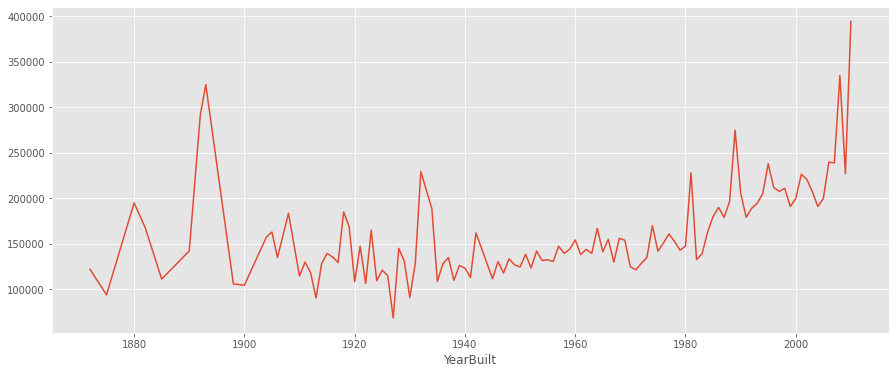

In [20]:
plt.figure(figsize = (15,6))
df.groupby(['YearBuilt'])['SalePrice'].median().plot()
plt.show()

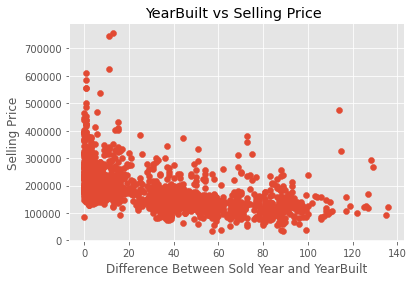

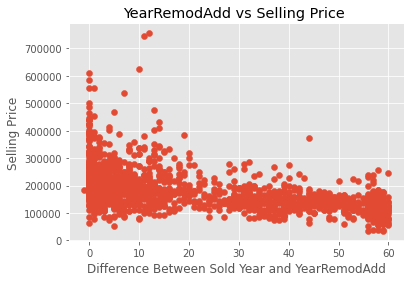

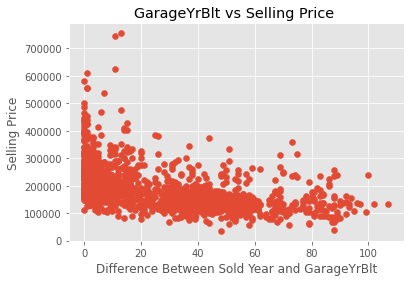

In [21]:
for features in temporal_features:
    if features!='YrSold':
        plt.scatter(x = df['YrSold']-df[features], y = df['SalePrice'])
        plt.xlabel(f'Difference Between Sold Year and {features}')
        plt.ylabel('Selling Price')
        plt.title(f'{features} vs Selling Price ')
        plt.show()

###  Determining Discrete Features in Numerical Cols

In [22]:
#Since discrete feature have quite a less unique values
discrete_features = [col for col in numerical_cols if len(df[col].unique())<30 and col not in temporal_features+['Id']]

### Null Values in Different Feature Types

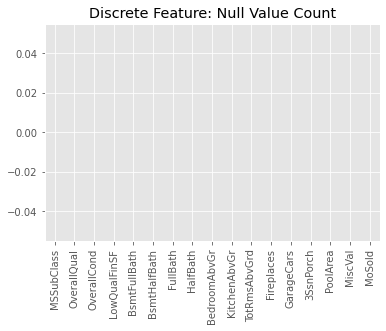

In [23]:
df[discrete_features].isnull().sum().plot(kind = 'bar')
plt.title('Discrete Feature: Null Value Count')
plt.show()

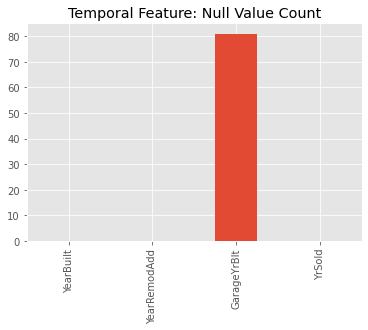

In [24]:
df[temporal_features].isnull().sum().plot(kind = 'bar')
plt.title('Temporal Feature: Null Value Count')
plt.show()

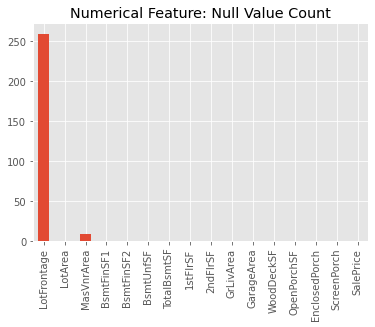

In [25]:
actual_numerical = [col for col in numerical_cols if col not in discrete_features+['Id']+temporal_features]
df[actual_numerical].isnull().sum().plot(kind ='bar')
plt.title('Numerical Feature: Null Value Count')
plt.show()

### Relationship Between Discrete Features and the Sale Price

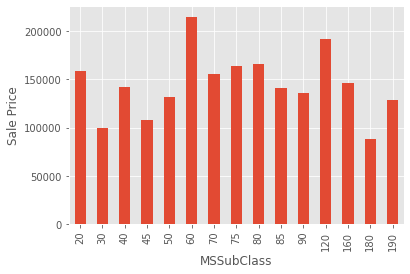

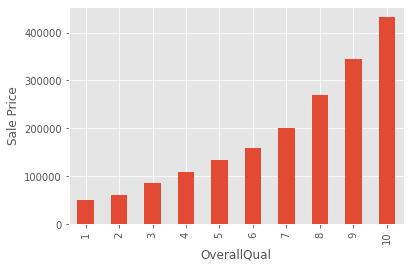

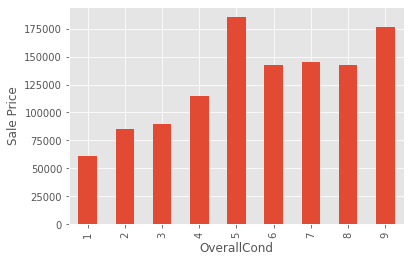

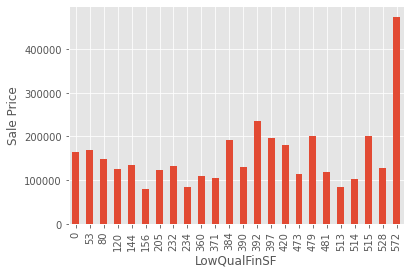

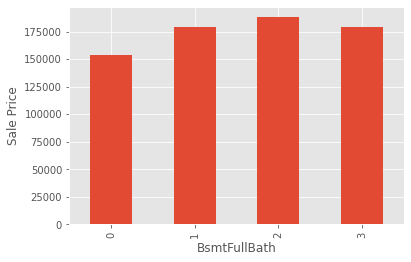

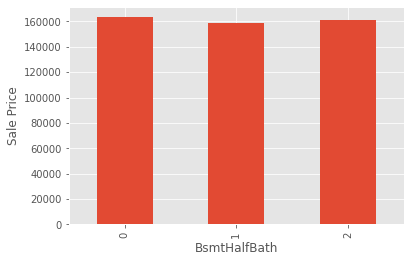

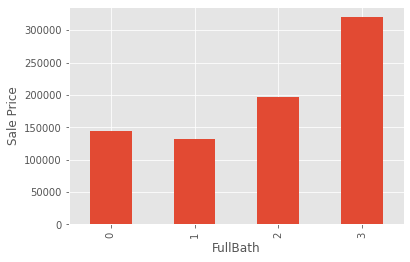

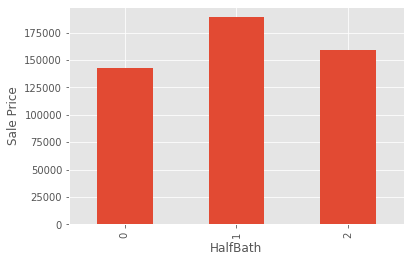

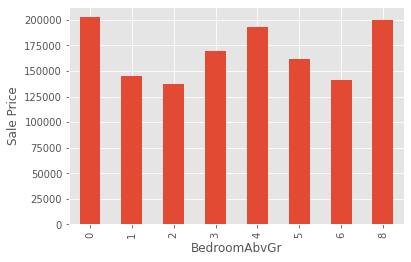

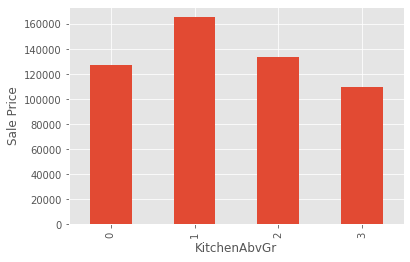

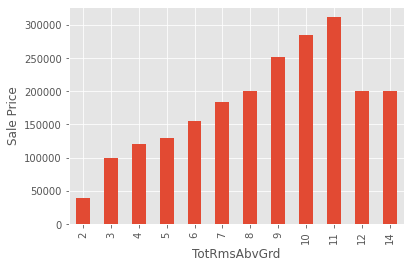

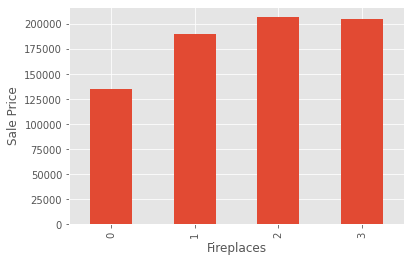

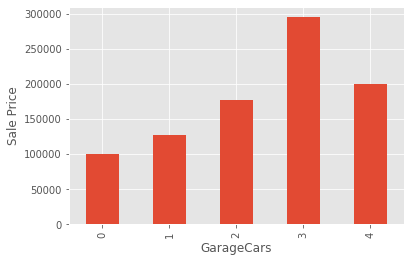

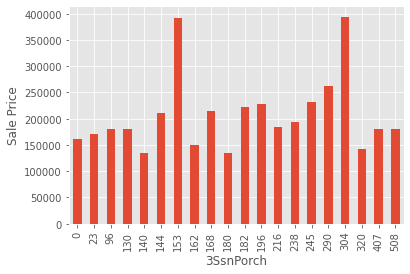

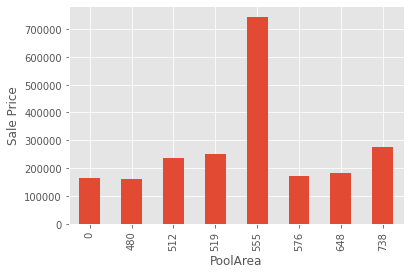

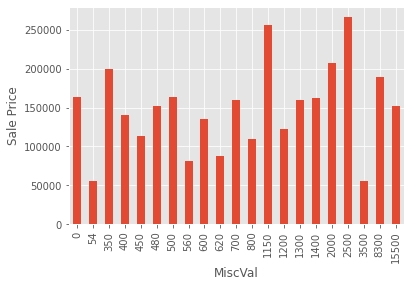

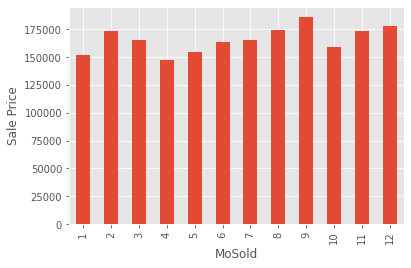

In [26]:
for col in discrete_features:
    df.groupby([col])['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

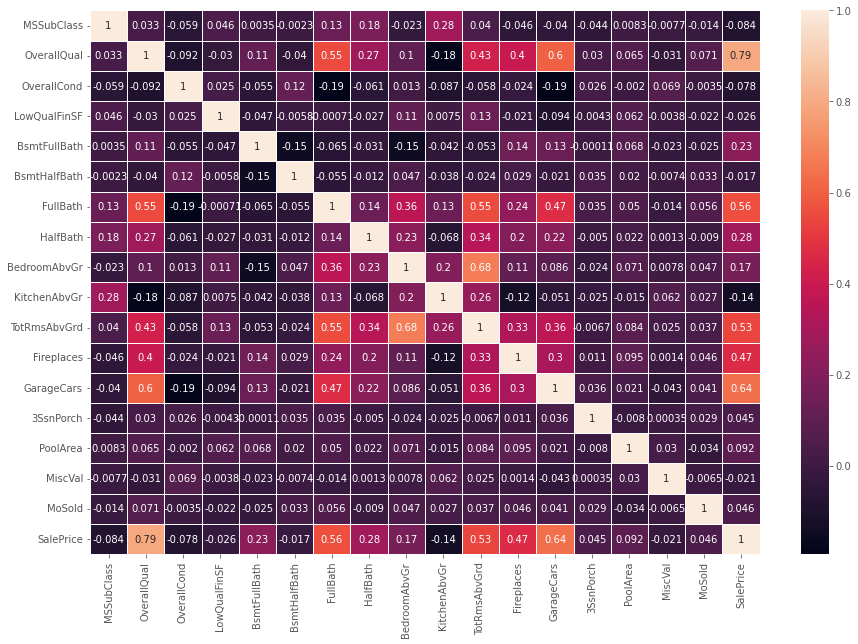

In [27]:
temp_df = df[discrete_features].copy()
temp_df['SalePrice'] = df['SalePrice']
plt.figure(figsize = (15,10))
sns.heatmap(temp_df.corr(),annot = True,linewidth = 1,linecolor = 'white')
plt.show()

From the above heatmap, we can see that the SalePrice has strong correlation with GarageCars, Fireplaces, TotRmsAbvGrd, FullBath and the strongest relationship is with overall quality. So, overall quality is the most prominent factor affecting the SalePrice. Also, KitchenAbvGr has inverse relationship with SalePrice

### Relationship Between Actual Numerical Values and Sale Price

**Correlation**

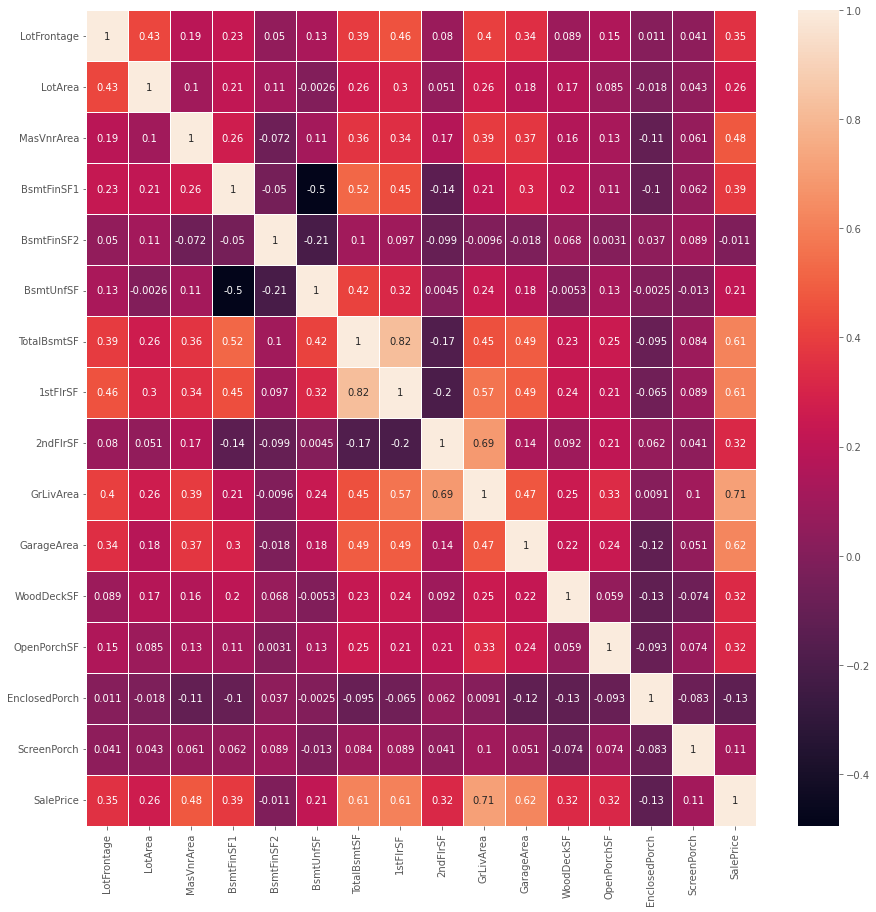

In [28]:
plt.figure(figsize = (15,15))
sns.heatmap(df[actual_numerical].corr(),annot = True, linewidths=1, linecolor='white')
plt.show()

**Other Relationship**

<Figure size 36000x36000 with 0 Axes>

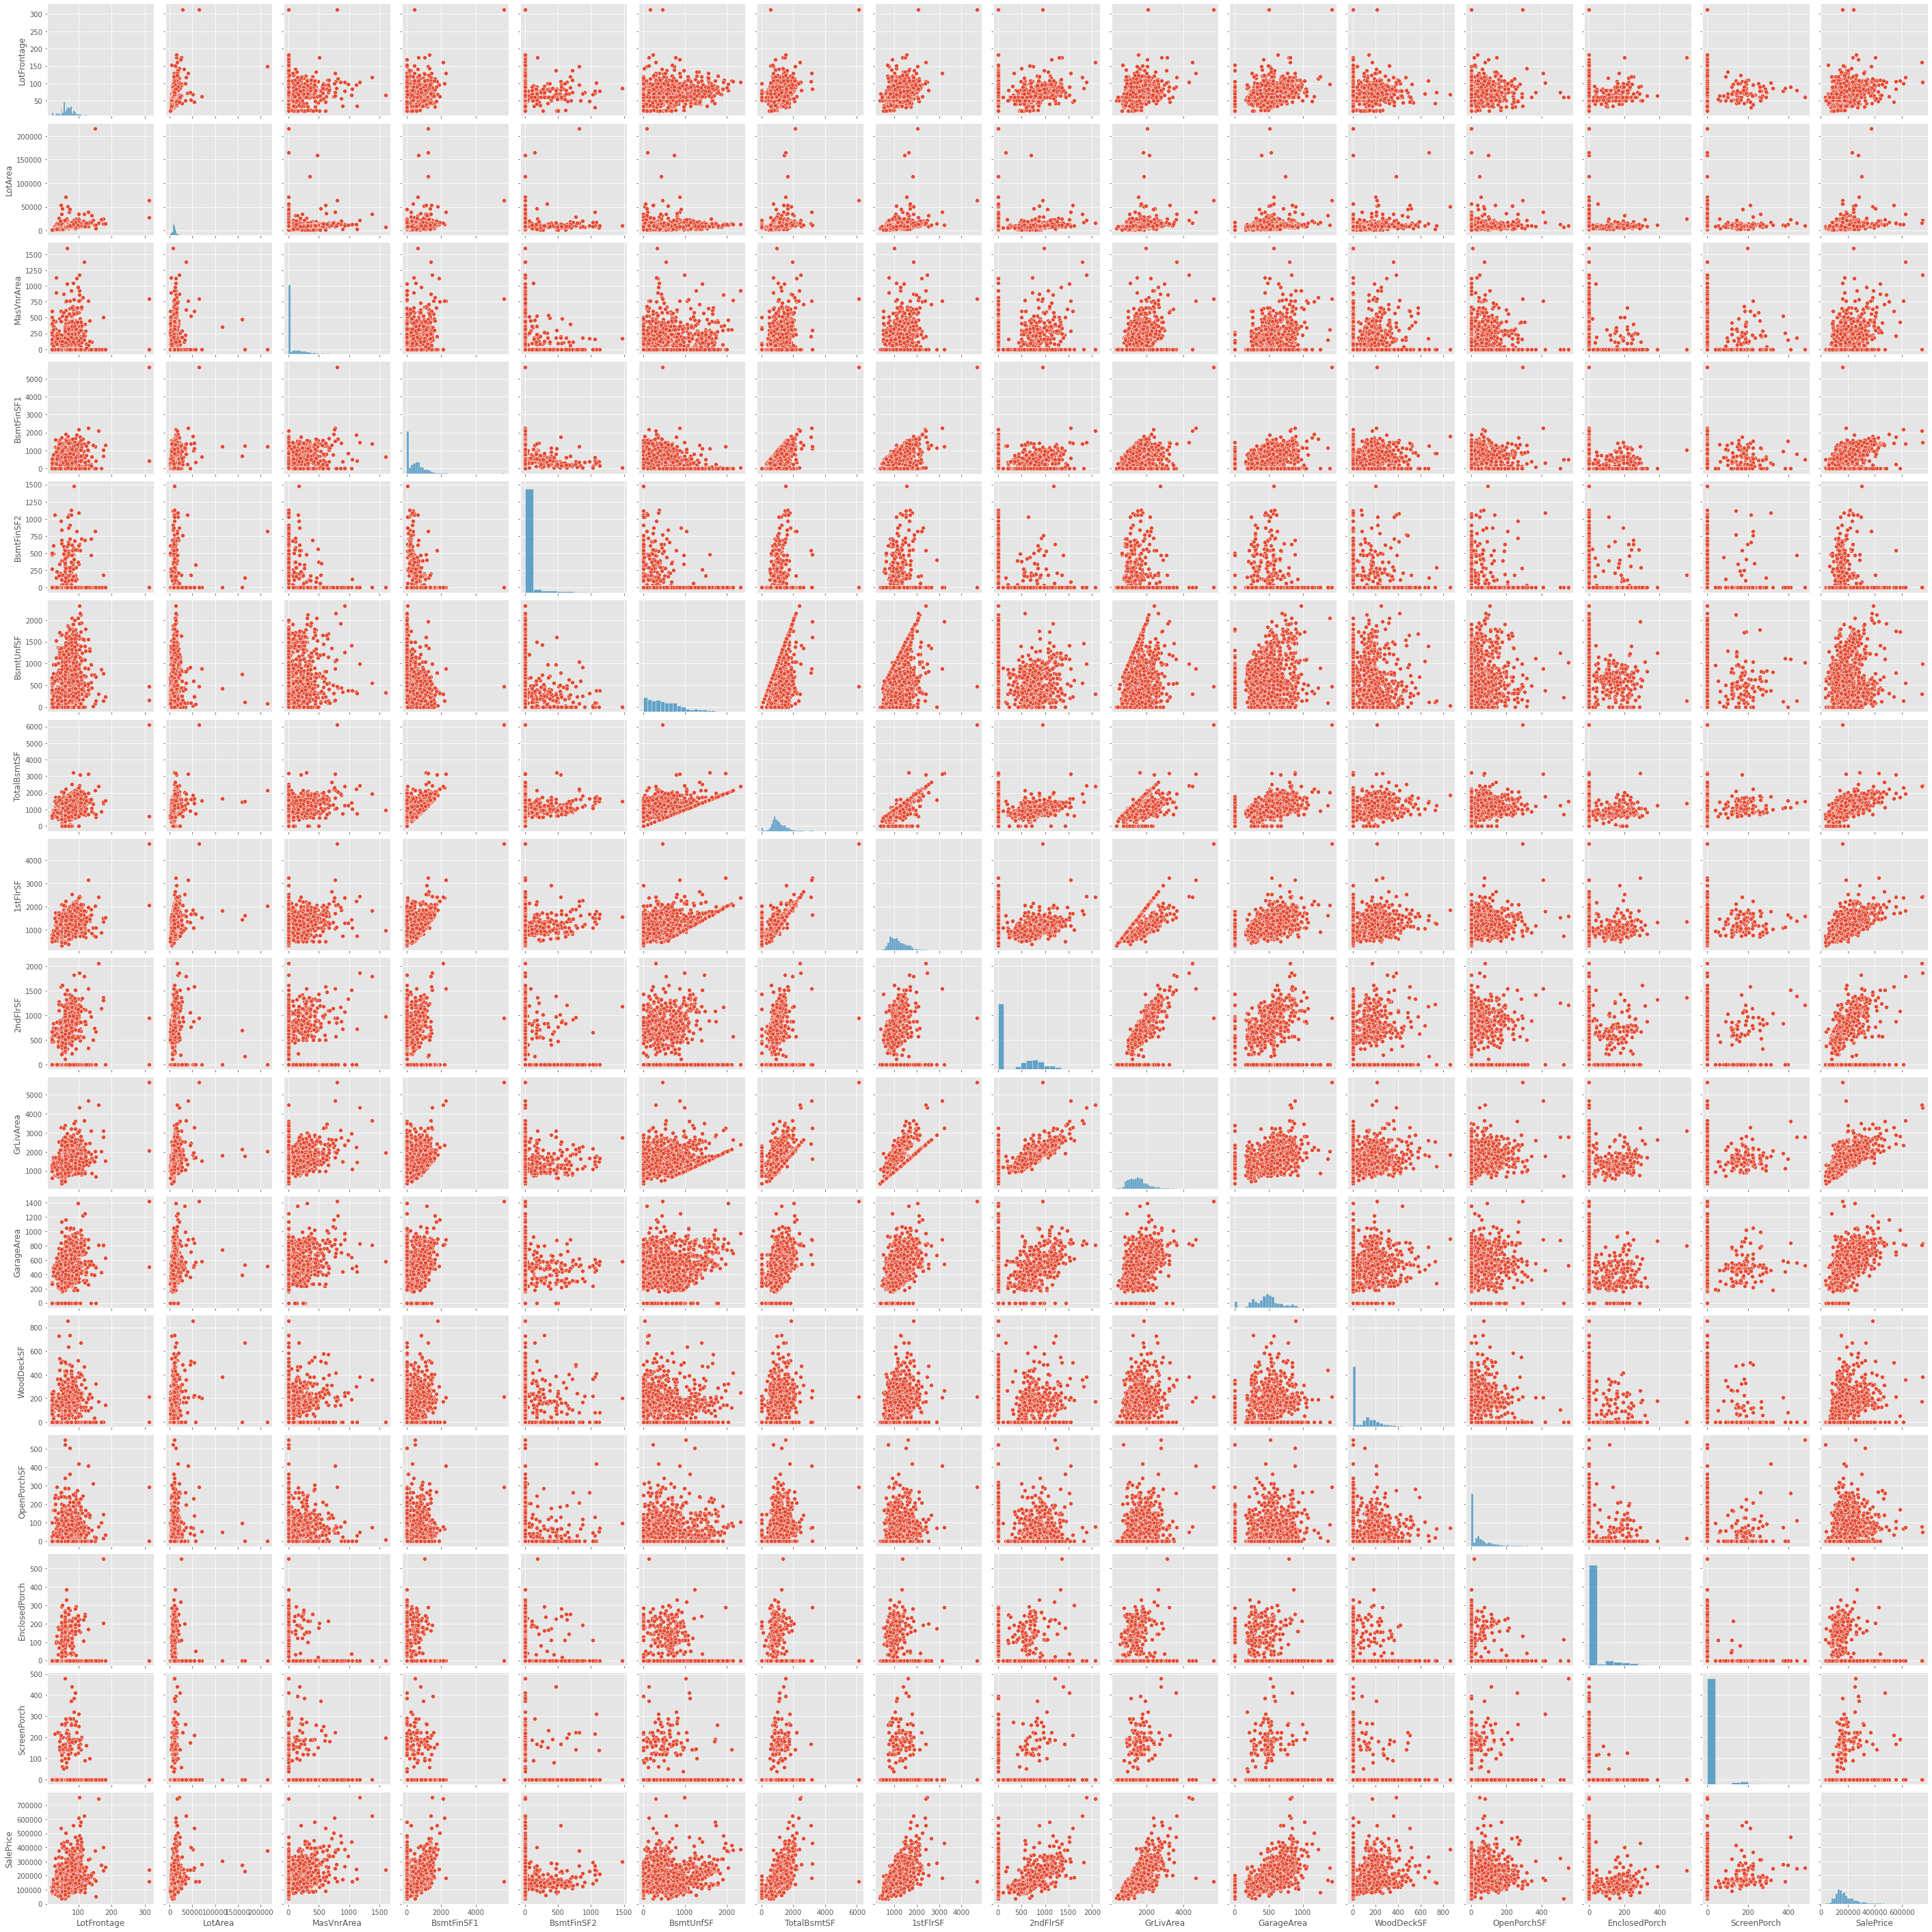

In [29]:
plt.figure(figsize = (500,500))
sns.pairplot(df[actual_numerical])
plt.xticks(fontsize = 300)
plt.yticks(fontsize = 300)
plt.show()

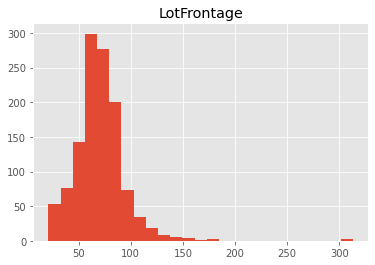

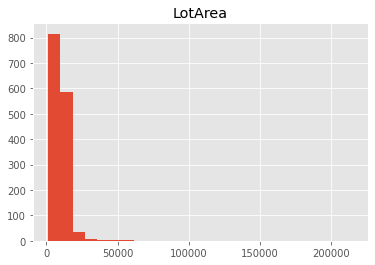

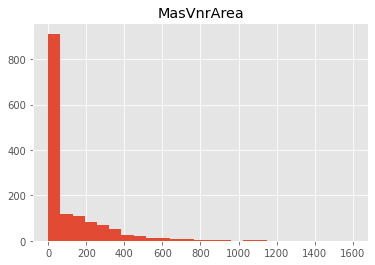

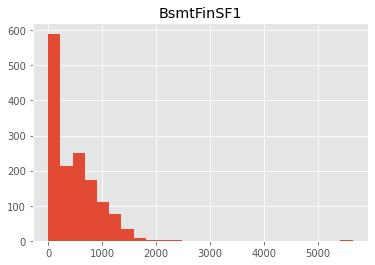

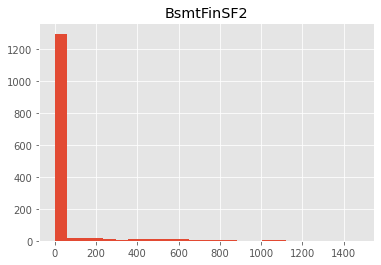

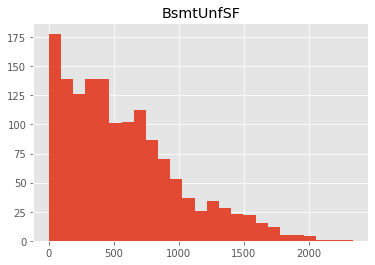

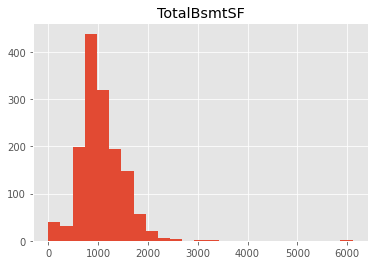

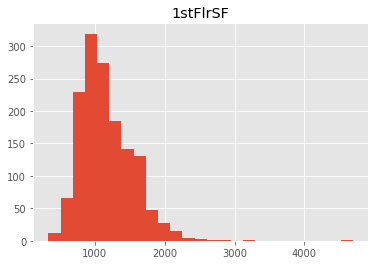

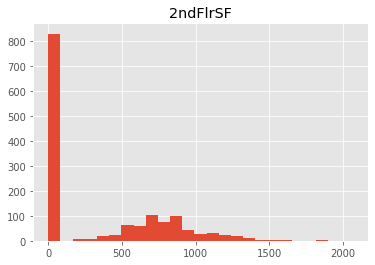

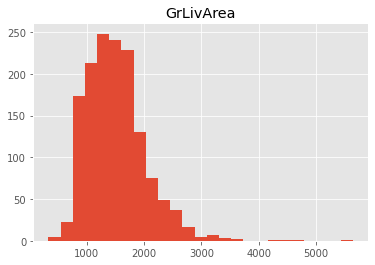

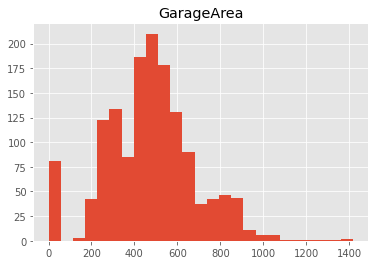

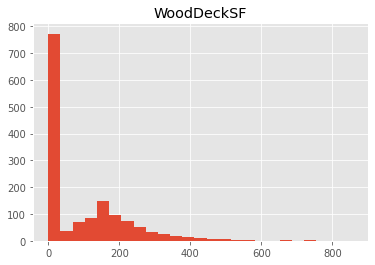

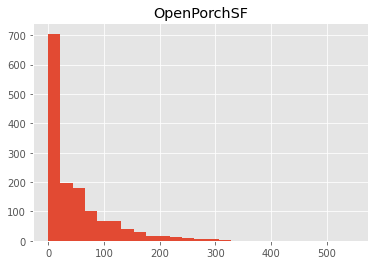

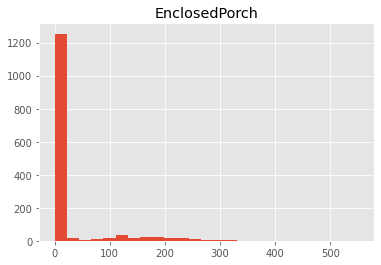

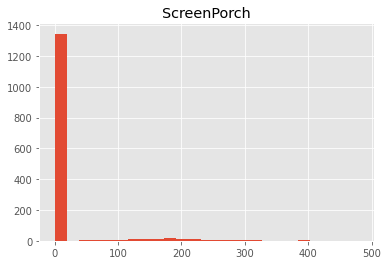

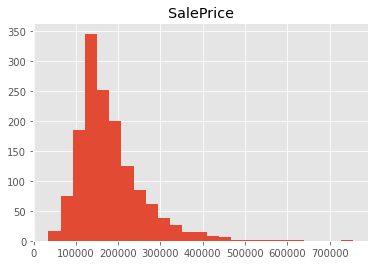

In [30]:
for col in actual_numerical:
    df[col].hist(bins = 25)
    plt.title(col)
    plt.show()

From the above histogram we can clearly see that most of the data is skewed. So, Normalization Required: Log Normal Distribution

### Log-Normal the Numerical Data

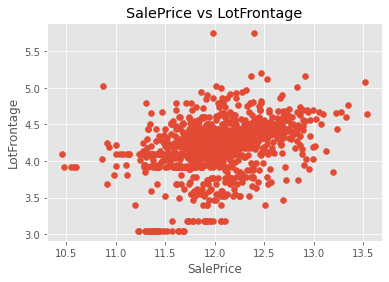

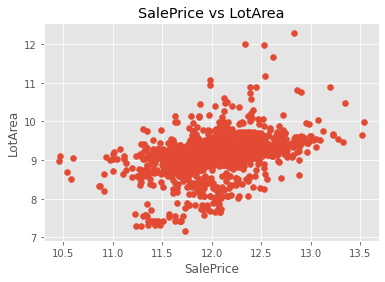

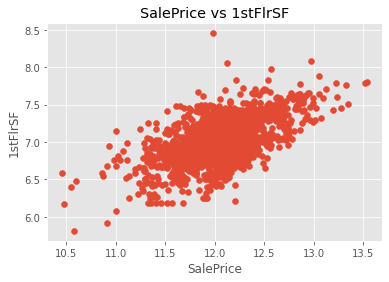

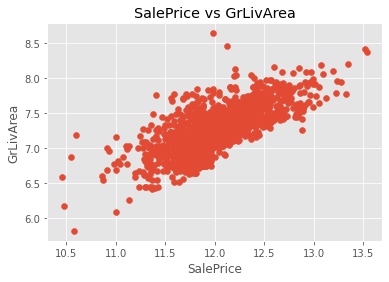

In [31]:
for col in actual_numerical[:-1]:
    dataset = df.copy()
    if 0 not in dataset[col].unique():
        dataset[col] = np.log(dataset[col])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        plt.scatter(x = dataset['SalePrice'], y = dataset[col])
        plt.xlabel('SalePrice')
        plt.ylabel(col)
        plt.title(f'SalePrice vs {col}')
        plt.show()
        
        

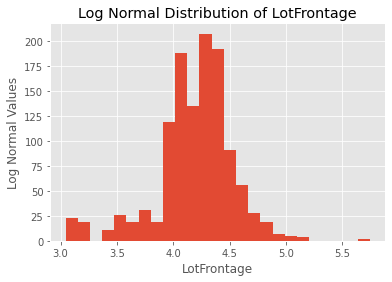

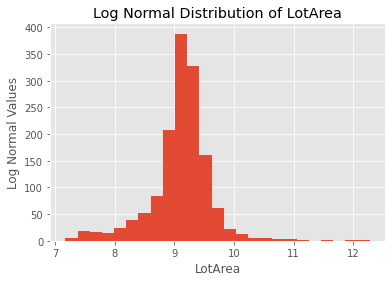

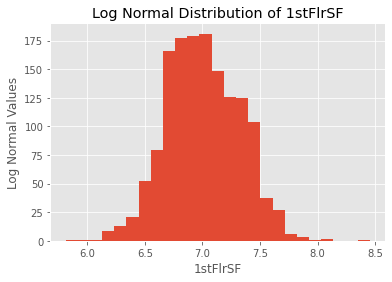

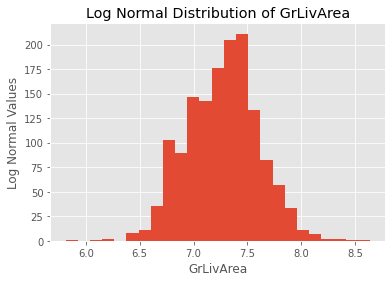

In [32]:
for col in actual_numerical[:-1]:
    dataset = df.copy()
    if 0 not in dataset[col].unique():
        dataset[col] = np.log(dataset[col])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        dataset[col].hist(bins = 25)
        plt.xlabel(col)
        plt.ylabel('Log Normal Values')
        plt.title(f'Log Normal Distribution of {col}')
        plt.show()

### Permanent Transformation of Columns to Log Normal Values 

In [33]:
dataset_corrected = df.copy()
for col in actual_numerical:
    if 0 in dataset_corrected[col].unique():
        pass
    else:
        dataset_corrected[col] = np.log(dataset_corrected[col])

In [34]:
dataset_corrected[actual_numerical].head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     4.174387  9.041922       196.0         706           0        150   
1     4.382027  9.169518         0.0         978           0        284   
2     4.219508  9.328123       162.0         486           0        434   
3     4.094345  9.164296         0.0         216           0        540   
4     4.430817  9.565214       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856  6.752270       854   7.444249         548           0   
1         1262  7.140453         0   7.140453         460         298   
2          920  6.824374       866   7.487734         608           0   
3          756  6.867974       756   7.448334         642           0   
4         1145  7.043160      1053   7.695303         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0  12.247694  
1            0              0            0  12.109011  
2           42              0            0  12.317167  
3           35            272            0  11.849398  
4           84              0            0  12.429216

### Checking for Outliers 

In [35]:
df[actual_numerical].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

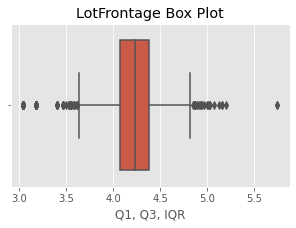

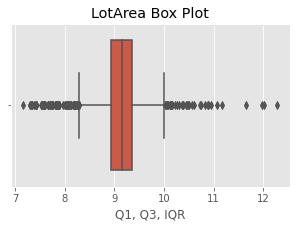

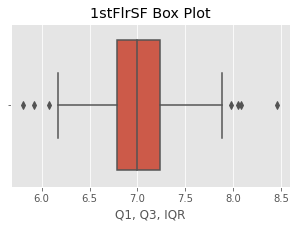

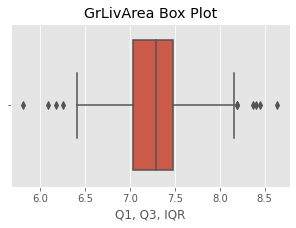

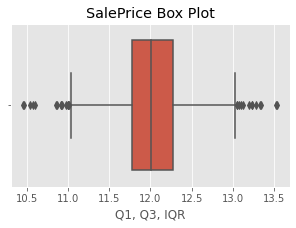

In [36]:
for col in actual_numerical:
    dataset = df.copy()
    if 0 not in np.unique(dataset[col]):
        dataset[col] = np.log(dataset[col])
        plt.figure(figsize = (5,3))
        sns.boxplot(dataset[col])
        plt.xlabel('Q1, Q3, IQR')
        plt.title(f'{col} Box Plot')
        plt.show()
    else:
        continue

### Checking for Categorical Features

In [37]:
df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

In [38]:
categorical_features = df.select_dtypes(include = 'O')
categorical_features.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

**Null Values Check**

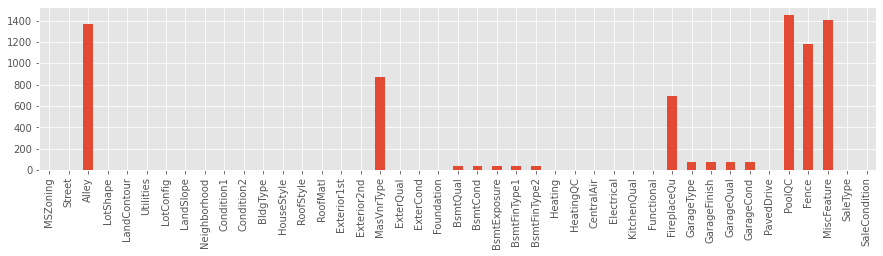

In [39]:
plt.figure(figsize = (15,3))
categorical_features.isnull().sum().plot(kind = 'bar')
plt.show()

In [40]:
for feature in categorical_features.columns:
    print(f'Unique features in {feature} are {categorical_features[feature].unique()}\n')

Unique features in MSZoning are ['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique features in Street are ['Pave' 'Grvl']

Unique features in Alley are [nan 'Grvl' 'Pave']

Unique features in LotShape are ['Reg' 'IR1' 'IR2' 'IR3']

Unique features in LandContour are ['Lvl' 'Bnk' 'Low' 'HLS']

Unique features in Utilities are ['AllPub' 'NoSeWa']

Unique features in LotConfig are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique features in LandSlope are ['Gtl' 'Mod' 'Sev']

Unique features in Neighborhood are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique features in Condition1 are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique features in Condition2 are ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Unique features in BldgType are ['1Fam' '2fmCon' 'D

In [41]:
for feature in categorical_features.columns:
    print(f'Unique features in {feature} are {len(categorical_features[feature].unique())}\n')

Unique features in MSZoning are 5

Unique features in Street are 2

Unique features in Alley are 3

Unique features in LotShape are 4

Unique features in LandContour are 4

Unique features in Utilities are 2

Unique features in LotConfig are 5

Unique features in LandSlope are 3

Unique features in Neighborhood are 25

Unique features in Condition1 are 9

Unique features in Condition2 are 8

Unique features in BldgType are 5

Unique features in HouseStyle are 8

Unique features in RoofStyle are 6

Unique features in RoofMatl are 8

Unique features in Exterior1st are 15

Unique features in Exterior2nd are 16

Unique features in MasVnrType are 4

Unique features in ExterQual are 4

Unique features in ExterCond are 5

Unique features in Foundation are 6

Unique features in BsmtQual are 5

Unique features in BsmtCond are 5

Unique features in BsmtExposure are 5

Unique features in BsmtFinType1 are 7

Unique features in BsmtFinType2 are 7

Unique features in Heating are 6

Unique features i

**Features with large number of unique features should be handled with care.**

### Relationship Between Sale Price and Categorical Features

In [42]:
categorical_features['SalePrice'] = df.iloc[:,-1]
categorical_features.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500  
3       WD       Abnorml     140000  
4       WD        Normal     250000

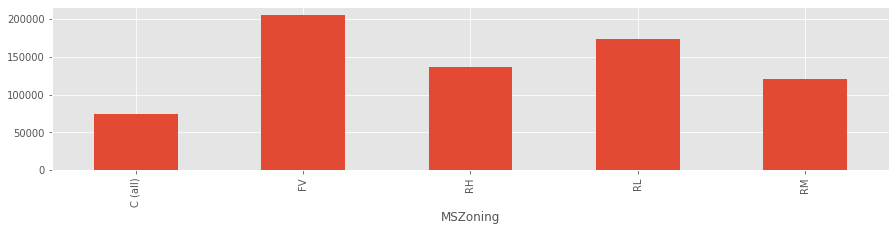

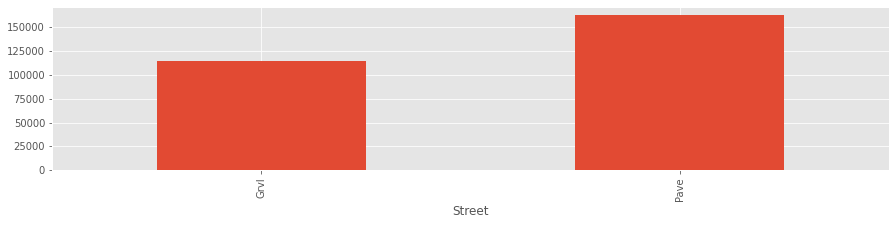

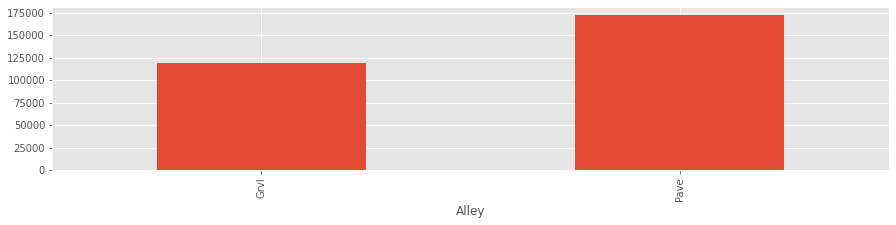

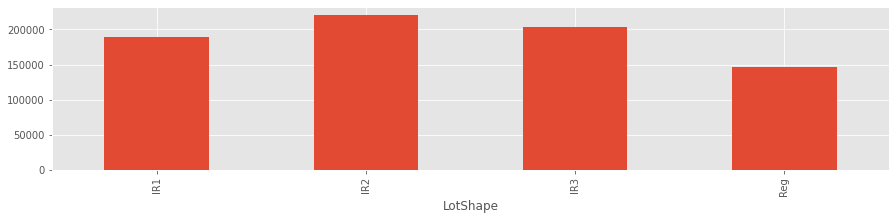

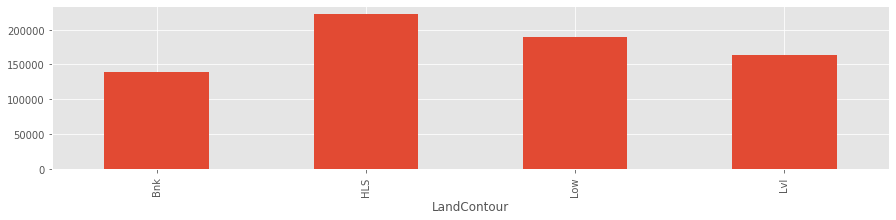

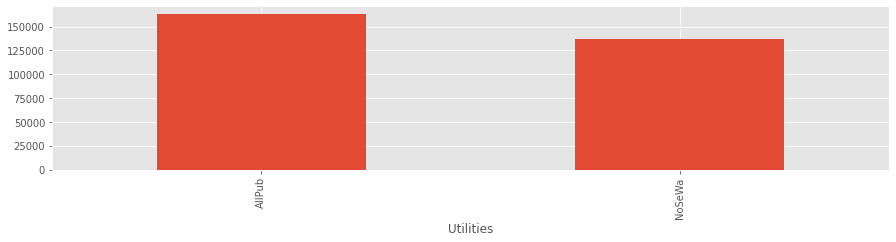

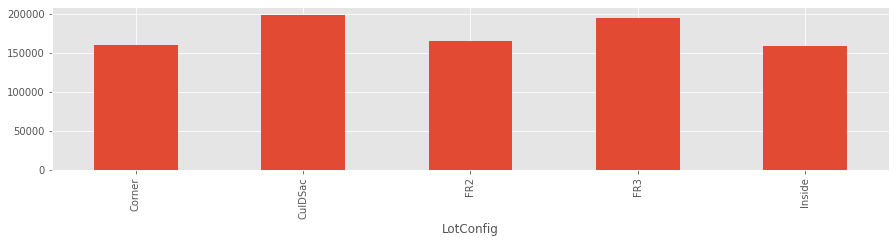

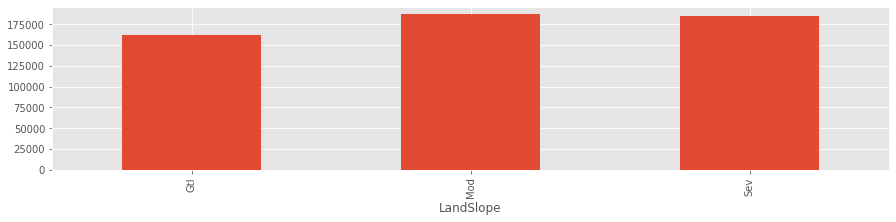

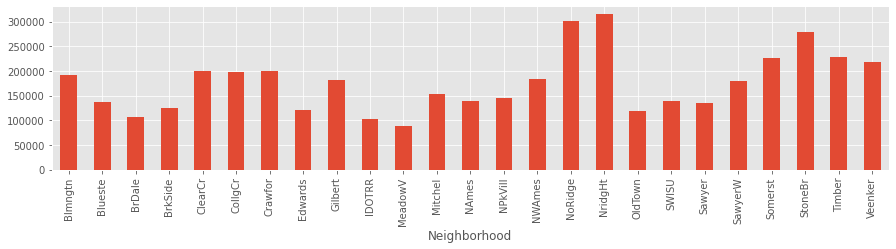

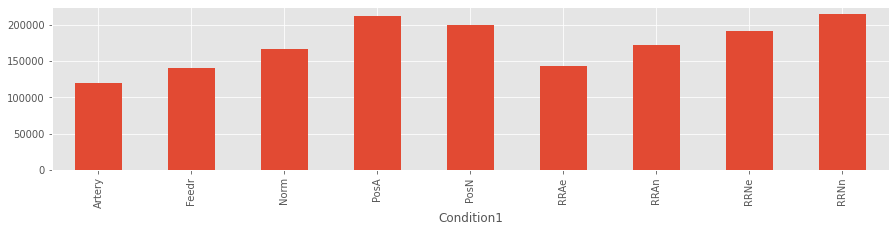

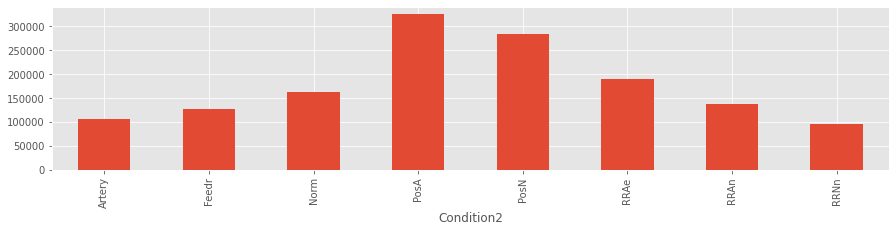

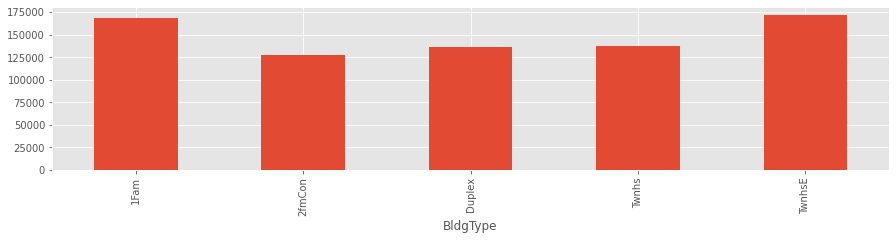

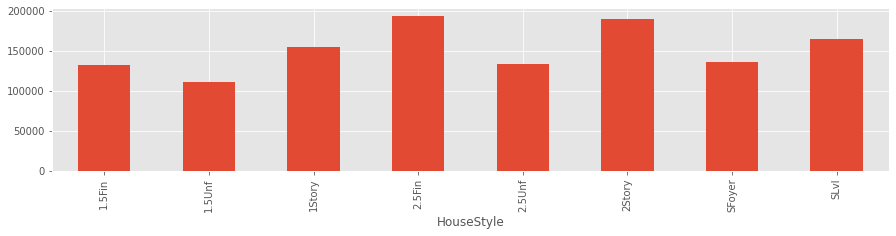

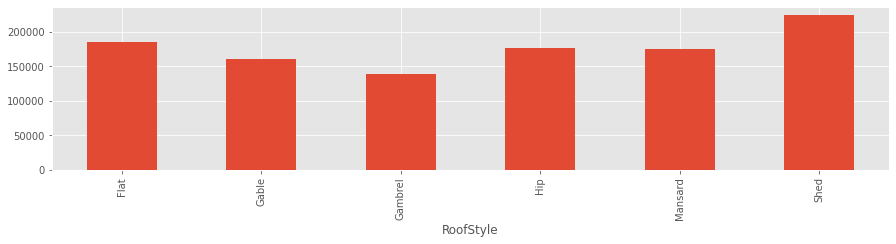

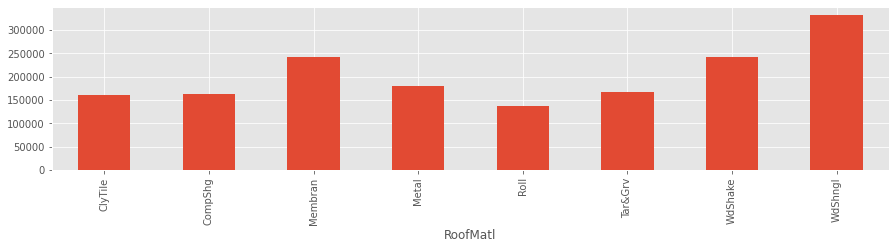

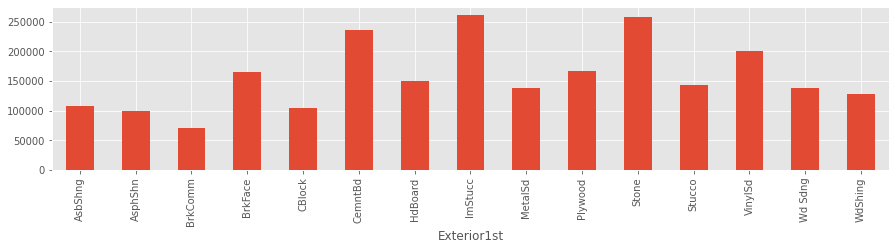

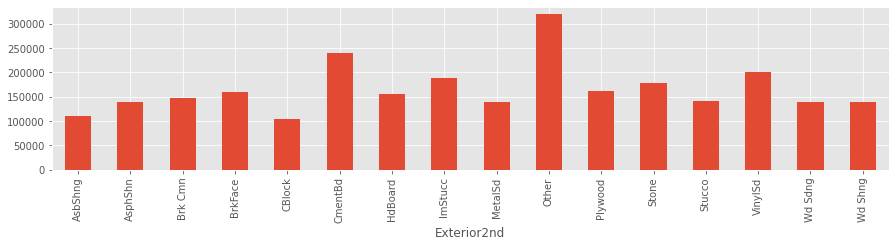

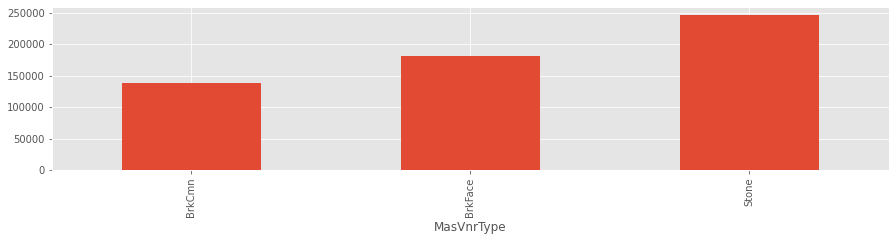

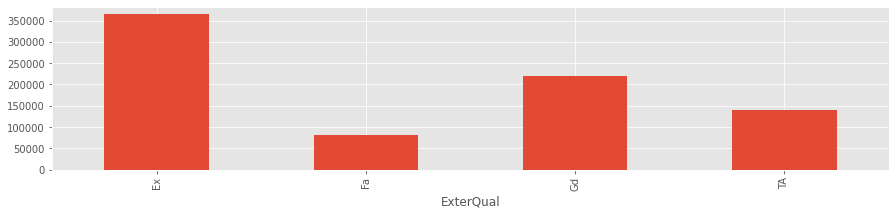

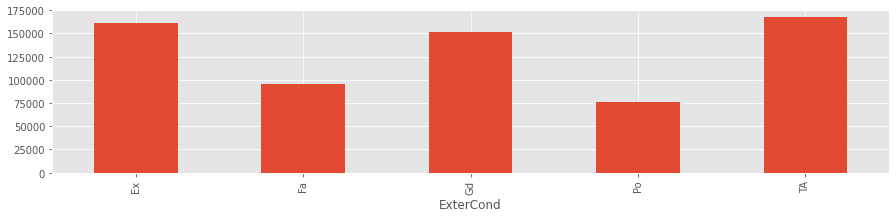

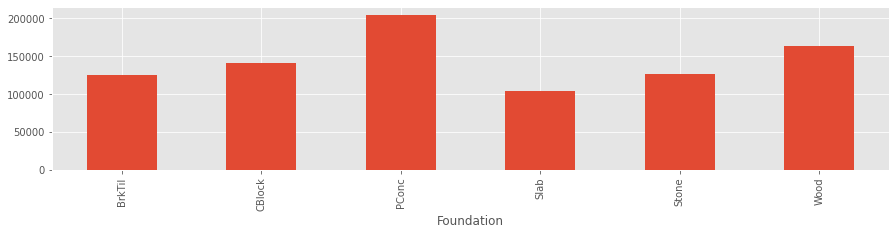

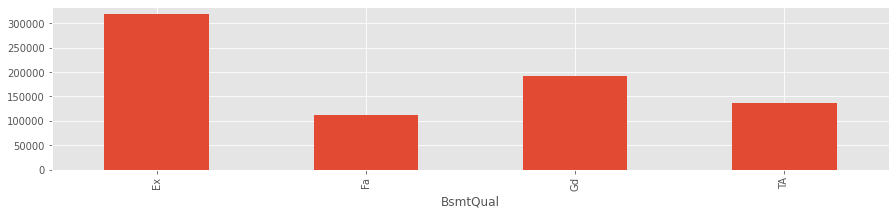

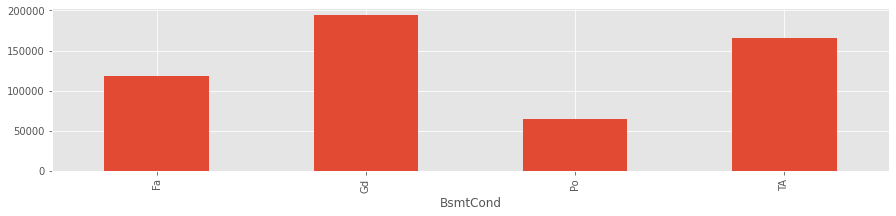

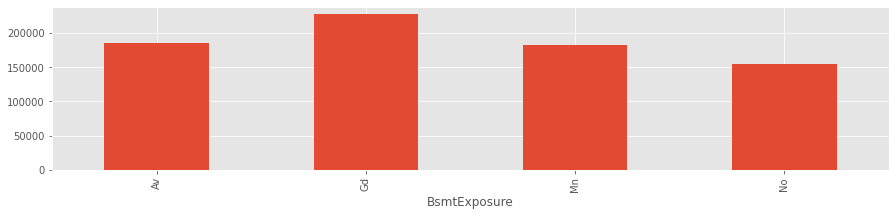

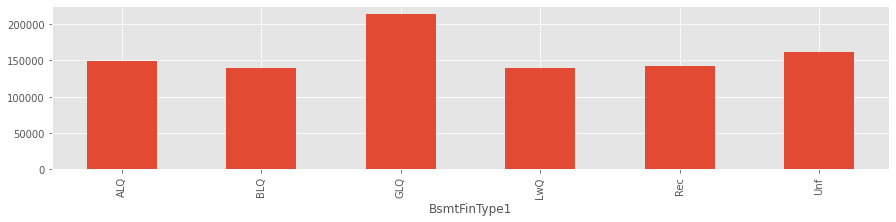

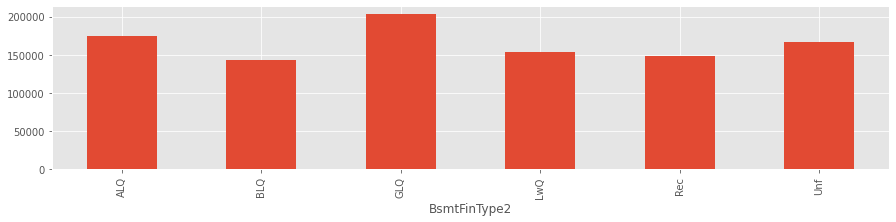

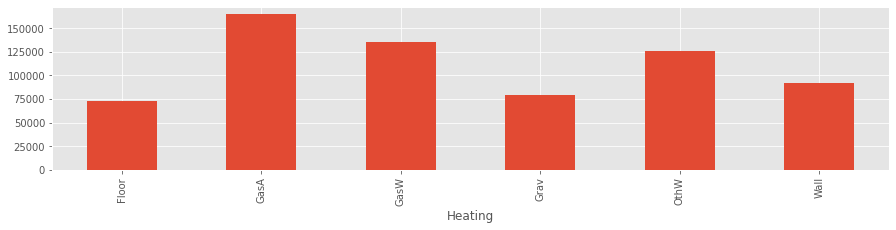

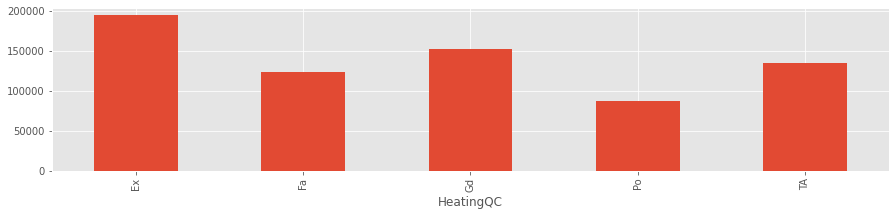

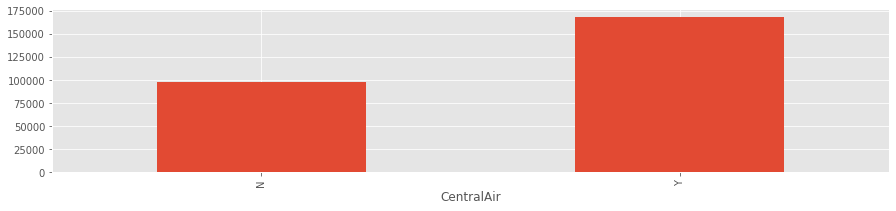

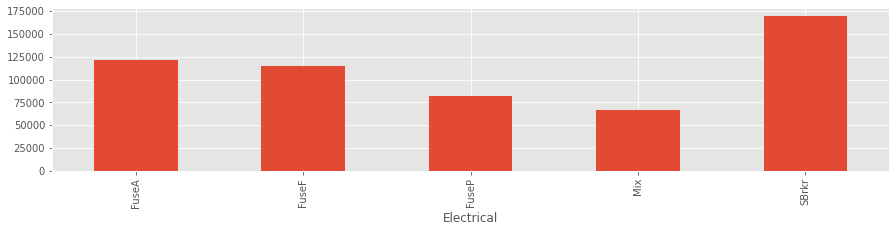

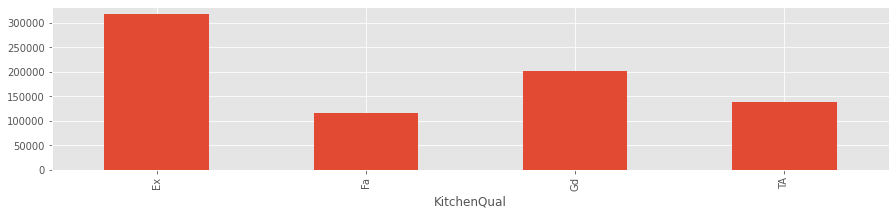

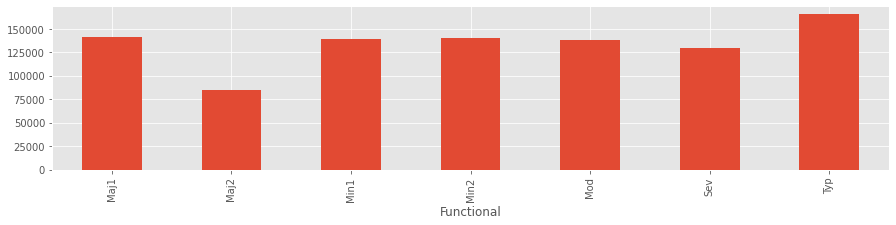

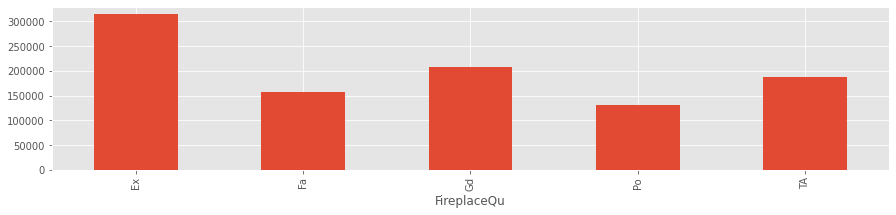

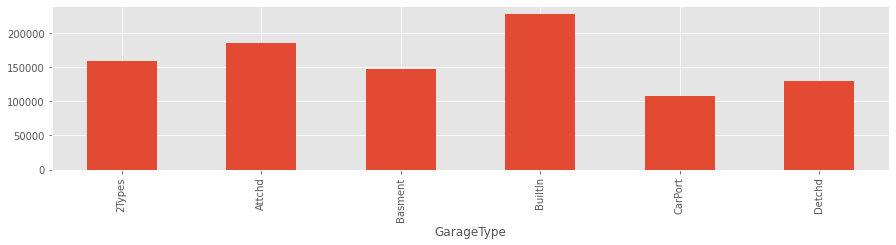

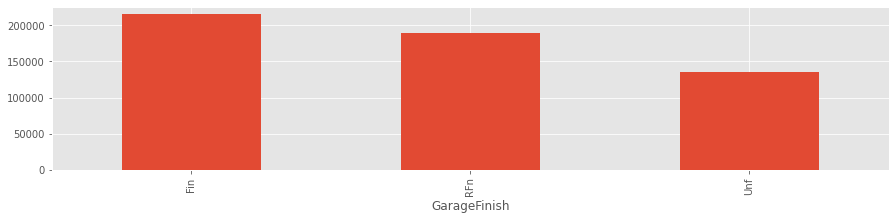

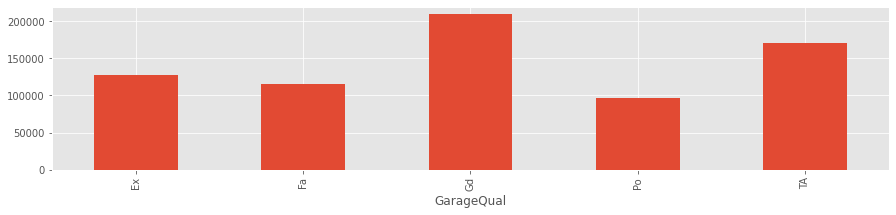

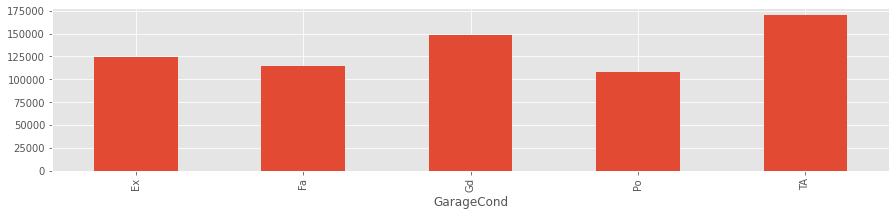

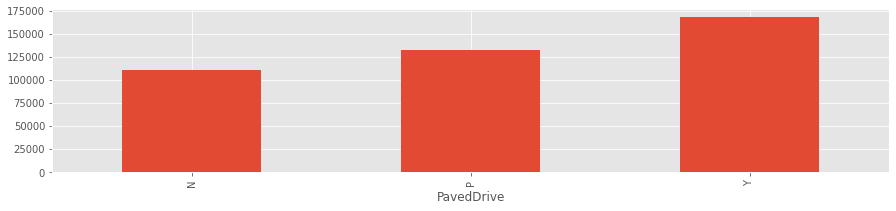

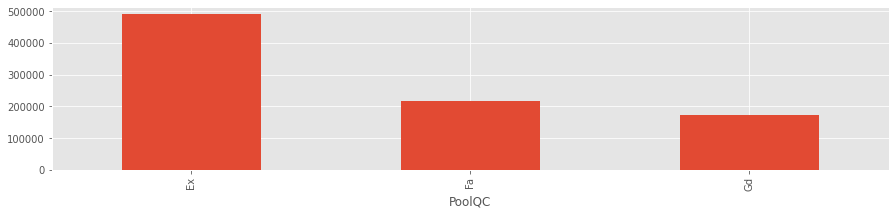

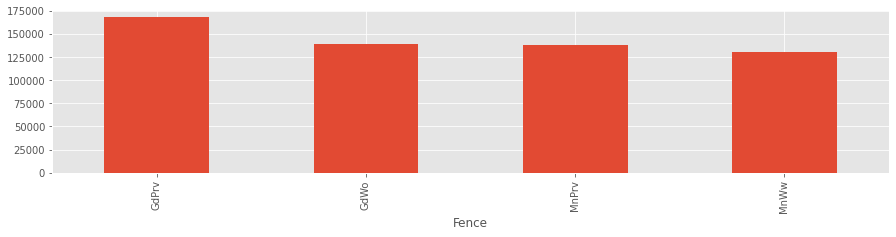

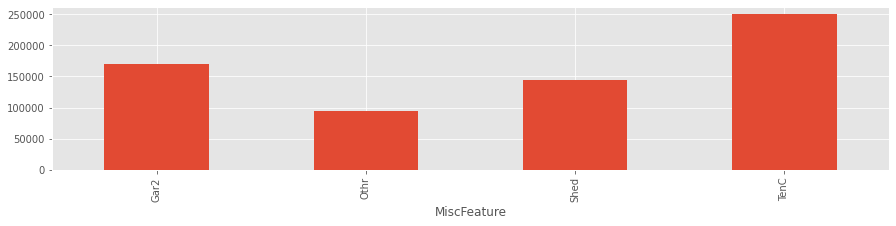

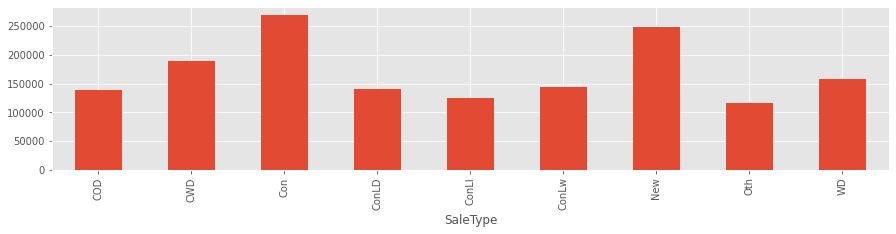

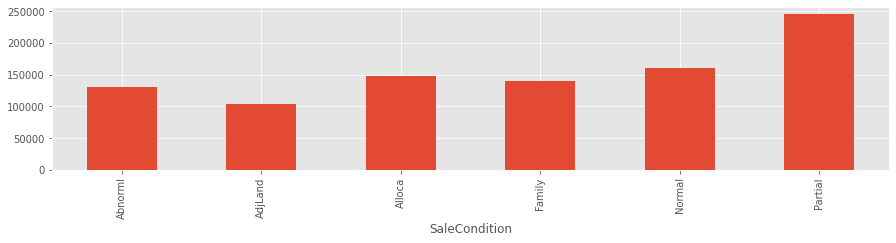

In [43]:
for col in categorical_features.columns[:-1]:
    plt.figure(figsize = (15,3))
    categorical_features.groupby([col])['SalePrice'].median().plot(kind = 'bar')
    plt.show()

### Handling Missing Values in Categorical Features 

In [44]:
##Replacing Null Values in Categorical Features with a New Value
for cols in categorical_features.columns[:-1]:
    dataset_corrected[cols] = dataset_corrected[cols].fillna('Missing')

In [45]:
dataset_corrected.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

### Handling Missing Values in Numerical Columns 

In [46]:
na_cols_numerical = []
for cols in actual_numerical:
    if dataset_corrected[cols].isnull().sum()>0:
        print(cols)
        na_cols_numerical.append(cols)

LotFrontage
MasVnrArea


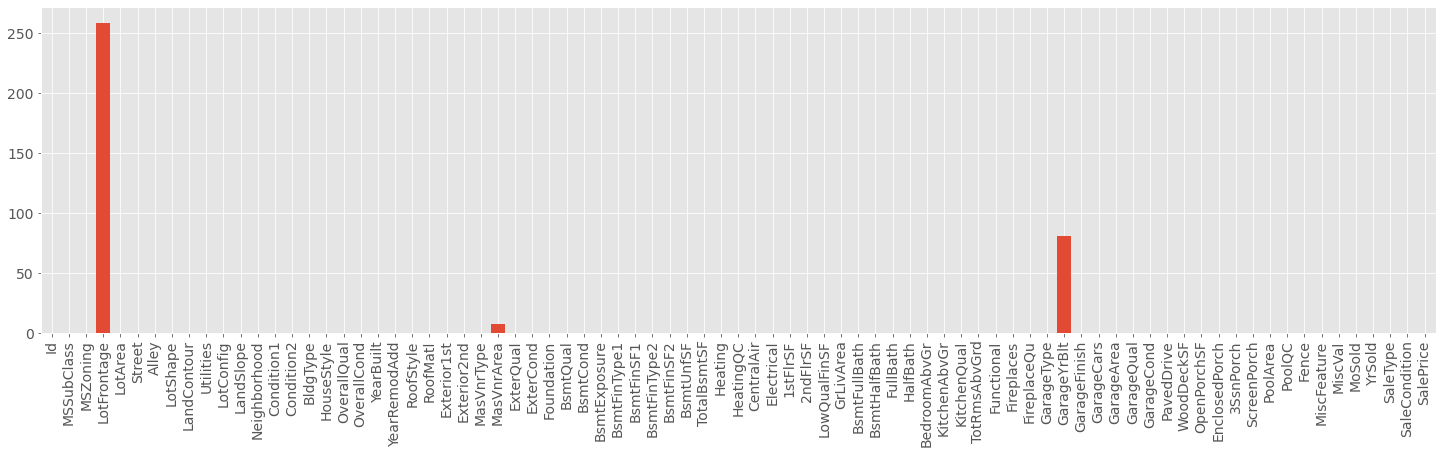

In [47]:
plt.figure(figsize = (25,6))
dataset_corrected.isnull().sum().plot(kind = 'bar', width = 0.8)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

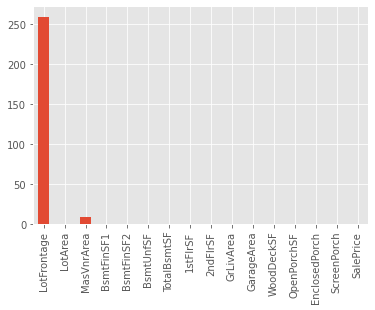

In [48]:
dataset_corrected[actual_numerical].isnull().sum().plot.bar()
plt.show()

In [49]:
for cols in na_cols_numerical:
    dataset_corrected [ cols+'nan'] = np.where(dataset_corrected[cols].isnull(),1,0)
    dataset_corrected[cols] = dataset_corrected[cols].fillna(dataset_corrected[cols].median())
    

In [50]:
dataset_corrected.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

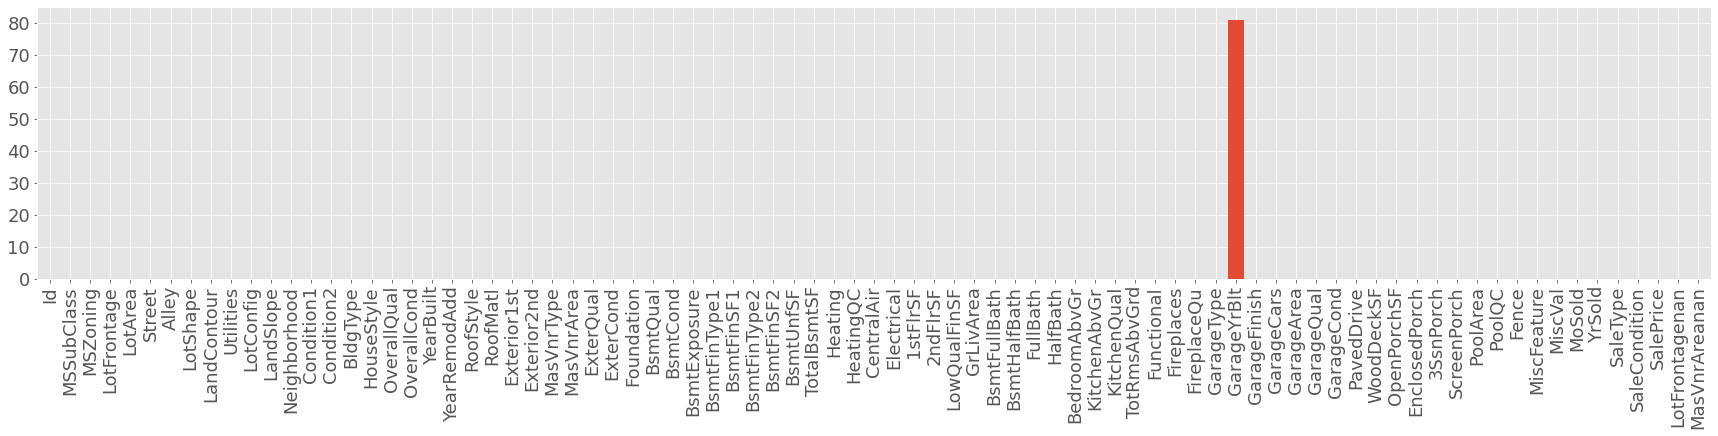

In [51]:
plt.figure(figsize = (30,5))
dataset_corrected.isnull().sum().plot(kind = 'bar', width = 0.8)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.show()

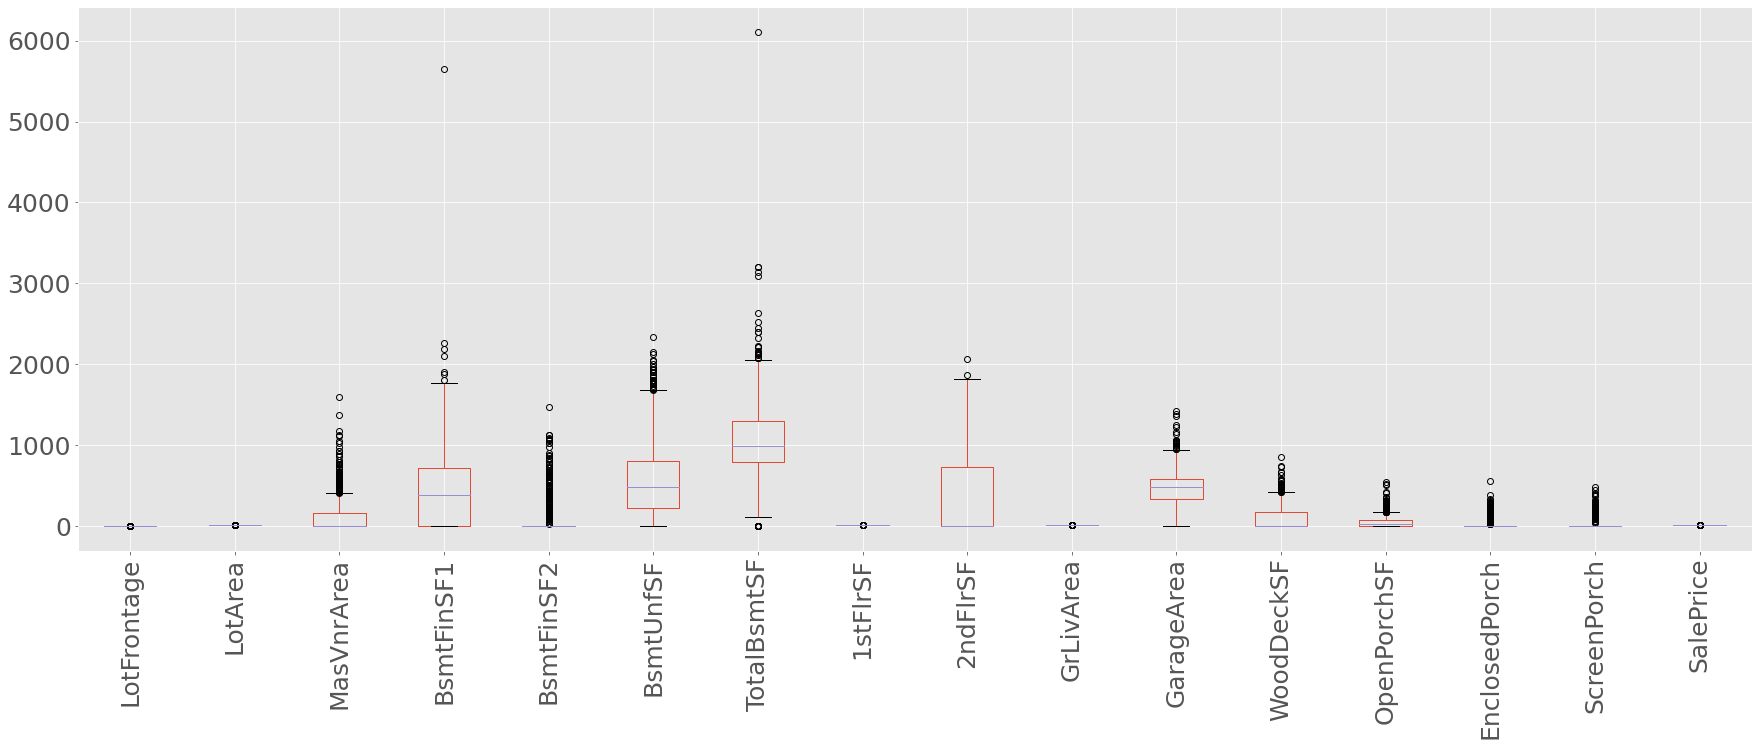

In [52]:
plt.figure(figsize = (30,10))
dataset_corrected[actual_numerical].boxplot()
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation = 90)
plt.show()

### Handling Temporal/ Datetime Data

<AxesSubplot:>

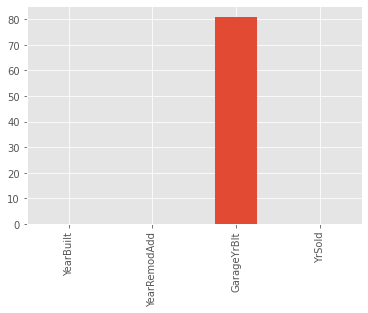

In [53]:
dataset_corrected[temporal_features].isnull().sum().plot(kind = 'bar')

In [54]:
per_missing = dataset_corrected['GarageYrBlt'].isnull().sum()/len(dataset_corrected['GarageYrBlt'])*100
print(f'{per_missing} data is missing in GarageYrBlt')

5.5479452054794525 data is missing in GarageYrBlt


In [55]:
for cols in temporal_features[:-1]:
    dataset_corrected[cols+ 'diff_Yr_Sold'] = dataset_corrected['YrSold']-dataset_corrected[cols]
    

In [56]:
new_cols = dataset_corrected.columns

In [57]:
new_cols = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'LotFrontagenan', 'MasVnrAreanan',
       'YearBuiltdiff_Yr_Sold', 'YearRemodAdddiff_Yr_Sold',
       'GarageYrBltdiff_Yr_Sold']

In [58]:
dataset_new = dataset_corrected[new_cols]
dataset_new.head(5)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd    Missing         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng    Missing         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.752270       854             0   7.444249   
1          Y      SBrkr  7.140453         0             0   7.140453   
2          Y      SBrkr  6.824374       866             0   7.487734   
3          Y      SBrkr  6.867974       756             0   7.448334   
4          Y      SBrkr  7.043160      1053             0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0     Missing     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd   

In [59]:
new_temporal_features = [col for col in dataset_new.columns if 'Yr' in col or 'Year' in col or 'yr' in col]

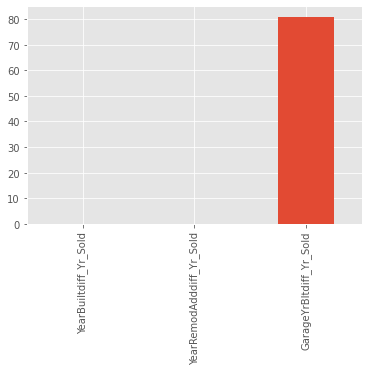

In [60]:
dataset_new[new_temporal_features].isnull().sum().plot(kind = 'bar')
plt.show()

In [61]:
dataset_new['GarageYrBltdiff_Yr_Sold'].fillna(dataset_new['GarageYrBltdiff_Yr_Sold'].median(),inplace = True)

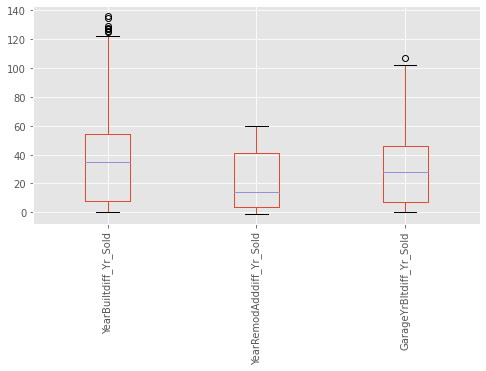

In [62]:
plt.figure(figsize = (8,4))
dataset_new[new_temporal_features].boxplot()
plt.xticks(rotation = 90)
plt.show()

### Analyzing Categorical Features

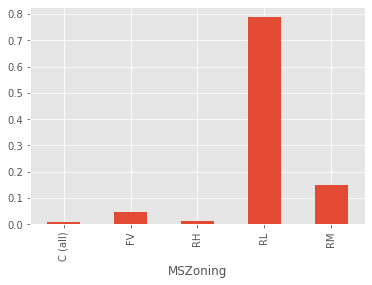

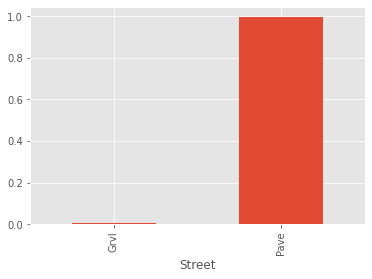

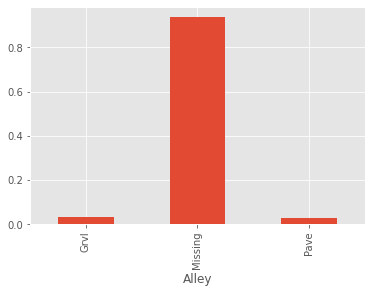

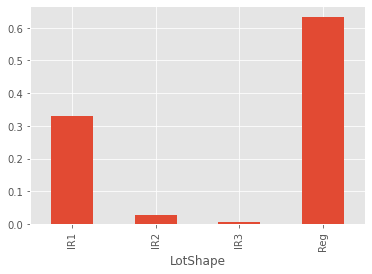

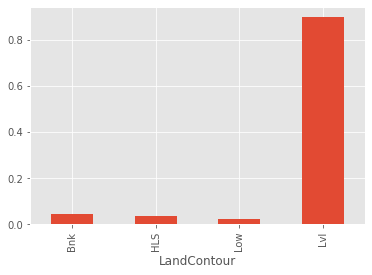

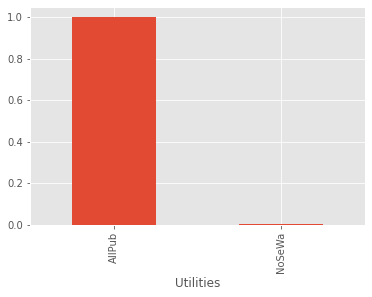

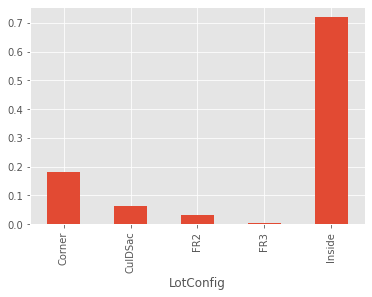

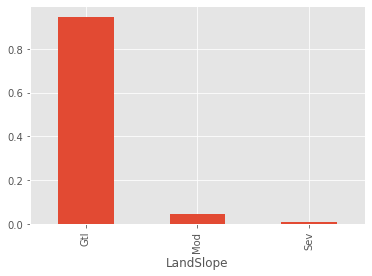

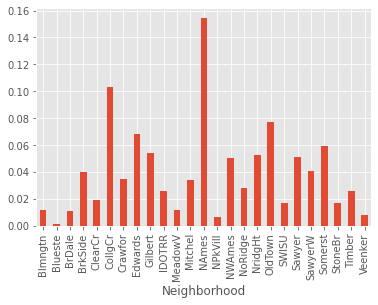

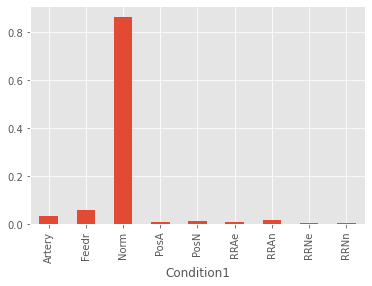

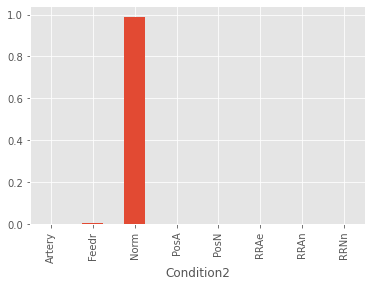

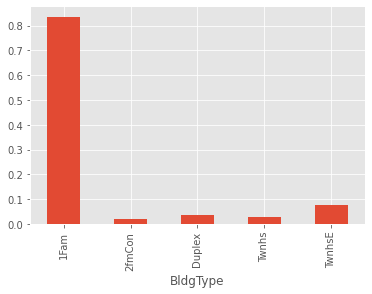

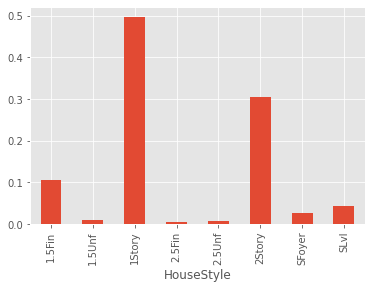

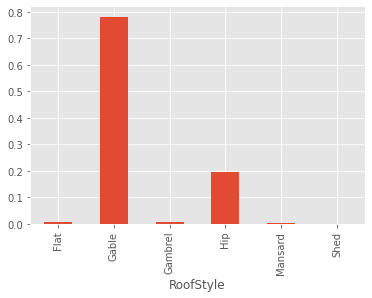

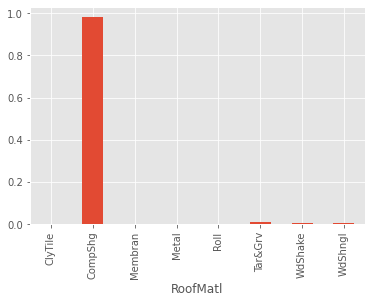

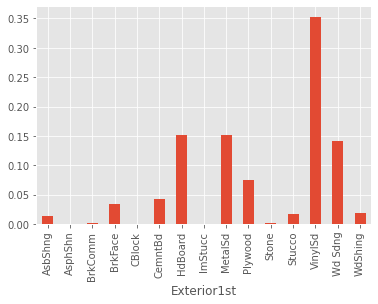

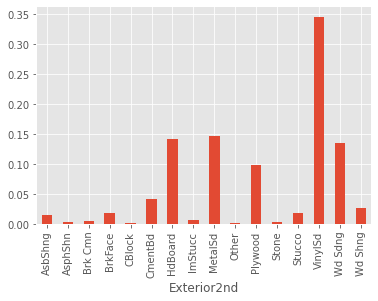

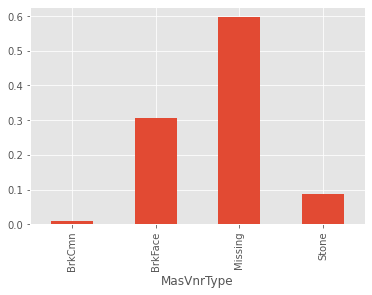

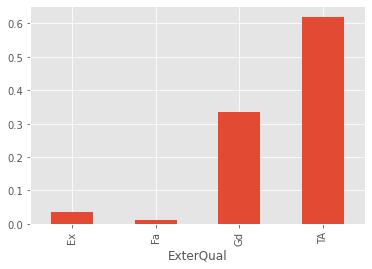

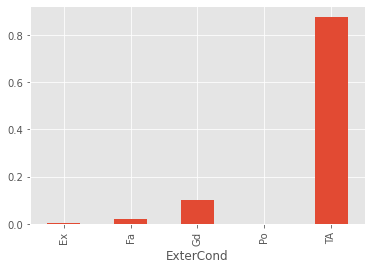

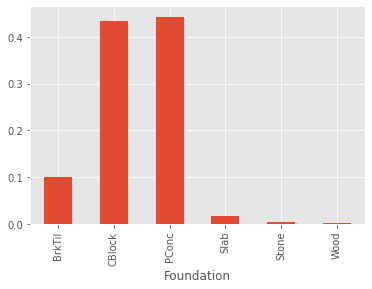

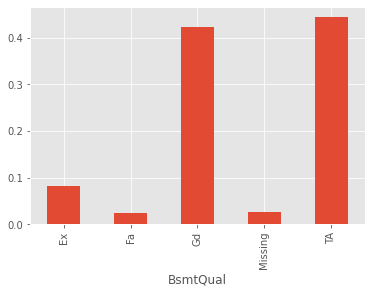

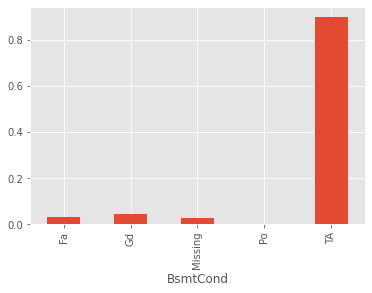

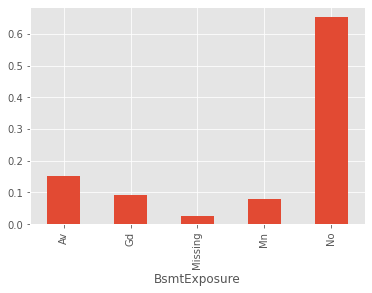

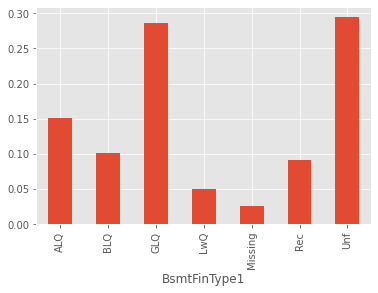

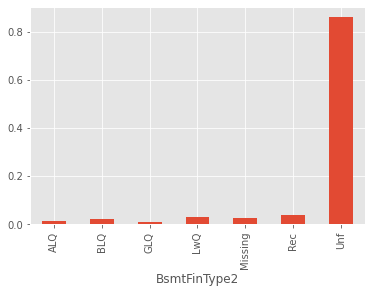

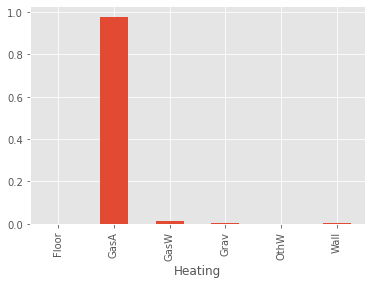

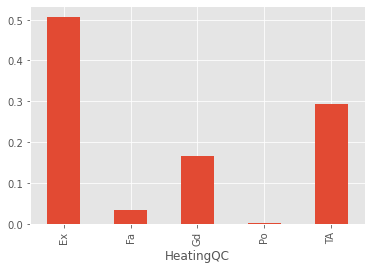

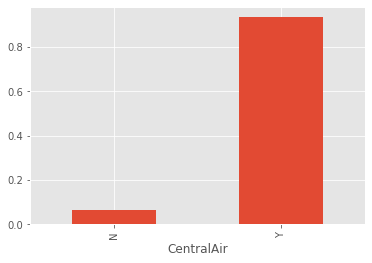

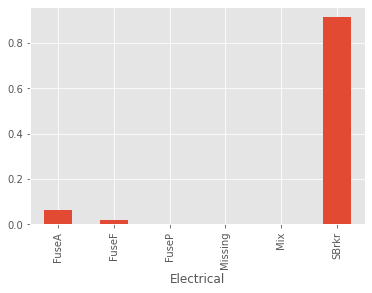

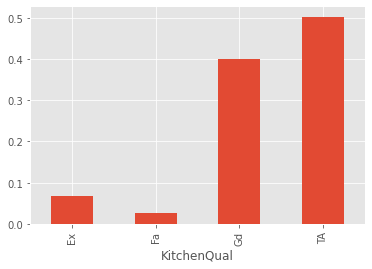

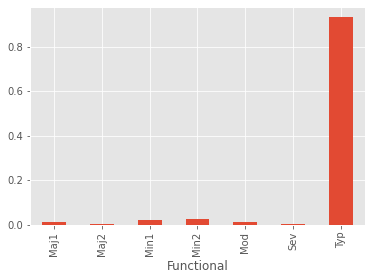

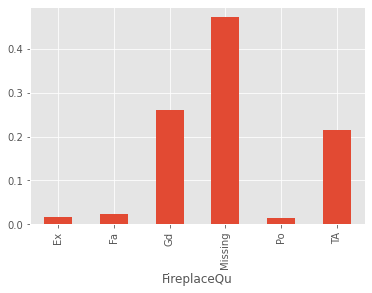

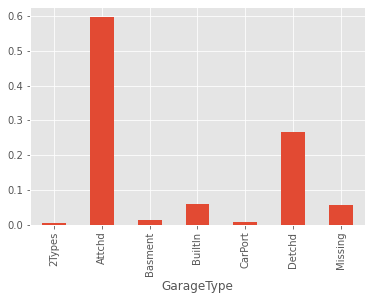

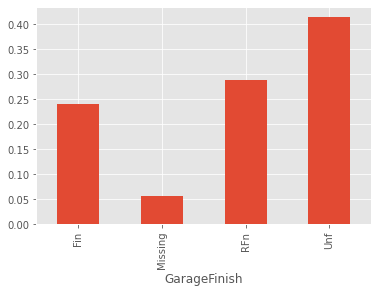

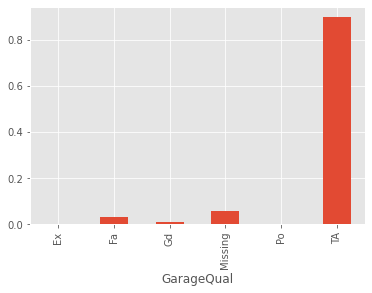

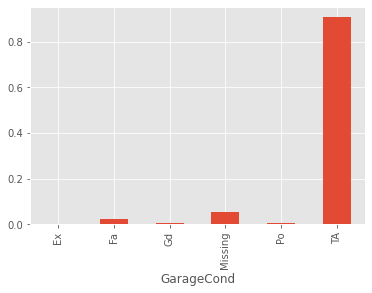

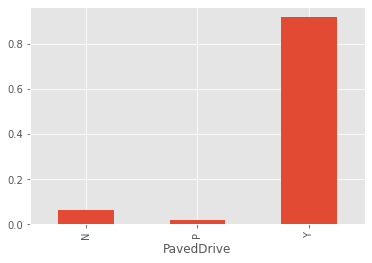

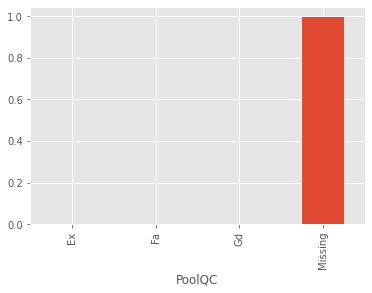

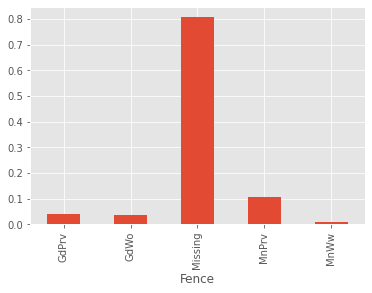

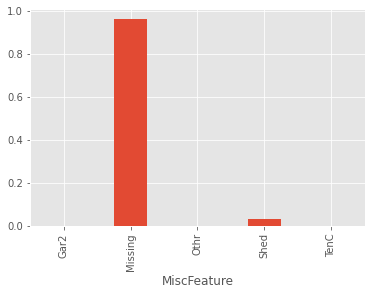

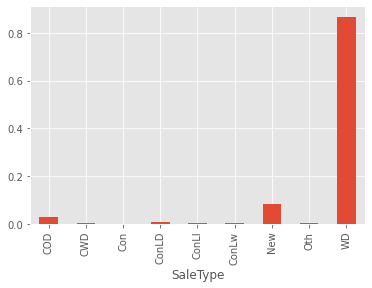

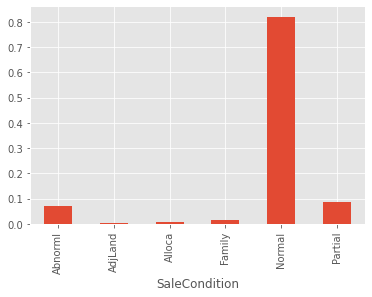

In [63]:
for cols in dataset_new[categorical_features.columns[:-1]]:
    contrib = dataset_new.groupby(cols)['SalePrice'].count()/len(dataset_new)
    contrib.plot(kind = 'bar')
    plt.show()

**Checking the contribution of each categorical types in the column for Sale Price Prediction**

In [64]:
cat_cols = categorical_features.columns[:-1]

In [65]:
check_df = dataset_new.copy()

In [66]:
for cols in cat_cols:
    contrib = (dataset_new.groupby(cols)['SalePrice'].count()/len(dataset_new))*100
    contrib_labels = contrib[contrib>1].index
    dataset_new[cols] = np.where(dataset_new[cols].isin(contrib_labels),dataset_new[cols],'Rare')


    

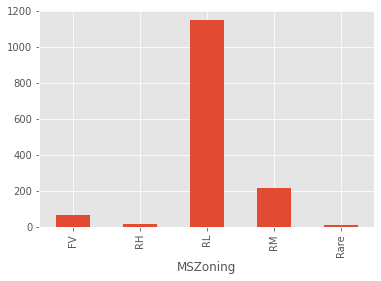

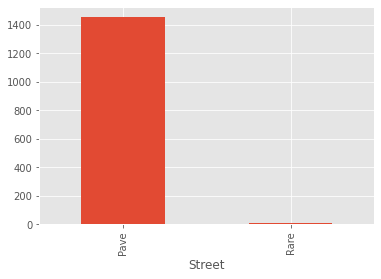

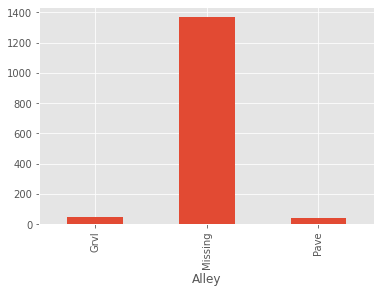

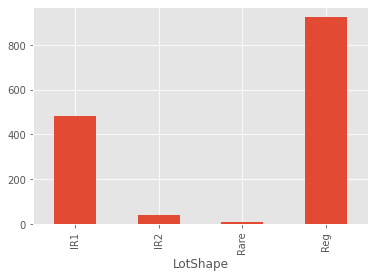

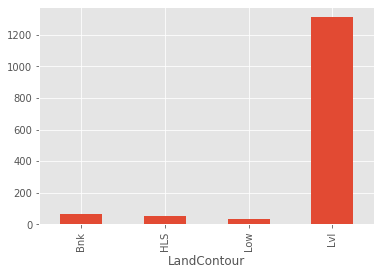

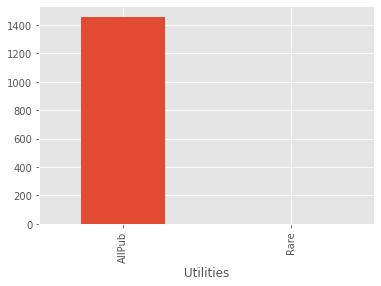

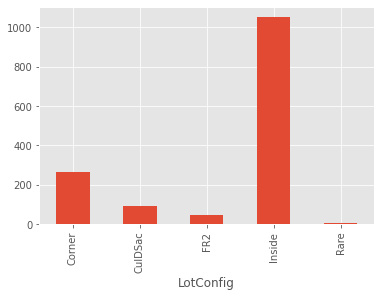

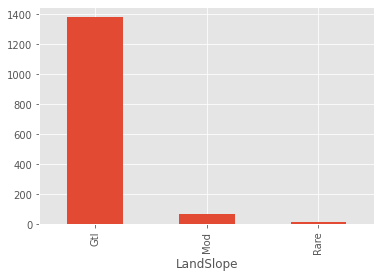

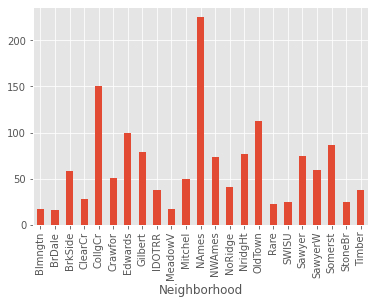

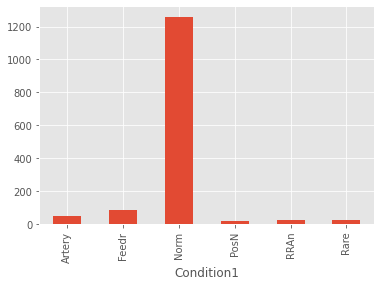

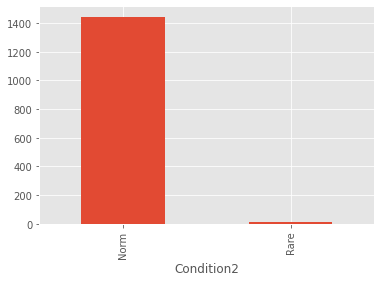

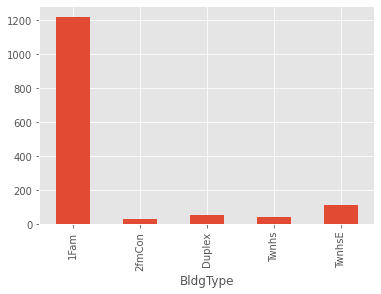

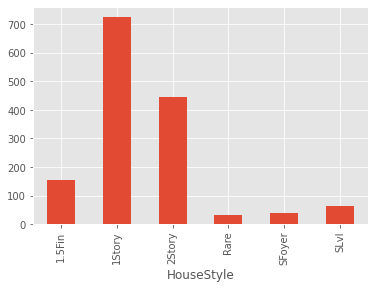

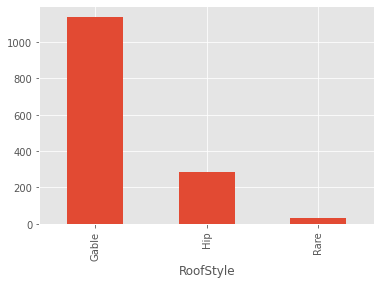

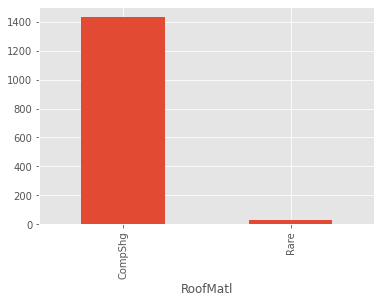

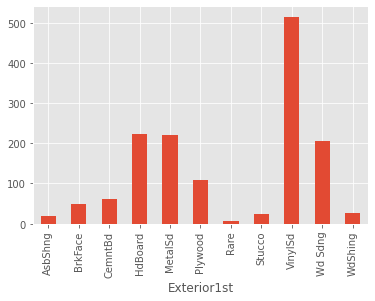

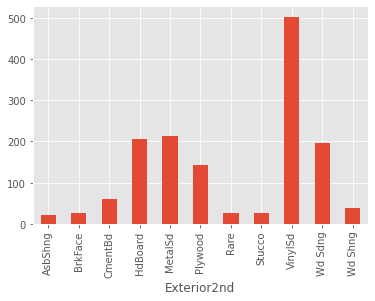

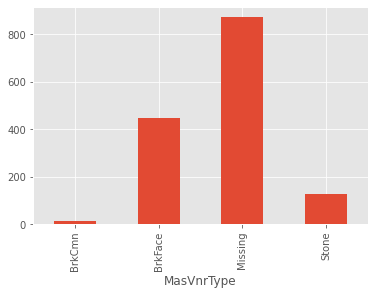

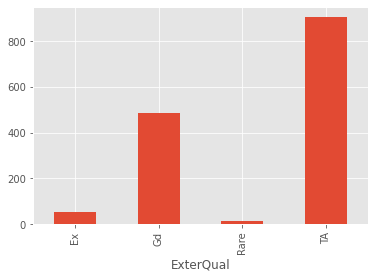

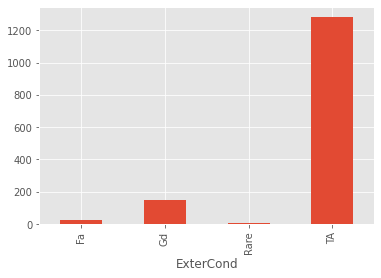

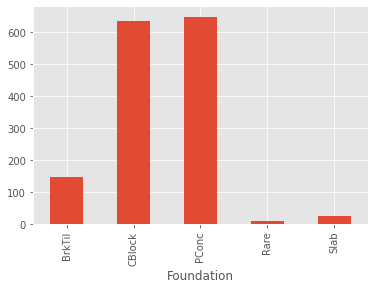

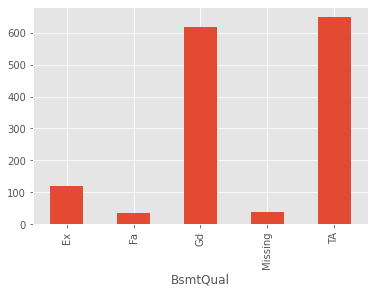

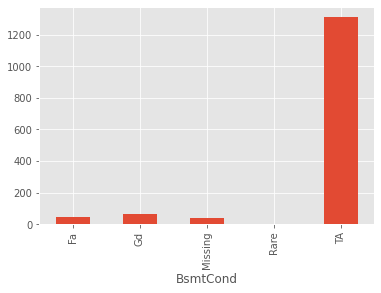

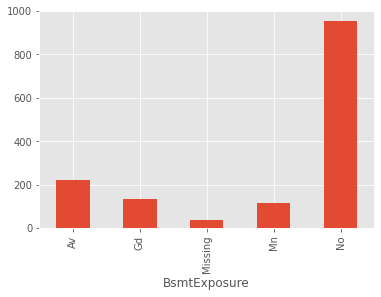

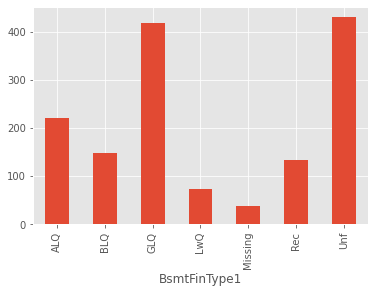

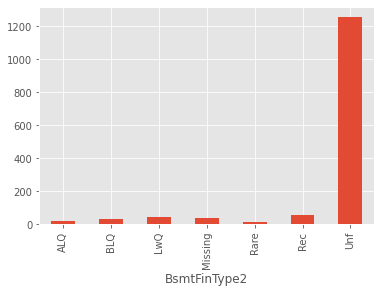

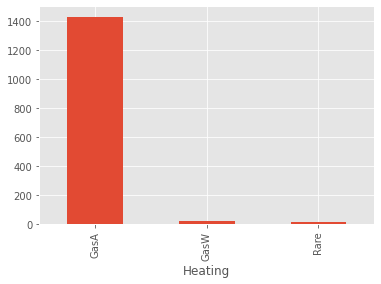

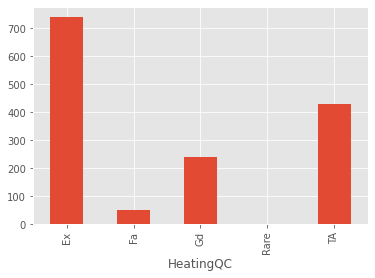

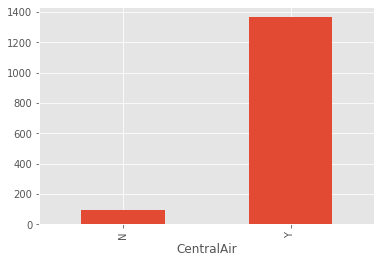

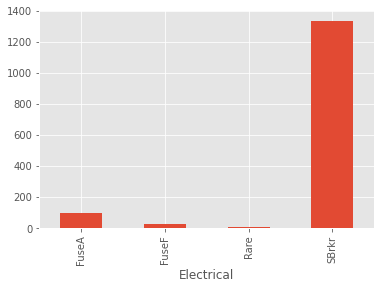

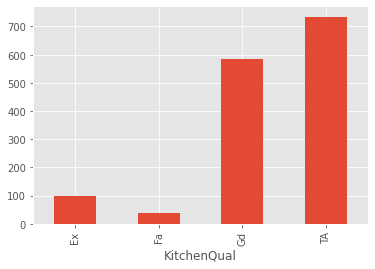

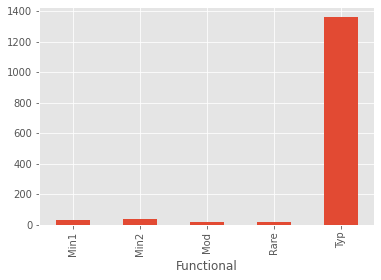

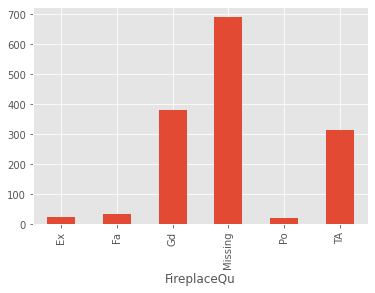

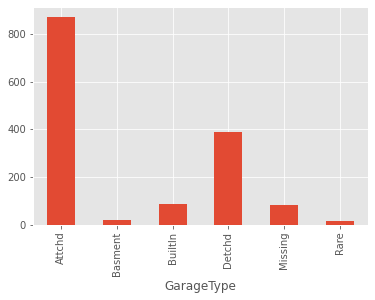

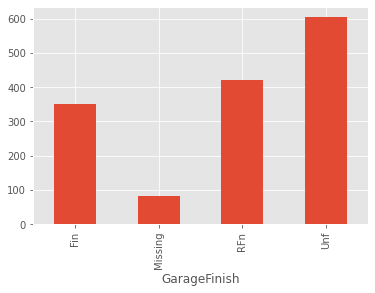

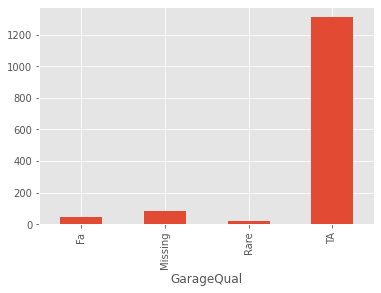

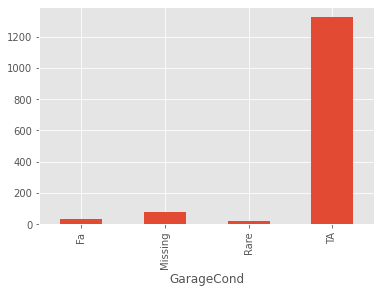

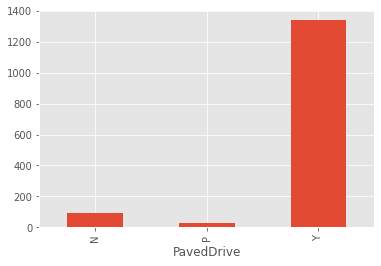

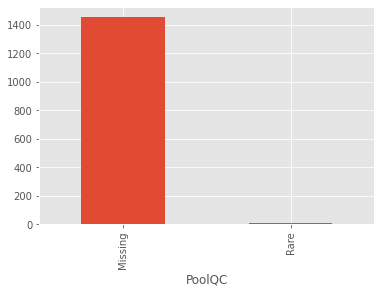

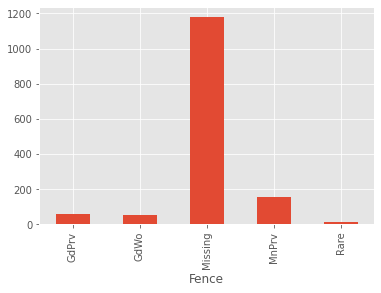

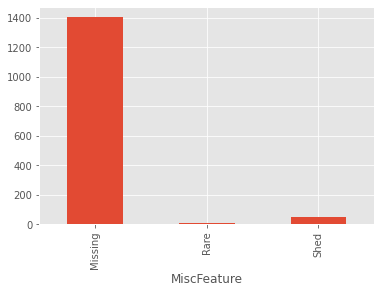

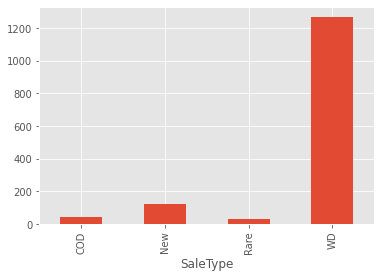

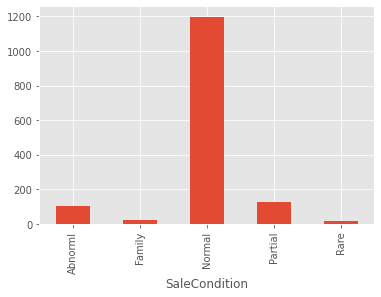

In [67]:
for cols in cat_cols:
    dataset_new.groupby(cols)['SalePrice'].count().plot(kind = 'bar')
    plt.show()

### Feature Scaling Numerical Data

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler_numerical = MinMaxScaler()
scaler_numerical.fit(dataset_new[actual_numerical[:-1]])

MinMaxScaler()

In [69]:
numerical_data = pd.DataFrame(scaler_numerical.transform(dataset_new[actual_numerical[:-1]]),
                              columns = actual_numerical[:-1])
numerical_data.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     0.418208  0.366344     0.12250    0.125089         0.0   0.064212   
1     0.495064  0.391317     0.00000    0.173281         0.0   0.121575   
2     0.434909  0.422359     0.10125    0.086109         0.0   0.185788   
3     0.388581  0.390295     0.00000    0.038271         0.0   0.231164   
4     0.513123  0.468761     0.21875    0.116052         0.0   0.209760   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0     0.140098  0.356155  0.413559   0.577712    0.386460    0.000000   
1     0.206547  0.503056  0.000000   0.470245    0.324401    0.347725   
2     0.150573  0.383441  0.419370   0.593095    0.428773    0.000000   
3     0.123732  0.399941  0.366102   0.579157    0.452750    0.000000   
4     0.187398  0.466237  0.509927   0.666523    0.589563    0.224037   

   OpenPorchSF  EnclosedPorch  ScreenPorch  
0     0.111517       0.000000          0.0  
1     0.000000       0.000000          0.0  
2     0.076782       0.000000          0.0  
3     0.063985       0.492754          0.0  
4     0.153565       0.000000          0.0

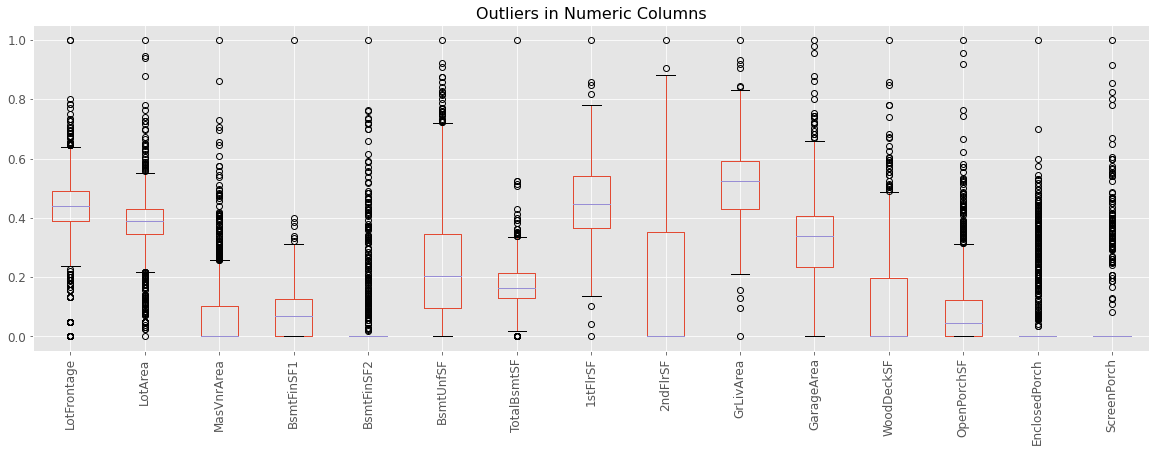

In [70]:
plt.figure(figsize = (20,6))
numerical_data.boxplot()
plt.title("Outliers in Numeric Columns", fontsize = 16)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.show()

In [71]:
dataset_new[actual_numerical[:-1]] = numerical_data
dataset_new.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     0.418208  0.366344   Pave  Missing      Reg   
1   2          20       RL     0.495064  0.391317   Pave  Missing      Reg   
2   3          60       RL     0.434909  0.422359   Pave  Missing      IR1   
3   4          70       RL     0.388581  0.390295   Pave  Missing      IR1   
4   5          60       RL     0.513123  0.468761   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl         Rare      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace     0.12250        Gd        TA   
1     MetalSd     MetalSd    Missing     0.00000        TA        TA   
2     VinylSd     VinylSd    BrkFace     0.10125        Gd        TA   
3     Wd Sdng     Wd Shng    Missing     0.00000        TA        TA   
4     VinylSd     VinylSd    BrkFace     0.21875        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ    0.125089   
1     CBlock       Gd       TA           Gd          ALQ    0.173281   
2      PConc       Gd       TA           Mn          GLQ    0.086109   
3     BrkTil       TA       Gd           No          ALQ    0.038271   
4      PConc       Gd       TA           Av          GLQ    0.116052   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0   0.064212     0.140098    GasA        Ex   
1          Unf         0.0   0.121575     0.206547    GasA        Ex   
2          Unf         0.0   0.185788     0.150573    GasA        Ex   
3          Unf         0.0   0.231164     0.123732    GasA        Gd   
4          Unf         0.0   0.209760     0.187398    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  0.356155  0.413559             0   0.577712   
1          Y      SBrkr  0.503056  0.000000             0   0.470245   
2          Y      SBrkr  0.383441  0.419370             0   0.593095   
3          Y      SBrkr  0.399941  0.366102             0   0.579157   
4          Y      SBrkr  0.466237  0.509927             0   0.666523   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0     Missing     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd   

### Feature Scaling Discrete Numerical Data  and Temporal Data

In [72]:
discrete_numerical_data = [col for col in dataset_new.select_dtypes('int') if col not in actual_numerical+['Id']]
discrete_numerical_data = discrete_numerical_data+['GarageYrBltdiff_Yr_Sold']
scaler_discrete_numerical_data = MinMaxScaler()
scaler_discrete_numerical_data.fit(dataset_new[discrete_numerical_data])
dataset_new[discrete_numerical_data] = scaler_discrete_numerical_data.transform(dataset_new[discrete_numerical_data])

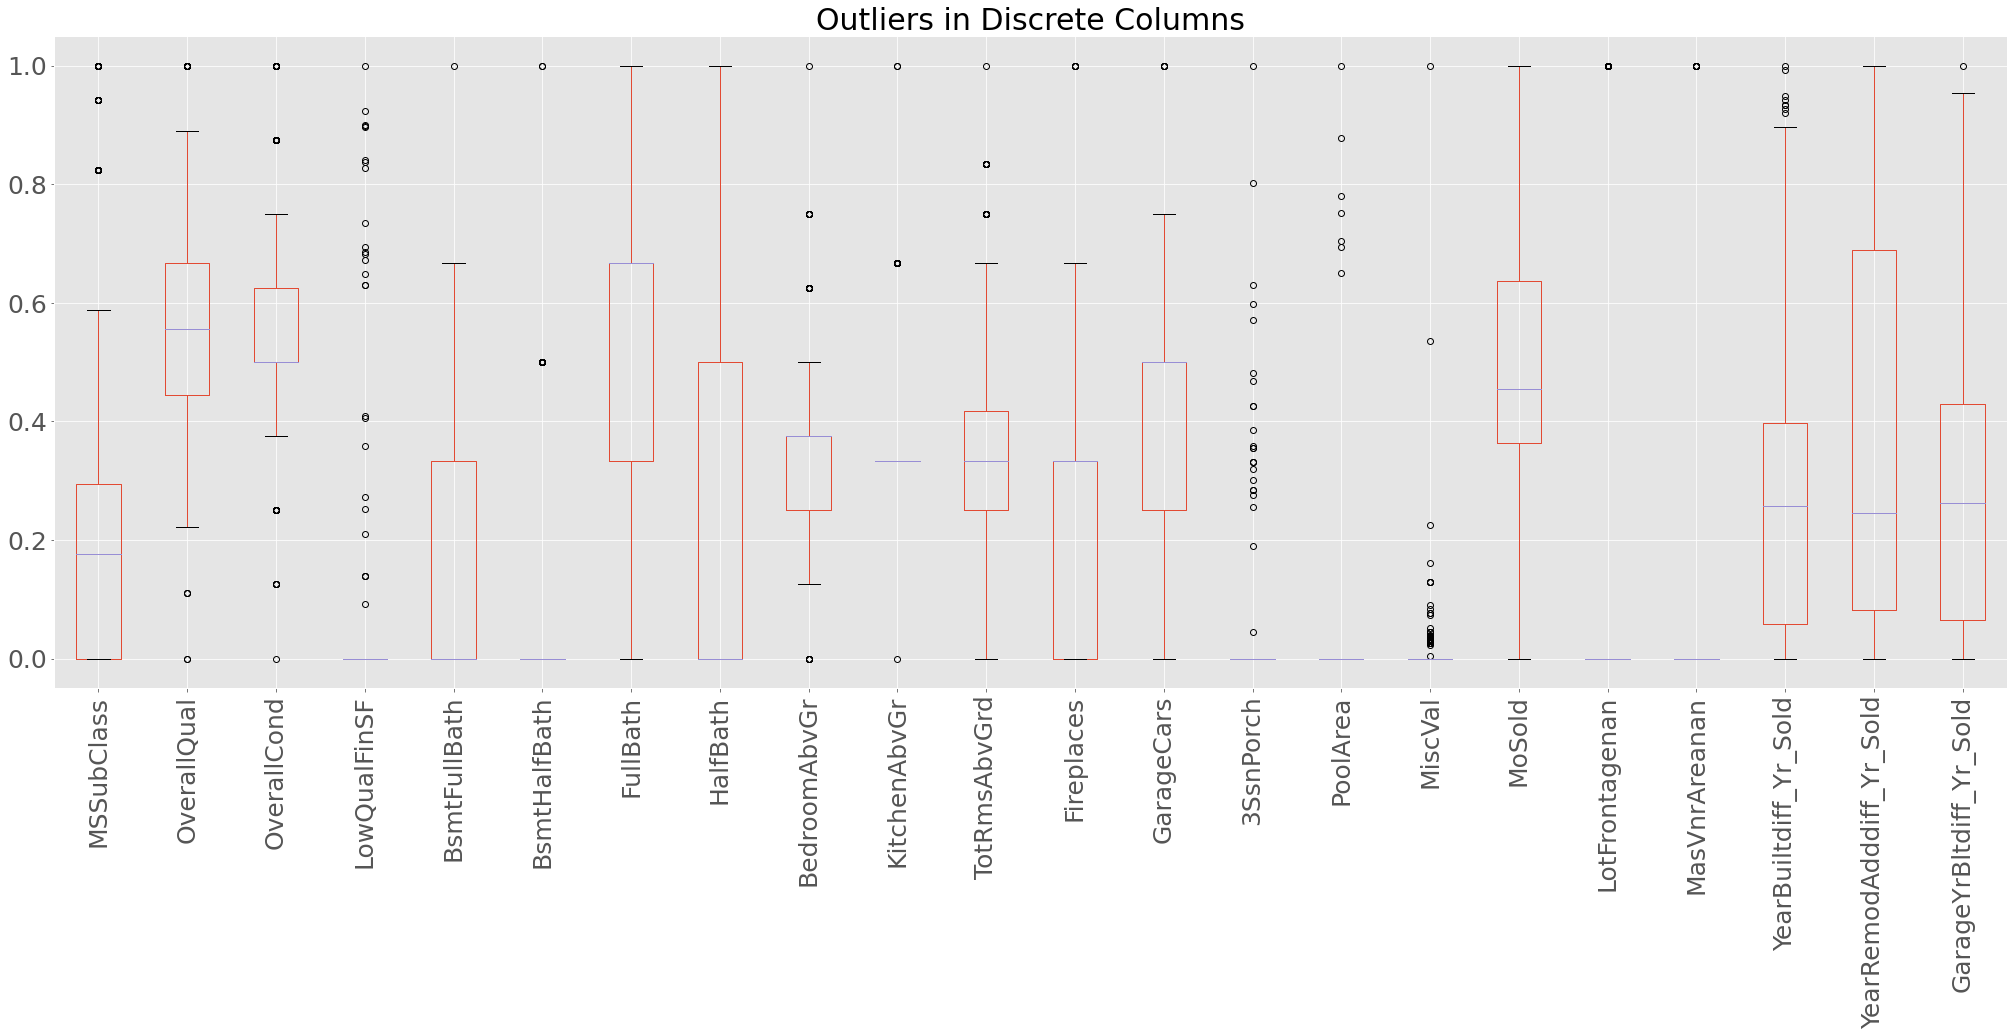

In [73]:
plt.figure(figsize = (35,12))
dataset_new[discrete_numerical_data].boxplot()
plt.xticks(rotation = 90, fontsize = 25)
plt.yticks(fontsize = 25)
plt.title("Outliers in Discrete Columns", fontsize = 30)
plt.show()


### Encoding Categorical Columns 

In [74]:
from sklearn.preprocessing import OneHotEncoder
cat_onehot_encoder = OneHotEncoder(categories='auto')
cat_onehot_encoder.fit(dataset_new[cat_cols])

OneHotEncoder()

In [75]:
encoded = cat_onehot_encoder.transform(dataset_new[cat_cols]).toarray()
encoded.shape

(1460, 212)

In [76]:
cat_labels = cat_onehot_encoder.get_feature_names()
cat_labels = np.array(cat_labels).ravel()

In [77]:
onehot_cat = pd.DataFrame(encoded, columns=cat_labels)
onehot_cat.head()

x0_FV  x0_RH  x0_RL  x0_RM  x0_Rare  x1_Pave  x1_Rare  x2_Grvl  x2_Missing  \
0    0.0    0.0    1.0    0.0      0.0      1.0      0.0      0.0         1.0   
1    0.0    0.0    1.0    0.0      0.0      1.0      0.0      0.0         1.0   
2    0.0    0.0    1.0    0.0      0.0      1.0      0.0      0.0         1.0   
3    0.0    0.0    1.0    0.0      0.0      1.0      0.0      0.0         1.0   
4    0.0    0.0    1.0    0.0      0.0      1.0      0.0      0.0         1.0   

   x2_Pave  x3_IR1  x3_IR2  x3_Rare  x3_Reg  x4_Bnk  x4_HLS  x4_Low  x4_Lvl  \
0      0.0     0.0     0.0      0.0     1.0     0.0     0.0     0.0     1.0   
1      0.0     0.0     0.0      0.0     1.0     0.0     0.0     0.0     1.0   
2      0.0     1.0     0.0      0.0     0.0     0.0     0.0     0.0     1.0   
3      0.0     1.0     0.0      0.0     0.0     0.0     0.0     0.0     1.0   
4      0.0     1.0     0.0      0.0     0.0     0.0     0.0     0.0     1.0   

   x5_AllPub  x5_Rare  x6_Corner  x6_CulDSac  x6_FR2  x6_Inside  x6_Rare  \
0        1.0      0.0        0.0         0.0     0.0        1.0      0.0   
1        1.0      0.0        0.0         0.0     1.0        0.0      0.0   
2        1.0      0.0        0.0         0.0     0.0        1.0      0.0   
3        1.0      0.0        1.0         0.0     0.0        0.0      0.0   
4        1.0      0.0        0.0         0.0     1.0        0.0      0.0   

   x7_Gtl  x7_Mod  x7_Rare  x8_Blmngtn  x8_BrDale  x8_BrkSide  x8_ClearCr  \
0     1.0     0.0      0.0         0.0        0.0         0.0         0.0   
1     1.0     0.0      0.0         0.0        0.0         0.0         0.0   
2     1.0     0.0      0.0         0.0        0.0         0.0         0.0   
3     1.0     0.0      0.0         0.0        0.0         0.0         0.0   
4     1.0     0.0      0.0         0.0        0.0         0.0         0.0   

   x8_CollgCr  x8_Crawfor  x8_Edwards  x8_Gilbert  x8_IDOTRR  x8_MeadowV  \
0         1.0         0.0         0.0         0.0        0.0         0.0   
1         0.0         0.0         0.0         0.0        0.0         0.0   
2         1.0         0.0         0.0         0.0        0.0         0.0   
3         0.0         1.0         0.0         0.0        0.0         0.0   
4         0.0         0.0         0.0         0.0        0.0         0.0   

   x8_Mitchel  x8_NAmes  x8_NWAmes  x8_NoRidge  x8_NridgHt  x8_OldTown  \
0         0.0       0.0        0.0         0.0         0.0         0.0   
1         0.0       0.0        0.0         0.0         0.0         0.0   
2         0.0       0.0        0.0         0.0         0.0         0.0   
3         0.0       0.0        0.0         0.0         0.0         0.0   
4         0.0       0.0        0.0         1.0         0.0         0.0   

   x8_Rare  x8_SWISU  x8_Sawyer  x8_SawyerW  x8_Somerst  x8_StoneBr  \
0      0.0       0.0        0.0         0.0         0.0         0.0   
1      1.0       0.0        0.0         0.0         0.0         0.0   
2      0.0       0.0        0.0         0.0         0.0         0.0   
3      0.0       0.0        0.0         0.0         0.0         0.0   
4      0.0       0.0        0.0         0.0         0.0         0.0   

   x8_Timber  x9_Artery  x9_Feedr  x9_Norm  x9_PosN  x9_RRAn  x9_Rare  \
0        0.0        0.0       0.0      1.0      0.0      0.0      0.0   
1        0.0        0.0       1.0      0.0      0.0      0.0      0.0   
2        0.0        0.0       0.0      1.0      0.0      0.0      0.0   
3        0.0        0.0       0.0      1.0      0.0      0.0      0.0   
4        0.0        0.0       0.0      1.0      0.0      0.0      0.0   

   x10_Norm  x10_Rare  x11_1Fam  x11_2fmCon  x11_Duplex  x11_Twnhs  \
0       1.0       0.0       1.0         0.0         0.0        0.0   
1       1.0       0.0       1.0         0.0         0.0        0.0   
2       1.0       0.0       1.0         0.0         0.0        0.0   
3       1.0       0.0       1.0         0.0         0.0        0.0   
4  

### Checking Multicollinearity Between Different Columns 

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity
VIF<5, Moderate Multicollinearity
VIF>5, Extreme Multicollinearity (This is what we have to avoid)
Source: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = onehot_cat.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(onehot_cat.values, i)
                          for i in range(len(onehot_cat.columns))]

The infinity shows perfect correlation thus checking pca performance

### PCA in onehot encoded 

In [79]:
trans_onehot_cat = onehot_cat.transpose()

In [80]:
trans_onehot_cat.head()

0     1     2     3     4     5     6     7     8     9     10    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   
x0_RM     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         11    12    13    14    15    16    17    18    19    20    21    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   
x0_RM     0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         22    23    24    25    26    27    28    29    30    31    32    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   
x0_RM     0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   

         33    34    35    36    37    38    39    40    41    42    43    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
x0_RM     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         44    45    46    47    48    49    50    51    52    53    54    \
x0_FV     0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   1.0   
x0_RM     0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         55    56    57    58    59    60    61    62    63    64    65    \
x0_FV     0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   0.0   1.0   1.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   
x0_RM     0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         66    67    68    69    70    71    72    73    74    75    76    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   1.0   
x0_RM     0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         77    78    79    80    81    82    83    84    85    86    87    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     0.0   1.0   0.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   
x0_RM     1.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_Rare   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

         88    89    90    91    92    93    94    95    96    97    98    \
x0_FV     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RH     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
x0_RL     0.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0 

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA(n_components=0.98,svd_solver='full')

In [82]:
##Scaling the one-hot data
scaler.fit(trans_onehot_cat)
scaled_onehot_trans = scaler.transform(trans_onehot_cat)
pca.fit(scaled_onehot_trans)
trans_onehot_pca = pca.transform(scaled_onehot_trans)

In [83]:
trans_pca_onehot_df = pd.DataFrame(pca.components_)
trans_pca_onehot_df.shape

(97, 1460)

In [84]:
trans_pca_onehot_df = trans_pca_onehot_df.transpose()
trans_pca_onehot_df.head()

0         1         2         3         4         5         6   \
0  0.030159 -0.034417 -0.013983 -0.012533  0.045150 -0.016567 -0.007651   
1  0.027166  0.006150  0.023054 -0.008351  0.014774  0.011306  0.013586   
2  0.028629 -0.042639  0.007784 -0.037530  0.013881 -0.002195  0.001238   
3  0.024872  0.013458 -0.011880 -0.032619 -0.068317  0.006983  0.017760   
4  0.027687 -0.043491  0.012128 -0.042755  0.007172  0.000277 -0.000400   

         7         8         9         10        11        12        13  \
0  0.031438 -0.007714  0.024056 -0.007631  0.014321 -0.021256  0.004146   
1 -0.007154 -0.018634 -0.024993  0.012154  0.031811  0.051463 -0.042577   
2  0.005776 -0.009175  0.024318 -0.003505  0.022094 -0.041392  0.018339   
3  0.008489  0.013387 -0.009223 -0.001476 -0.026960 -0.021942 -0.019882   
4  0.005849  0.006176  0.033057 -0.004424  0.007503 -0.033593 -0.006442   

         14        15        16        17        18        19        20  \
0  0.001412 -0.015583  0.012359 -0.016039  0.009742 -0.024145 -0.001506   
1 -0.054470 -0.022176  0.030525  0.011452 -0.023361  0.010822  0.008831   
2 -0.019999 -0.011737  0.018017 -0.011153 -0.007462 -0.007373  0.003089   
3  0.010304 -0.024781 -0.044611  0.008778  0.026325 -0.001155  0.014978   
4 -0.031850 -0.014377  0.015730 -0.016408 -0.006199 -0.002882  0.008364   

         21        22        23        24        25        26        27  \
0 -0.020802 -0.001430 -0.018676 -0.002687 -0.020345  0.000874  0.003240   
1  0.043767  0.036990 -0.037176 -0.013585  0.025064  0.014369 -0.040566   
2  0.001567 -0.015736 -0.017220 -0.008928  0.034805  0.004691 -0.004286   
3  0.013836 -0.038849 -0.045704  0.060686 -0.010271 -0.010343  0.051268   
4  0.003707 -0.007093 -0.012815 -0.009067  0.045919 -0.006322  0.001797   

         28        29        30        31        32        33        34  \
0 -0.011466  0.021353  0.004881 -0.017389  0.004403  0.026190 -0.000814   
1  0.001835 -0.047010  0.045354 -0.034947  0.030825 -0.002323  0.029758   
2  0.013989  0.004591  0.010875  0.012736  0.021318 -0.021669 -0.018884   
3  0.035785  0.034863  0.036613  0.023369 -0.030656  0.022803  0.003967   
4  0.001205  0.014972  0.002865  0.019438  0.000931 -0.008292  0.003999   

         35        36        37        38        39        40        41  \
0  0.013020 -0.009142 -0.004852 -0.028707 -0.001515 -0.004537  0.001863   
1  0.010444 -0.028135  0.013815  0.024354 -0.029182  0.035784 -0.025895   
2  0.002866 -0.023295  0.009330 -0.015269  0.025778  0.017212  0.023045   
3 -0.037843 -0.034028 -0.035682 -0.002620 -0.014893 -0.007008  0.042619   
4 -0.011219  0.010055 -0.022777  0.005014 -0.005928 -0.013348 -0.010396   

         42        43        44        45        46        47        48  \
0  0.022018  0.006965 -0.003745 -0.013332 -0.007640  0.007696 -0.003317   
1  0.014707  0.014118 -0.001735  0.022912  0.043125  0.007821  0.043279   
2  0.048617  0.000015 -0.015002 -0.012329 -0.030501 -0.010693 -0.012369   
3  0.013827  0.070456  0.071323  0.012070 -0.012850 -0.063139  0.054841   
4 -0.002958  0.003554 -0.003157  0.012076  0.012278  0.012296  0.022204   

         49        50        51        52        53        54        55  \
0 -0.001186  0.006401  0.007529  0.028355  0.008779 -0.004476 -0.005847   
1 -0.039842 -0.009251  0.009516 -0.032320  0.041301  0.005003 -0.000509   
2 -0.001208  0.014758 -0.003240  0.046144  0.003004 -0.022138 -0.002134   
3 -0.014926 -0.002664  0.015136  0.007202  0.041708 -0.004270 -0.047717   
4  0.010784 -0.008867  0.008505 -0.007272 -0.028033  0.013272  0.006288   

         56        57        58        59        60        61        62  \
0 -0.016977  0.004887  0.006177 -0.010939  0.006118 -0.002479  0.001332   
1  0.000795  0.033807  0.026855  0.028819  0.041133  0.000417 -0.007196   
2 -0.025295 -0.002829 -0.005355 -0.016541 -0.004794 -0.007803  0.009154   
3  0.009995 -0.008689  0.028118  0.001707  0.007026 -0.040699  0.027460   
4  0.043351  0.007957 -0.0

In [85]:
trans_pca_onehot_df.shape

(1460, 97)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = trans_pca_onehot_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(trans_pca_onehot_df.values, i)
                          for i in range(len(trans_pca_onehot_df.columns))]


### Removing Existing Categorical Columns and Adding PCA'ed Categorical Columns 

In [87]:
dataset_new.drop(columns=cat_cols,axis = 1,inplace = True)

In [88]:
dataset_pca = pd.concat([dataset_new,trans_pca_onehot_df],axis=1)
dataset_pca.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0   1    0.235294     0.418208  0.366344     0.666667        0.500   
1   2    0.000000     0.495064  0.391317     0.555556        0.875   
2   3    0.235294     0.434909  0.422359     0.666667        0.500   
3   4    0.294118     0.388581  0.390295     0.666667        0.500   
4   5    0.235294     0.513123  0.468761     0.777778        0.500   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0     0.12250    0.125089         0.0   0.064212     0.140098  0.356155   
1     0.00000    0.173281         0.0   0.121575     0.206547  0.503056   
2     0.10125    0.086109         0.0   0.185788     0.150573  0.383441   
3     0.00000    0.038271         0.0   0.231164     0.123732  0.399941   
4     0.21875    0.116052         0.0   0.209760     0.187398  0.466237   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  0.413559           0.0   0.577712      0.333333           0.0  0.666667   
1  0.000000           0.0   0.470245      0.000000           0.5  0.666667   
2  0.419370           0.0   0.593095      0.333333           0.0  0.666667   
3  0.366102           0.0   0.579157      0.333333           0.0  0.333333   
4  0.509927           0.0   0.666523      0.333333           0.0  0.666667   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0       0.5         0.375      0.333333      0.500000    0.000000        0.50   
1       0.0         0.375      0.333333      0.333333    0.333333        0.50   
2       0.5         0.375      0.333333      0.333333    0.333333        0.50   
3       0.0         0.375      0.333333      0.416667    0.333333        0.75   
4       0.5         0.500      0.333333      0.583333    0.333333        0.75   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.386460    0.000000     0.111517       0.000000        0.0          0.0   
1    0.324401    0.347725     0.000000       0.000000        0.0          0.0   
2    0.428773    0.000000     0.076782       0.000000        0.0          0.0   
3    0.452750    0.000000     0.063985       0.492754        0.0          0.0   
4    0.589563    0.224037     0.153565       0.000000        0.0          0.0   

   PoolArea  MiscVal    MoSold  SalePrice  LotFrontagenan  MasVnrAreanan  \
0       0.0      0.0  0.090909  12.247694             0.0            0.0   
1       0.0      0.0  0.363636  12.109011             0.0            0.0   
2       0.0      0.0  0.727273  12.317167             0.0            0.0   
3       0.0      0.0  0.090909  11.849398             0.0            0.0   
4       0.0      0.0  1.000000  12.429216             0.0            0.0   

   YearBuiltdiff_Yr_Sold  YearRemodAdddiff_Yr_Sold  GarageYrBltdiff_Yr_Sold  \
0               0.036765                  0.098361                 0.046729   
1               0.227941                  0.524590                 0.289720   
2               0.051471                  0.114754                 0.065421   
3               0.669118                  0.606557                 0.074766   
4               0.058824                  0.147541                 0.074766   

          0         1         2         3         4         5         6  \
0  0.030159 -0.034417 -0.013983 -0.012533  0.045150 -0.016567 -0.007651   
1  0.027166  0.006150  0.023054 -0.008351  0.014774  0.011306  0.013586   
2  0.028629 -0.042639  0.007784 -0.037530  0.013881 -0.002195  0.001238   
3  0.024872  0.013458 -0.011880 -0.032619 -0.068317  0.006983  0.017760   
4  0.027687 -0.043491  0.012128 -0.042755  0.007172  0.000277 -0.000400   

          7         8         9        10        11        12        13  \
0  0.031438 -0.007714  0.024056 -0.007631  0.014321 -0.021256  0.004146   
1 -0.007154 -0.018634 -0.024993  0.012154  0.031811  0.051463 -0.042577   
2  0.005776 -0.009175  0.024318 -0.003505  0.022094 -0.041392  0.018339   
3  0.

In [89]:
dataset_pca.drop(['Id','LotFrontagenan','MasVnrAreanan'],axis = 1,inplace = True)

### Handling Outliers 

In [90]:
dataset_pca.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.235294     0.418208  0.366344     0.666667        0.500     0.12250   
1    0.000000     0.495064  0.391317     0.555556        0.875     0.00000   
2    0.235294     0.434909  0.422359     0.666667        0.500     0.10125   
3    0.294118     0.388581  0.390295     0.666667        0.500     0.00000   
4    0.235294     0.513123  0.468761     0.777778        0.500     0.21875   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0    0.125089         0.0   0.064212     0.140098  0.356155  0.413559   
1    0.173281         0.0   0.121575     0.206547  0.503056  0.000000   
2    0.086109         0.0   0.185788     0.150573  0.383441  0.419370   
3    0.038271         0.0   0.231164     0.123732  0.399941  0.366102   
4    0.116052         0.0   0.209760     0.187398  0.466237  0.509927   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   0.577712      0.333333           0.0  0.666667       0.5   
1           0.0   0.470245      0.000000           0.5  0.666667       0.0   
2           0.0   0.593095      0.333333           0.0  0.666667       0.5   
3           0.0   0.579157      0.333333           0.0  0.333333       0.0   
4           0.0   0.666523      0.333333           0.0  0.666667       0.5   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         0.375      0.333333      0.500000    0.000000        0.50   
1         0.375      0.333333      0.333333    0.333333        0.50   
2         0.375      0.333333      0.333333    0.333333        0.50   
3         0.375      0.333333      0.416667    0.333333        0.75   
4         0.500      0.333333      0.583333    0.333333        0.75   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.386460    0.000000     0.111517       0.000000        0.0          0.0   
1    0.324401    0.347725     0.000000       0.000000        0.0          0.0   
2    0.428773    0.000000     0.076782       0.000000        0.0          0.0   
3    0.452750    0.000000     0.063985       0.492754        0.0          0.0   
4    0.589563    0.224037     0.153565       0.000000        0.0          0.0   

   PoolArea  MiscVal    MoSold  SalePrice  YearBuiltdiff_Yr_Sold  \
0       0.0      0.0  0.090909  12.247694               0.036765   
1       0.0      0.0  0.363636  12.109011               0.227941   
2       0.0      0.0  0.727273  12.317167               0.051471   
3       0.0      0.0  0.090909  11.849398               0.669118   
4       0.0      0.0  1.000000  12.429216               0.058824   

   YearRemodAdddiff_Yr_Sold  GarageYrBltdiff_Yr_Sold         0         1  \
0                  0.098361                 0.046729  0.030159 -0.034417   
1                  0.524590                 0.289720  0.027166  0.006150   
2                  0.114754                 0.065421  0.028629 -0.042639   
3                  0.606557                 0.074766  0.024872  0.013458   
4                  0.147541                 0.074766  0.027687 -0.043491   

          2         3         4         5         6         7         8  \
0 -0.013983 -0.012533  0.045150 -0.016567 -0.007651  0.031438 -0.007714   
1  0.023054 -0.008351  0.014774  0.011306  0.013586 -0.007154 -0.018634   
2  0.007784 -0.037530  0.013881 -0.002195  0.001238  0.005776 -0.009175   
3 -0.011880 -0.032619 -0.068317  0.006983  0.017760  0.008489  0.013387   
4  0.012128 -0.042755  0.007172  0.000277 -0.000400  0.005849  0.006176   

          9        10        11        12        13        14        15  \
0  0.024056 -0.007631  0.014321 -0.021256  0.004146  0.001412 -0.015583   
1 -0.024993  0.012154  0.031811  0.051463 -0.042577 -0.054470 -0.022176   
2  0.024318 -0.003505  0.022094 -0.041392  0.018339 -0.019999 -0.011737   
3 -0.009223 -0.001476 -0.026960 -0.021942 -0.019882  0.010304 -0.024781   
4  0.033057 -0.00442

In [91]:
dataset_pca.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.217043     0.427202     0.379832     0.566591     0.571918   
std       0.248827     0.118592     0.101273     0.153666     0.139100   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.388581     0.344393     0.444444     0.500000   
50%       0.176471     0.440313     0.388824     0.555556     0.500000   
75%       0.294118     0.490408     0.428380     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.064448     0.078604     0.031580     0.242826     0.173065   
std       0.112957     0.080811     0.109443     0.189155     0.071801   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.095462     0.130237   
50%       0.000000     0.067948     0.000000     0.204409     0.162275   
75%       0.102656     0.126196     0.000000     0.345890     0.212480   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean      0.452743     0.168035      0.010218     0.515284      0.141781   
std       0.120240     0.211394      0.085005     0.117994      0.172970   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%       0.367478     0.000000      0.000000     0.431005      0.000000   
50%       0.446565     0.000000      0.000000     0.522767      0.000000   
75%       0.539955     0.352542      0.000000     0.591258      0.333333   
max       1.000000     1.000000      1.000000     1.000000      1.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.028767     0.521689     0.191438      0.358305      0.348858   
std        0.119376     0.183639     0.251443      0.101972      0.073446   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     0.333333     0.000000      0.250000      0.333333   
50%        0.000000     0.666667     0.000000      0.375000      0.333333   
75%        0.000000     0.666667     0.500000      0.375000      0.333333   
max        1.000000     1.000000     1.000000      1.000000      1.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       0.376484     0.204338     0.441781     0.333554     0.109970   
std        0.135449     0.214889     0.186829     0.150779     0.146253   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.250000     0.000000     0.250000     0.235896     0.000000   
50%        0.333333     0.333333     0.500000     0.338505     0.000000   
75%        0.416667     0.333333     0.500000     0.406206     0.196033   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.085302       0.039772     0.006712     0.031377     0.003738   
std       0.121126       0.110723     0.057711     0.116161     0.054441   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%       0.045704       0.000000     0.000000     0.000000     0.000000   
75%       0.124314       0.000000     0.000000     0.000000     0.000000   
max       1

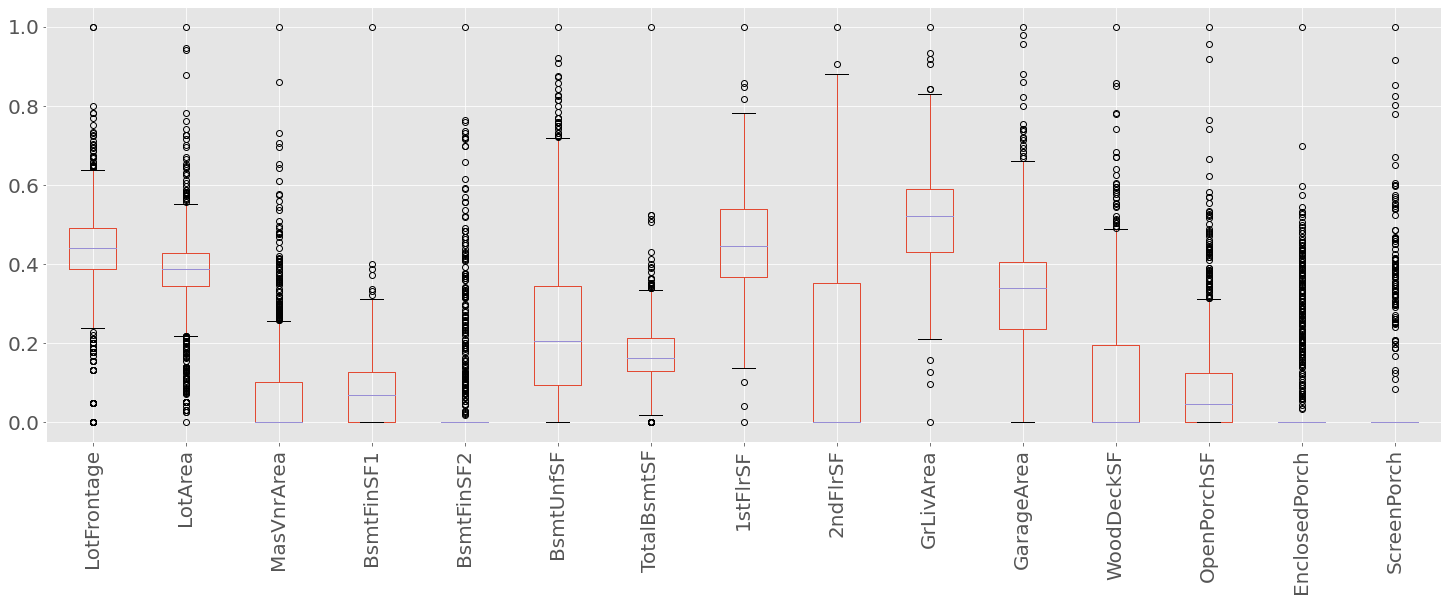

In [92]:
plt.figure(figsize = (25,8))
dataset_pca[actual_numerical[:-1]].boxplot()
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

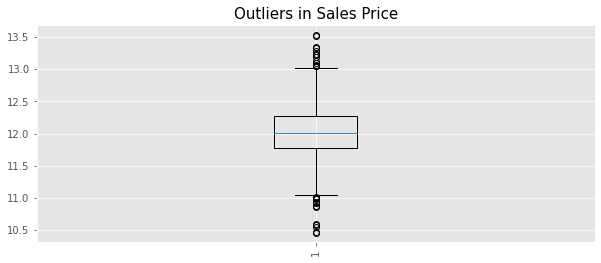

In [93]:
plt.figure(figsize=(10, 4))
plt.boxplot(dataset_pca[actual_numerical[-1]])  
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Outliers in Sales Price", fontsize = 15)
plt.show()


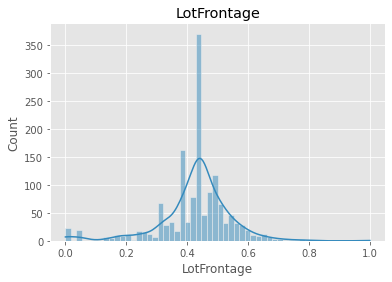

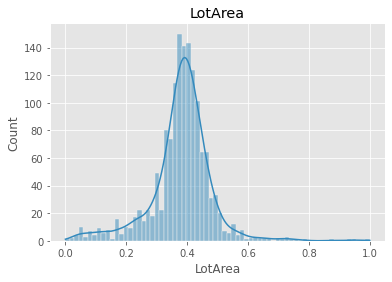

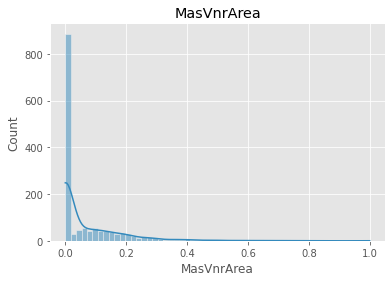

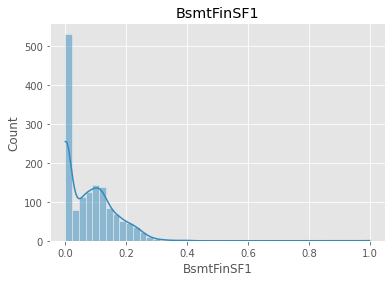

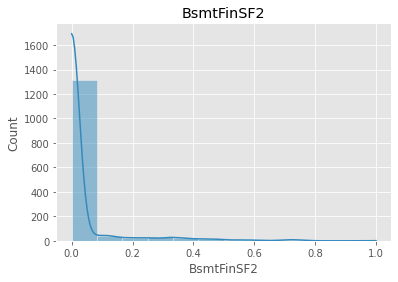

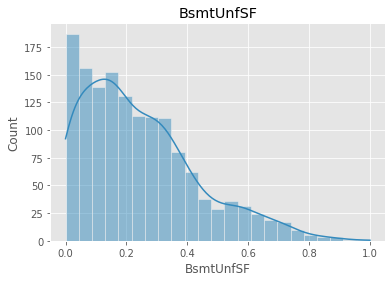

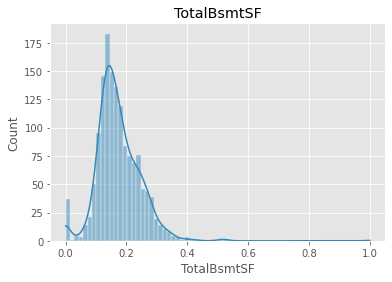

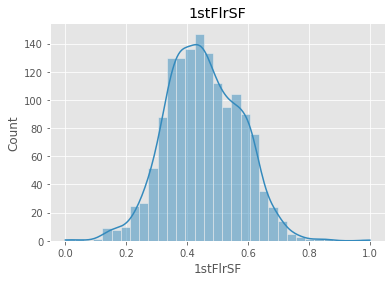

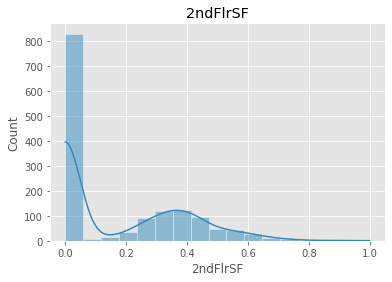

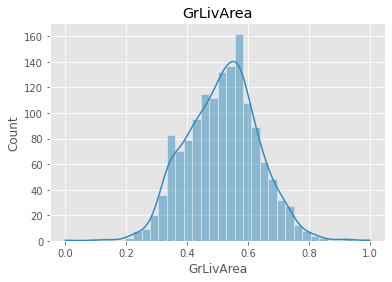

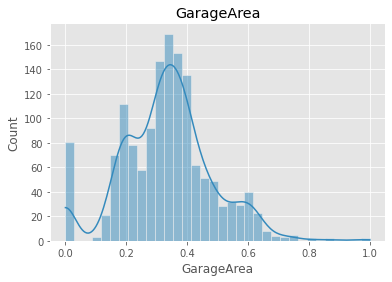

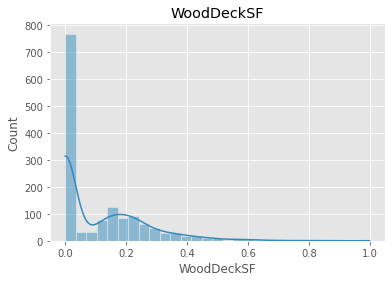

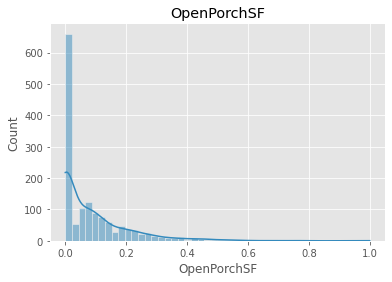

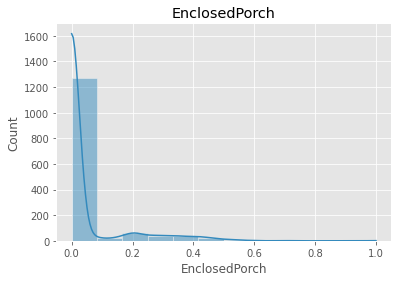

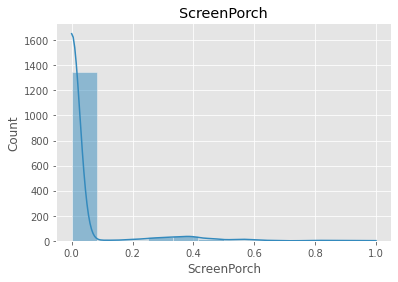

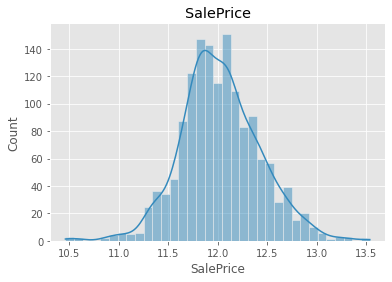

In [94]:
for cols in actual_numerical:
    sns.histplot(data = dataset_pca,x = cols,kde = True)
    plt.title(cols)
    plt.show()

In [95]:
quartile_chart = pd.DataFrame(columns= ['Column_Name','Tenth-Per','Q1','Mean','Median','Q3','Ninetieth-Per','IQR','Lwr_Bnd','Upr_Bnd','Min_Val','Max_Val'])
count = 0
for cols in actual_numerical:
    tenth_per = dataset_pca[cols].quantile(0.10)
    q1 = dataset_pca[cols].quantile(0.25)
    q3 = dataset_pca[cols].quantile(0.75)
    ninetieth_per = dataset_pca[cols].quantile(0.90)
    mean_val = dataset_pca[cols].mean()
    median_val = dataset_pca[cols].median()
    iqr = q3-q1
    lowerbound = q1-1.5*iqr
    upperbound = q3+1.5*iqr
    min_val = dataset_pca[cols].min()
    max_val = dataset_pca[cols].max()
    quartile_chart.loc[count] = [cols,tenth_per,q1,mean_val,median_val,q3,ninetieth_per,iqr,lowerbound,upperbound,min_val,max_val]
    count+=1

In [96]:
quartile_chart

Column_Name  Tenth-Per         Q1       Mean     Median         Q3  \
0     LotFrontage   0.313619   0.388581   0.427202   0.440313   0.490408   
1         LotArea   0.263645   0.344393   0.379832   0.388824   0.428380   
2      MasVnrArea   0.000000   0.000000   0.064448   0.000000   0.102656   
3      BsmtFinSF1   0.000000   0.000000   0.078604   0.067948   0.126196   
4      BsmtFinSF2   0.000000   0.000000   0.031580   0.000000   0.000000   
5       BsmtUnfSF   0.032063   0.095462   0.242826   0.204409   0.345890   
6     TotalBsmtSF   0.104239   0.130237   0.173065   0.162275   0.212480   
7        1stFlrSF   0.309593   0.367478   0.452743   0.446565   0.539955   
8        2ndFlrSF   0.000000   0.000000   0.168035   0.000000   0.352542   
9       GrLivArea   0.355342   0.431005   0.515284   0.522767   0.591258   
10     GarageArea   0.169252   0.235896   0.333554   0.338505   0.406206   
11     WoodDeckSF   0.000000   0.000000   0.109970   0.000000   0.196033   
12    OpenPorchSF   0.000000   0.000000   0.085302   0.045704   0.124314   
13  EnclosedPorch   0.000000   0.000000   0.039772   0.000000   0.000000   
14    ScreenPorch   0.000000   0.000000   0.031377   0.000000   0.000000   
15      SalePrice  11.575665  11.775097  12.024051  12.001505  12.273731   

    Ninetieth-Per       IQR    Lwr_Bnd    Upr_Bnd    Min_Val    Max_Val  
0        0.546795  0.101827   0.235841   0.643148   0.000000   1.000000  
1        0.470424  0.083987   0.218413   0.554360   0.000000   1.000000  
2        0.209375  0.102656  -0.153984   0.256641   0.000000   1.000000  
3        0.188785  0.126196  -0.189294   0.315490   0.000000   1.000000  
4        0.079512  0.000000   0.000000   0.000000   0.000000   1.000000  
5        0.527397  0.250428  -0.280180   0.721533   0.000000   1.000000  
6        0.262226  0.082242   0.006874   0.335843   0.000000   1.000000  
7        0.611324  0.172477   0.108763   0.798671   0.000000   1.000000  
8        0.462082  0.352542  -0.528814   0.881356   0.000000   1.000000  
9        0.660075  0.160253   0.190626   0.831637   0.000000   1.000000  
10       0.533921  0.170310  -0.019570   0.661671   0.000000   1.000000  
11       0.305718  0.196033  -0.294049   0.490082   0.000000   1.000000  
12       0.237660  0.124314  -0.186472   0.310786   0.000000   1.000000  
13       0.202899  0.000000   0.000000   0.000000   0.000000   1.000000  
14       0.000000  0.000000   0.000000   0.000000   0.000000   1.000000  
15      12.535376  0.498634  11.027146  13.021682  10.460242  13.534473

In [97]:
median_zero = quartile_chart[quartile_chart['Median']==0]['Column_Name']

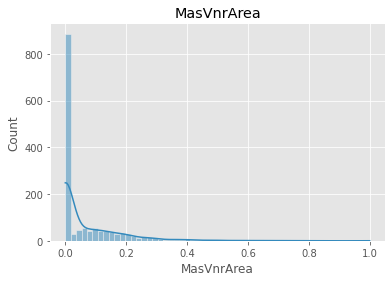

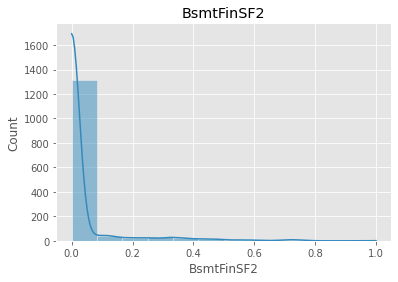

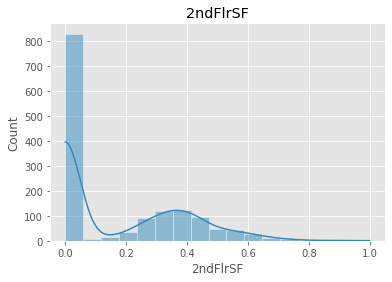

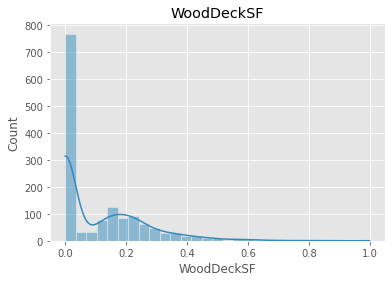

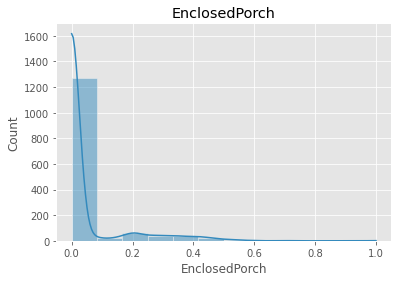

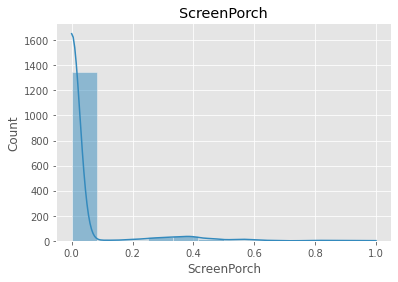

In [98]:
for col in median_zero:
    sns.histplot(data = dataset_pca,x = col,kde = True)
    plt.title(col)
    plt.show()

Keeping Columns with Median Zero Untouched: No Outliers Treatment

In [99]:
adj_cols = list(median_zero)+['SalePrice']

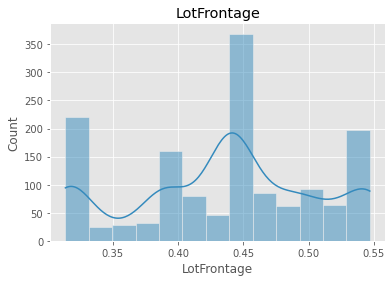

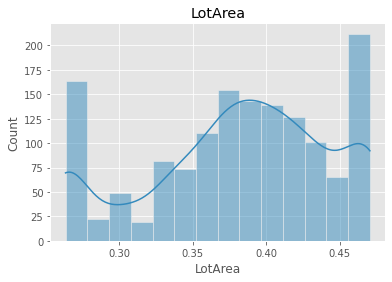

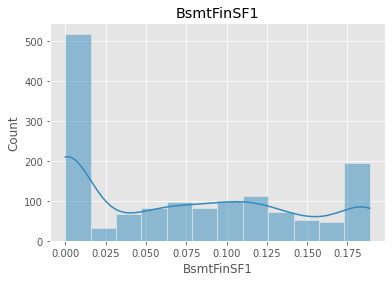

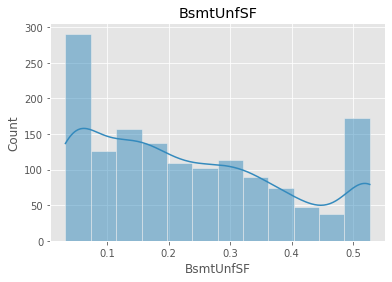

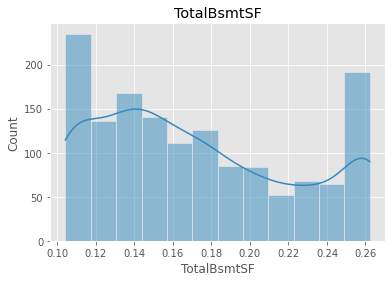

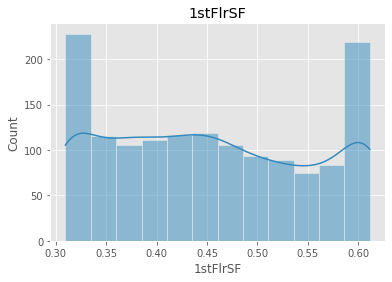

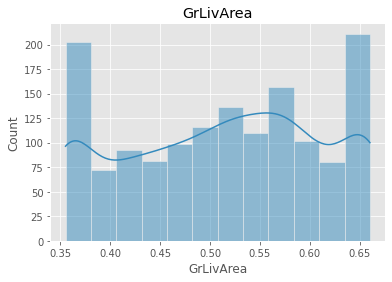

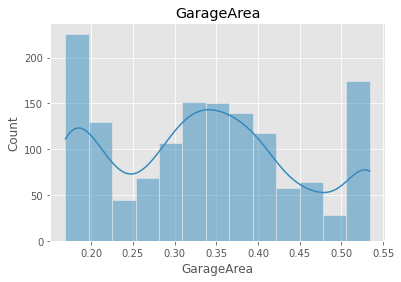

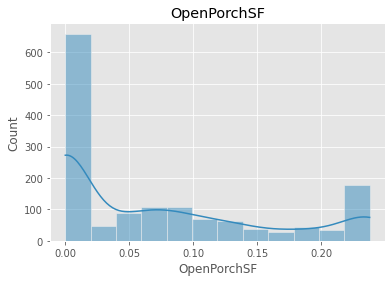

In [100]:
for cols in quartile_chart['Column_Name']:
    if cols not in adj_cols:
        tenth = dataset_pca[cols].quantile(0.10)
        nineteith = dataset_pca[cols].quantile(0.90)
        dataset_pca[cols] = np.where(dataset_pca[cols]<tenth,tenth,dataset_pca[cols])
        dataset_pca[cols] = np.where(dataset_pca[cols]>nineteith,nineteith,dataset_pca[cols])
        sns.histplot(data = dataset_pca,x = cols,kde = True)
        plt.title(cols)
        plt.show()
    else:
        pass

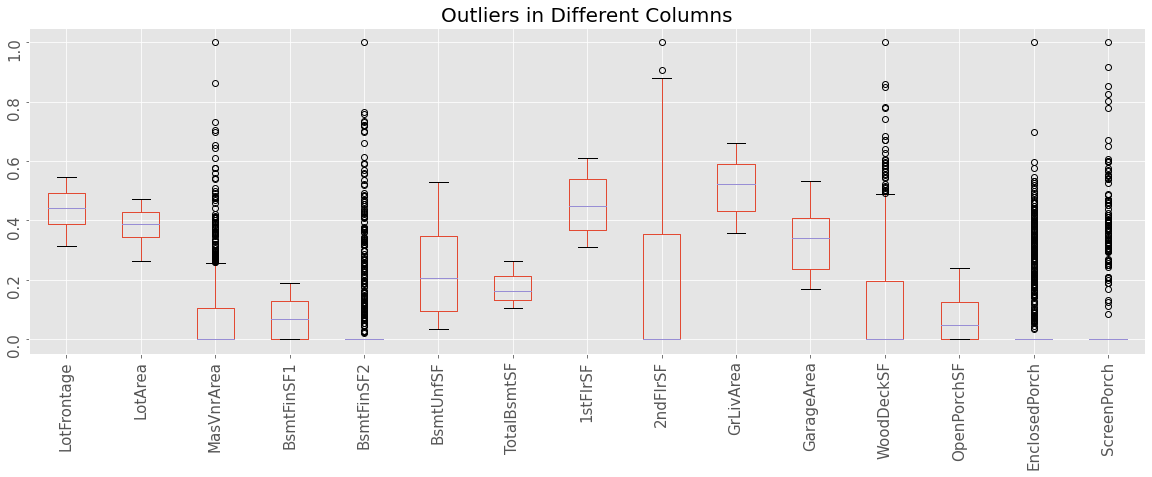

In [101]:
plt.figure(figsize = (20,6))
dataset_pca[actual_numerical[:-1]].boxplot()
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(rotation = 90, fontsize = 15)
plt.title("Outliers in Different Columns", fontsize = 20)
plt.show()

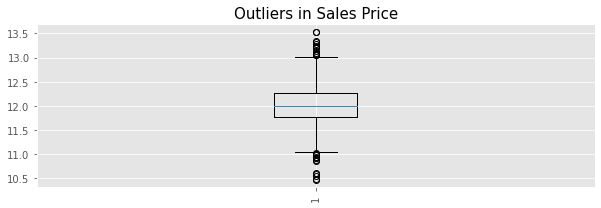

In [102]:
plt.figure(figsize = (10,3))
plt.boxplot(dataset_pca[actual_numerical[-1]])
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Outliers in Sales Price", fontsize = 15)
plt.show()

## Model Development 

### Train-Test Split

In [103]:
dataset_pca.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.235294     0.418208  0.366344     0.666667        0.500     0.12250   
1    0.000000     0.495064  0.391317     0.555556        0.875     0.00000   
2    0.235294     0.434909  0.422359     0.666667        0.500     0.10125   
3    0.294118     0.388581  0.390295     0.666667        0.500     0.00000   
4    0.235294     0.513123  0.468761     0.777778        0.500     0.21875   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0    0.125089         0.0   0.064212     0.140098  0.356155  0.413559   
1    0.173281         0.0   0.121575     0.206547  0.503056  0.000000   
2    0.086109         0.0   0.185788     0.150573  0.383441  0.419370   
3    0.038271         0.0   0.231164     0.123732  0.399941  0.366102   
4    0.116052         0.0   0.209760     0.187398  0.466237  0.509927   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   0.577712      0.333333           0.0  0.666667       0.5   
1           0.0   0.470245      0.000000           0.5  0.666667       0.0   
2           0.0   0.593095      0.333333           0.0  0.666667       0.5   
3           0.0   0.579157      0.333333           0.0  0.333333       0.0   
4           0.0   0.660075      0.333333           0.0  0.666667       0.5   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         0.375      0.333333      0.500000    0.000000        0.50   
1         0.375      0.333333      0.333333    0.333333        0.50   
2         0.375      0.333333      0.333333    0.333333        0.50   
3         0.375      0.333333      0.416667    0.333333        0.75   
4         0.500      0.333333      0.583333    0.333333        0.75   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.386460    0.000000     0.111517       0.000000        0.0          0.0   
1    0.324401    0.347725     0.000000       0.000000        0.0          0.0   
2    0.428773    0.000000     0.076782       0.000000        0.0          0.0   
3    0.452750    0.000000     0.063985       0.492754        0.0          0.0   
4    0.533921    0.224037     0.153565       0.000000        0.0          0.0   

   PoolArea  MiscVal    MoSold  SalePrice  YearBuiltdiff_Yr_Sold  \
0       0.0      0.0  0.090909  12.247694               0.036765   
1       0.0      0.0  0.363636  12.109011               0.227941   
2       0.0      0.0  0.727273  12.317167               0.051471   
3       0.0      0.0  0.090909  11.849398               0.669118   
4       0.0      0.0  1.000000  12.429216               0.058824   

   YearRemodAdddiff_Yr_Sold  GarageYrBltdiff_Yr_Sold         0         1  \
0                  0.098361                 0.046729  0.030159 -0.034417   
1                  0.524590                 0.289720  0.027166  0.006150   
2                  0.114754                 0.065421  0.028629 -0.042639   
3                  0.606557                 0.074766  0.024872  0.013458   
4                  0.147541                 0.074766  0.027687 -0.043491   

          2         3         4         5         6         7         8  \
0 -0.013983 -0.012533  0.045150 -0.016567 -0.007651  0.031438 -0.007714   
1  0.023054 -0.008351  0.014774  0.011306  0.013586 -0.007154 -0.018634   
2  0.007784 -0.037530  0.013881 -0.002195  0.001238  0.005776 -0.009175   
3 -0.011880 -0.032619 -0.068317  0.006983  0.017760  0.008489  0.013387   
4  0.012128 -0.042755  0.007172  0.000277 -0.000400  0.005849  0.006176   

          9        10        11        12        13        14        15  \
0  0.024056 -0.007631  0.014321 -0.021256  0.004146  0.001412 -0.015583   
1 -0.024993  0.012154  0.031811  0.051463 -0.042577 -0.054470 -0.022176   
2  0.024318 -0.003505  0.022094 -0.041392  0.018339 -0.019999 -0.011737   
3 -0.009223 -0.001476 -0.026960 -0.021942 -0.019882  0.010304 -0.024781   
4  0.033057 -0.00442

In [104]:
from sklearn.model_selection import StratifiedKFold
X_cols = list(dataset_pca.columns)
X_cols.remove('SalePrice')
X = dataset_pca[X_cols]
y = dataset_pca['SalePrice']

In [105]:
import verstack
from verstack.stratified_continuous_split import scsplit

In [106]:
X_train,X_test,y_train,y_test = scsplit(X,y,stratify= y)

In [107]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
42      0.382353     0.440313  0.382561     0.444444         0.75     0.00000   
1447    0.235294     0.495064  0.399306     0.777778         0.50     0.27375   
486     0.000000     0.490408  0.404882     0.444444         0.75     0.10500   
1267    0.000000     0.534524  0.453851     0.888889         0.50     0.00000   
631     0.588235     0.313619  0.263645     0.777778         0.50     0.06750   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
42      0.132353    0.063094   0.032063     0.137480  0.368335  0.000000   
1447    0.188785    0.000000   0.060360     0.199673  0.490247  0.421308   
486     0.148122    0.000000   0.101455     0.175614  0.441659  0.000000   
1267    0.000000    0.000000   0.527397     0.262226  0.611324  0.000000   
631     0.004252    0.000000   0.527397     0.254337  0.581821  0.000000   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
42             0.0   0.355342      0.333333           0.0  0.333333       0.0   
1447           0.0   0.648700      0.333333           0.0  0.666667       0.5   
486            0.0   0.412852      0.333333           0.0  0.333333       0.5   
1267           0.0   0.636298      0.000000           0.0  0.666667       0.0   
631            0.0   0.543872      0.000000           0.0  0.666667       0.0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
42           0.250      0.333333      0.250000    0.000000        0.50   
1447         0.375      0.333333      0.500000    0.333333        0.50   
486          0.375      0.333333      0.333333    0.000000        0.50   
1267         0.375      0.333333      0.666667    0.333333        0.75   
631          0.250      0.333333      0.333333    0.333333        0.50   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
42      0.355430    0.280047     0.000000            0.0        0.0   
1447    0.392102    0.000000     0.118830            0.0        0.0   
486     0.363188    0.000000     0.000000            0.0        0.0   
1267    0.526093    0.168028     0.138940            0.0        0.0   
631     0.442172    0.182030     0.133455            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YearBuiltdiff_Yr_Sold  \
42            0.0       0.0      0.0  1.000000               0.176471   
1447          0.0       0.0      0.0  1.000000               0.088235   
486           0.0       0.0      0.0  0.454545               0.308824   
1267          0.0       0.0      0.0  0.363636               0.014706   
631           0.0       0.0      0.0  0.636364               0.007353   

      YearRemodAdddiff_Yr_Sold  GarageYrBltdiff_Yr_Sold         0         1  \
42                    0.409836                 0.224299  0.023825  0.002918   
1447                  0.196721                 0.112150  0.029824 -0.037429   
486                   0.704918                 0.392523  0.029013  0.023082   
1267                  0.032787                 0.009346  0.024871 -0.019636   
631                   0.032787                 0.009346  0.026705 -0.038514   

             2         3         4         5         6         7         8  \
42    0.035927 -0.050622  0.025627  0.044665  0.015935  0.009563  0.005806   
1447 -0.005566 -0.024262  0.032978 -0.029170 -0.013670  0.024699 -0.025879   
486   0.036425  0.039488  0.024520 -0.027640 -0.013771  0.023285  0.002059   
1267  0.013901  0.039099 -0.066496  0.012103  0.002589 -0.056361 -0.021199   
631  -0.005117  0.025825  0.027319  0.003320  0.024226 -0.000688 -0.029697   

             9        10        11        12        13        14        15  \
42   -0.011276  0.015733 -0.022817 -0.036310 -0.046547  0.053850  0.009442   
1447  0.015373 -0.018219  0.018661 -0.008630  0.006559 -0.011036 -0.013078   
486   0.011628  0.034920  0.022983  0.019724  0.016433 -0.016276 -0.037376   
1267  0.

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()
clfs = {'Lin_Reg':lr,'Decision_Tree':dt,'Random_Forest':rf,'Sup_Vec_Reg':svr}

In [110]:
error_dataframe = pd.DataFrame(columns=['Classifier','MAE','MSE','R2','Adj R2'])
count = 0
for key,val in clfs.items():
    val.fit(X_train,y_train)
    prd = val.predict(X_test)
    
    SS_Residual = sum((y_test-prd)**2)
    SS_Total = sum((y_test-np.mean(y_test))**2)
    
    r_squared = 1 - (float(SS_Residual))/SS_Total
    
    adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    
    error_dataframe.loc[count] = [key,mean_absolute_error(y_test,prd),mean_squared_error(y_test,prd),r_squared,adj_r_squared]
    count+=1



    

In [111]:
error_dataframe

Classifier       MAE       MSE        R2    Adj R2
0        Lin_Reg  0.090447  0.018071  0.895361  0.850075
1  Decision_Tree  0.181282  0.065493  0.620760  0.456629
2  Random_Forest  0.108374  0.026344  0.847452  0.781431
3    Sup_Vec_Reg  0.092237  0.019637  0.886290  0.837078

**Here we can see that SVR is performing better in all terms**

**Further Performance Analysis**

In [112]:
prd = svr.predict(X_test)

In [113]:
output = pd.DataFrame({'True':np.exp(y_test),'Predicted':np.exp(prd)})

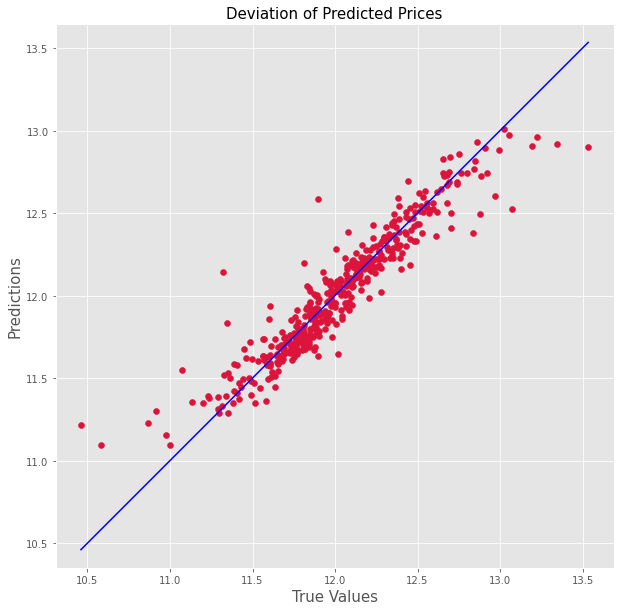

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prd, c='crimson')


p1 = max(max(prd), max(y_test))
p2 = min(min(prd), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Deviation of Predicted Prices", fontsize = 15)
plt.axis('equal')
plt.show()

The graph above clearly shows that some values are underpredicted and some are over-predicted but most of them lie in the linear line representing the expected predictions

Text(0, 0.5, 'Difference')

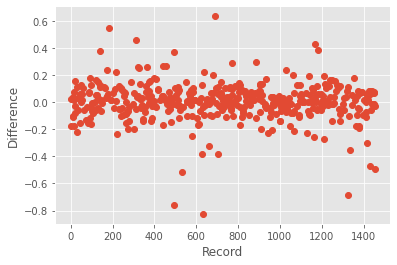

In [115]:
plt.plot(y_test - prd,marker='o',linestyle='')
plt.xlabel('Record')
plt.ylabel('Difference')

**The prediction difference seems linear except for some cases.**

### Improving Support Vector Regressor : Hyperparameter Tuning Using Grid Search CV

**Avoid 'precomputed' kernel since our training dataset is not a square matrix**

In [116]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
params = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':list(range(1,4)),
         'gamma':['scale','auto','float'],'coef0':list(np.arange(0.0,0.3,0.1)),'tol':np.arange(0.0009,0.003,0.00081),
          'C':list(np.arange(0.9,1.2,0.1)),'epsilon':list(np.arange(0,0.3,0.1)),'shrinking':[True,False]}]

In [117]:
clf = GridSearchCV(estimator= svr,param_grid= params,scoring = 'r2',cv = 5)

In [118]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.9, 1.0, 1.1], 'coef0': [0.0, 0.1, 0.2],
                          'degree': [1, 2, 3], 'epsilon': [0.0, 0.1, 0.2],
                          'gamma': ['scale', 'auto', 'float'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'shrinking': [True, False],
                          'tol': array([0.0009 , 0.00171, 0.00252])}],
             scoring='r2')

In [119]:
best_params = clf.best_params_
best_params

{'C': 0.9,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.0,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': False,
 'tol': 0.0009}

**Best Estimator Hyperparameters
{'C': 1.1,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.0,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': False,
 'tol': 0.00171}**

In [120]:
estimator = clf.best_estimator_

In [121]:
pred = estimator.predict(X_test)

In [122]:
output = pd.DataFrame({'True':np.exp(y_test),'Predicted':np.exp(pred)})

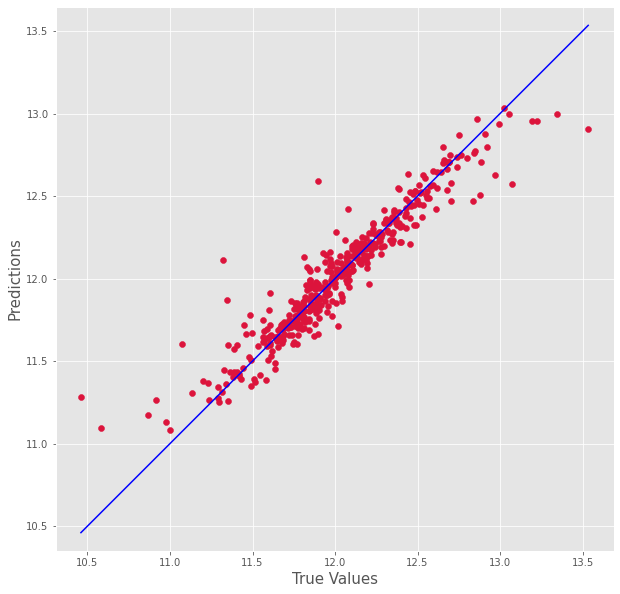

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')


p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Difference')

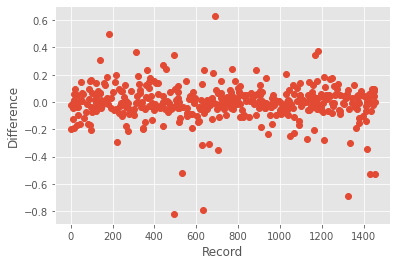

In [124]:
plt.plot(y_test - pred,marker='o',linestyle='')
plt.xlabel('Record')
plt.ylabel('Difference')

In [125]:
clf.best_score_

0.8924676950217728

**Hence a support vector regression model with hyperparameters {'C': 1.1, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False, 'tol': 0.00171} performed well in the dataset and is able to give an r2 score of 0.885 in unseen test dataset**

In [126]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1378    0.823529     0.313619  0.263645     0.555556          0.5     0.25500   
536     0.235294     0.369595  0.377026     0.666667          0.5     0.00000   
52      0.411765     0.546795  0.366853     0.444444          0.5     0.00000   
266     0.235294     0.445638  0.421609     0.555556          0.5     0.00000   
766     0.235294     0.495064  0.407377     0.666667          0.5     0.02625   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1378    0.054748    0.000000   0.074486     0.104239  0.309593  0.244068   
536     0.000000    0.000000   0.376712     0.144026  0.366619  0.408717   
52      0.018427    0.483039   0.032063     0.133552  0.338044  0.000000   
266     0.126506    0.000000   0.037671     0.131260  0.331495  0.343341   
766     0.069809    0.000000   0.250856     0.160393  0.407350  0.355448   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1378           0.0   0.383299      0.000000           0.0  0.333333       0.5   
536            0.0   0.580597      0.000000           0.0  0.666667       0.5   
52             0.0   0.355342      0.333333           0.0  0.333333       0.0   
266            0.0   0.533946      0.333333           0.0  0.666667       0.5   
766            0.0   0.578539      0.000000           0.0  0.666667       0.5   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
1378         0.250      0.333333      0.250000    0.000000        0.25   
536          0.375      0.333333      0.500000    0.000000        0.50   
52           0.250      0.333333      0.250000    0.000000        0.50   
266          0.375      0.333333      0.500000    0.333333        0.50   
766          0.375      0.333333      0.416667    0.333333        0.50   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1378    0.186178    0.084014     0.000000       0.000000        0.0   
536     0.371650    0.140023     0.237660       0.000000        0.0   
52      0.363893    0.123687     0.000000       0.000000        0.0   
266     0.291255    0.110852     0.137112       0.000000        0.0   
766     0.349788    0.266044     0.120658       0.282609        0.0   

      ScreenPorch  PoolArea   MiscVal    MoSold  YearBuiltdiff_Yr_Sold  \
1378          0.0       0.0  0.000000  0.454545               0.242647   
536           0.0       0.0  0.000000  0.545455               0.073529   
52            0.0       0.0  0.000000  0.363636               0.345588   
266           0.0       0.0  0.000000  0.454545               0.066176   
766           0.0       0.0  0.032258  0.181818               0.161765   

      YearRemodAdddiff_Yr_Sold  GarageYrBltdiff_Yr_Sold         0         1  \
1378                  0.557377                 0.308411  0.025782  0.032808   
536                   0.163934                 0.093458  0.028827 -0.025939   
52                    0.786885                 0.439252  0.016777  0.020707   
266                   0.163934                 0.084112  0.026831 -0.018598   
766                   0.377049                 0.205607  0.027211  0.012908   

             2         3         4         5         6         7         8  \
1378 -0.003821 -0.012490  0.035203 -0.060852 -0.006465 -0.014454  0.050406   
536  -0.012868 -0.035981 -0.009555  0.044765 -0.007672 -0.009235  0.033016   
52   -0.002029 -0.013007  0.010050  0.032635  0.044202 -0.035953  0.005752   
266   0.008774 -0.047119 -0.013936  0.031244 -0.018581 -0.059089  0.023557   
766   0.035231 -0.039923  0.034283 -0.052065 -0.017495 -0.013498  0.006306   

             9        10        11        12        13        14        15  \
1378  0.018014 -0.005401 -0.025621 -0.034504  0.022496  0.022240  0.005857   
536   0.013759 -0.015649  0.010551 -0.008919 -0.015258  0.006101  0.003476   
52    0.010931 -0.012397 -0.057978  0.006904  0.014243 -0.055747  0.004289   
26